https://www.endcoronavirus.org/countries

In [4]:
xls = pd.ExcelFile("https://github.com/OxCGRT/covid-policy-tracker/raw/master/data/timeseries/OxCGRT_timeseries_all.xlsx")
fc_data = pd.read_excel(xls, 'h6_facial_coverings')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load CSV data directly from the URL with pandas, the options are needed to prevent
# reading of records with key "NA" (Namibia) as NaN
data = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v2/oxford-government-response.csv",
    keep_default_na=False,
    na_values=[""],
)

# NOTE: We are only downloading the last day of data, but you can download all
# the data at once if you'd like by changing the URL to:
# https://storage.googleapis.com/covid19-open-data/v2/main.csv

# Print a small snippet of the dataset
print(f"The dataset currently contains {len(data)} records, here is a sample:")
data.sample(2)

The dataset currently contains 87129 records, here is a sample:


,date,key,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,stringency_index
16493,2020-03-03,US_WI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,13.89
8036,2020-01-31,SK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,2.78


choose specific policies (closure and health)

In [4]:
data_closure = data[['date','key','school_closing', 'workplace_closing', 'cancel_public_events','restrictions_on_gatherings','public_transport_closing','stay_at_home_requirements','restrictions_on_internal_movement','international_travel_controls']]
data_health = data[['date','key', 'testing_policy', 'contact_tracing','emergency_investment_in_healthcare','investment_in_vaccines']] 

pick: 
GREEN 
1. Australia              AU
2. New Zealand       NZ
3. Singapore           SG  
4. Thailand              TH
5. Somalia               SO

YELLOW
1. China                CN   
2. Egypt                EG
3. Israel                 IL
4. Kyrgyzstan       KG
5. Tajikistan          TJ

RED
1. USA                 US
2. Brazil               BR
3. Canada           CA
4. Philippines      PH
5. Russia            RU


Australia, New Zealand, Singapore, Thailand, Somalia

Closure Policy Data of AU

In [5]:
data_closure_AU = data_closure[data_closure['key'] == "AU"]

In [6]:
s1 = (data_closure_AU['school_closing'] - data_closure_AU['school_closing'].min())/(data_closure_AU['school_closing'].max() - data_closure_AU['school_closing'].min())
data_closure_AU = data_closure_AU.drop(['school_closing'],axis=1)
data_closure_AU.insert(2,'school_closing',s1)
s2 = (data_closure_AU['workplace_closing'] - data_closure_AU['workplace_closing'].min())/(data_closure_AU['workplace_closing'].max() - data_closure_AU['workplace_closing'].min())
data_closure_AU = data_closure_AU.drop(['workplace_closing'],axis=1)
data_closure_AU.insert(3,'workplace_closing',s2)
s3 = (data_closure_AU['cancel_public_events'] - data_closure_AU['cancel_public_events'].min())/(data_closure_AU['cancel_public_events'].max() - data_closure_AU['cancel_public_events'].min())
data_closure_AU = data_closure_AU.drop(['cancel_public_events'],axis=1)
data_closure_AU.insert(4,'cancel_public_events',s3)
s4 = (data_closure_AU['restrictions_on_gatherings'] - data_closure_AU['restrictions_on_gatherings'].min())/(data_closure_AU['restrictions_on_gatherings'].max() - data_closure_AU['restrictions_on_gatherings'].min())
data_closure_AU = data_closure_AU.drop(['restrictions_on_gatherings'],axis=1)
data_closure_AU.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_AU['public_transport_closing'] - data_closure_AU['public_transport_closing'].min())/(data_closure_AU['public_transport_closing'].max() - data_closure_AU['public_transport_closing'].min())
data_closure_AU = data_closure_AU.drop(['public_transport_closing'],axis=1)
data_closure_AU.insert(6,'public_transport_closing',s5)
s6 = (data_closure_AU['stay_at_home_requirements'] - data_closure_AU['stay_at_home_requirements'].min())/(data_closure_AU['stay_at_home_requirements'].max() - data_closure_AU['stay_at_home_requirements'].min())
data_closure_AU = data_closure_AU.drop(['stay_at_home_requirements'],axis=1)
data_closure_AU.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_AU['restrictions_on_internal_movement'] - data_closure_AU['restrictions_on_internal_movement'].min())/(data_closure_AU['restrictions_on_internal_movement'].max() - data_closure_AU['restrictions_on_internal_movement'].min())
data_closure_AU = data_closure_AU.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_AU.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_AU['international_travel_controls'] - data_closure_AU['international_travel_controls'].min())/(data_closure_AU['international_travel_controls'].max() - data_closure_AU['international_travel_controls'].min())
data_closure_AU = data_closure_AU.drop(['international_travel_controls'],axis=1)
data_closure_AU.insert(9,'international_travel_controls',s8)

In [7]:
AU_closure_average_ontime = data_closure_AU.mean(axis = 0) 
AU_closure_average = AU_closure_average_ontime.mean()
AU_closure_average

0.6295708955223882

Health Policy Data of AU

In [8]:
data_health_AU = data_health[data_health['key'] == "AU"]

s1 = (data_health_AU['testing_policy'] - data_health_AU['testing_policy'].min())/(data_health_AU['testing_policy'].max() - data_health_AU['testing_policy'].min())
data_health_AU = data_health_AU.drop(['testing_policy'],axis=1)
data_health_AU.insert(2,'testing_policy',s1)
s2 = (data_health_AU['contact_tracing'] - data_health_AU['contact_tracing'].min())/(data_health_AU['contact_tracing'].max() - data_health_AU['contact_tracing'].min())
data_health_AU = data_health_AU.drop(['contact_tracing'],axis=1)
data_health_AU.insert(3,'contact_tracing',s2)
s3 = (data_health_AU['emergency_investment_in_healthcare'] - data_health_AU['emergency_investment_in_healthcare'].min())/(data_health_AU['emergency_investment_in_healthcare'].max() - data_health_AU['emergency_investment_in_healthcare'].min())
data_health_AU = data_health_AU.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_AU.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_AU['investment_in_vaccines'] - data_health_AU['investment_in_vaccines'].min())/(data_health_AU['investment_in_vaccines'].max() - data_health_AU['investment_in_vaccines'].min())
data_health_AU = data_health_AU.drop(['investment_in_vaccines'],axis=1)
data_health_AU.insert(5,'investment_in_vaccines',s4)

AU_health_average_ontime = data_health_AU.mean(axis = 0) 
AU_health_average = AU_health_average_ontime.mean()
AU_health_average

0.4135678573344628

In [9]:
data_closure_NZ = data_closure[data_closure['key'] == "NZ"]

s1 = (data_closure_NZ['school_closing'] - data_closure_NZ['school_closing'].min())/(data_closure_NZ['school_closing'].max() - data_closure_NZ['school_closing'].min())
data_closure_NZ = data_closure_NZ.drop(['school_closing'],axis=1)
data_closure_NZ.insert(2,'school_closing',s1)
s2 = (data_closure_NZ['workplace_closing'] - data_closure_NZ['workplace_closing'].min())/(data_closure_NZ['workplace_closing'].max() - data_closure_NZ['workplace_closing'].min())
data_closure_NZ = data_closure_NZ.drop(['workplace_closing'],axis=1)
data_closure_NZ.insert(3,'workplace_closing',s2)
s3 = (data_closure_NZ['cancel_public_events'] - data_closure_NZ['cancel_public_events'].min())/(data_closure_NZ['cancel_public_events'].max() - data_closure_NZ['cancel_public_events'].min())
data_closure_NZ = data_closure_NZ.drop(['cancel_public_events'],axis=1)
data_closure_NZ.insert(4,'cancel_public_events',s3)
s4 = (data_closure_NZ['restrictions_on_gatherings'] - data_closure_NZ['restrictions_on_gatherings'].min())/(data_closure_NZ['restrictions_on_gatherings'].max() - data_closure_NZ['restrictions_on_gatherings'].min())
data_closure_NZ = data_closure_NZ.drop(['restrictions_on_gatherings'],axis=1)
data_closure_NZ.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_NZ['public_transport_closing'] - data_closure_NZ['public_transport_closing'].min())/(data_closure_NZ['public_transport_closing'].max() - data_closure_NZ['public_transport_closing'].min())
data_closure_NZ = data_closure_NZ.drop(['public_transport_closing'],axis=1)
data_closure_NZ.insert(6,'public_transport_closing',s5)
s6 = (data_closure_NZ['stay_at_home_requirements'] - data_closure_NZ['stay_at_home_requirements'].min())/(data_closure_NZ['stay_at_home_requirements'].max() - data_closure_NZ['stay_at_home_requirements'].min())
data_closure_NZ = data_closure_NZ.drop(['stay_at_home_requirements'],axis=1)
data_closure_NZ.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_NZ['restrictions_on_internal_movement'] - data_closure_NZ['restrictions_on_internal_movement'].min())/(data_closure_NZ['restrictions_on_internal_movement'].max() - data_closure_NZ['restrictions_on_internal_movement'].min())
data_closure_NZ = data_closure_NZ.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_NZ.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_NZ['international_travel_controls'] - data_closure_NZ['international_travel_controls'].min())/(data_closure_NZ['international_travel_controls'].max() - data_closure_NZ['international_travel_controls'].min())
data_closure_NZ = data_closure_NZ.drop(['international_travel_controls'],axis=1)
data_closure_NZ.insert(9,'international_travel_controls',s8)

NZ_closure_average_ontime = data_closure_NZ.mean(axis = 0) 
NZ_closure_average = NZ_closure_average_ontime.mean()
print(NZ_closure_average)


data_health_NZ = data_health[data_health['key'] == "NZ"]
s1 = (data_health_NZ['testing_policy'] - data_health_NZ['testing_policy'].min())/(data_health_NZ['testing_policy'].max() - data_health_NZ['testing_policy'].min())
data_health_NZ = data_health_NZ.drop(['testing_policy'],axis=1)
data_health_NZ.insert(2,'testing_policy',s1)
s2 = (data_health_NZ['contact_tracing'] - data_health_NZ['contact_tracing'].min())/(data_health_NZ['contact_tracing'].max() - data_health_NZ['contact_tracing'].min())
data_health_NZ = data_health_NZ.drop(['contact_tracing'],axis=1)
data_health_NZ.insert(3,'contact_tracing',s2)
s3 = (data_health_NZ['emergency_investment_in_healthcare'] - data_health_NZ['emergency_investment_in_healthcare'].min())/(data_health_NZ['emergency_investment_in_healthcare'].max() - data_health_NZ['emergency_investment_in_healthcare'].min())
data_health_NZ = data_health_NZ.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_NZ.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_NZ['investment_in_vaccines'] - data_health_NZ['investment_in_vaccines'].min())/(data_health_NZ['investment_in_vaccines'].max() - data_health_NZ['investment_in_vaccines'].min())
data_health_NZ = data_health_NZ.drop(['investment_in_vaccines'],axis=1)
data_health_NZ.insert(5,'investment_in_vaccines',s4)

NZ_health_average_ontime = data_health_NZ.mean(axis = 0) 
NZ_health_average = NZ_health_average_ontime.mean()
print(NZ_health_average)

0.3179908839038342
0.402614174635803


In [10]:
data_closure_SG = data_closure[data_closure['key'] == "SG"]

s1 = (data_closure_SG['school_closing'] - data_closure_SG['school_closing'].min())/(data_closure_SG['school_closing'].max() - data_closure_SG['school_closing'].min())
data_closure_SG = data_closure_SG.drop(['school_closing'],axis=1)
data_closure_SG.insert(2,'school_closing',s1)
s2 = (data_closure_SG['workplace_closing'] - data_closure_SG['workplace_closing'].min())/(data_closure_SG['workplace_closing'].max() - data_closure_SG['workplace_closing'].min())
data_closure_SG = data_closure_SG.drop(['workplace_closing'],axis=1)
data_closure_SG.insert(3,'workplace_closing',s2)
s3 = (data_closure_SG['cancel_public_events'] - data_closure_SG['cancel_public_events'].min())/(data_closure_SG['cancel_public_events'].max() - data_closure_SG['cancel_public_events'].min())
data_closure_SG = data_closure_SG.drop(['cancel_public_events'],axis=1)
data_closure_SG.insert(4,'cancel_public_events',s3)
s4 = (data_closure_SG['restrictions_on_gatherings'] - data_closure_SG['restrictions_on_gatherings'].min())/(data_closure_SG['restrictions_on_gatherings'].max() - data_closure_SG['restrictions_on_gatherings'].min())
data_closure_SG = data_closure_SG.drop(['restrictions_on_gatherings'],axis=1)
data_closure_SG.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_SG['public_transport_closing'] - data_closure_SG['public_transport_closing'].min())/(data_closure_SG['public_transport_closing'].max() - data_closure_SG['public_transport_closing'].min())
data_closure_SG = data_closure_SG.drop(['public_transport_closing'],axis=1)
data_closure_SG.insert(6,'public_transport_closing',s5)
s6 = (data_closure_SG['stay_at_home_requirements'] - data_closure_SG['stay_at_home_requirements'].min())/(data_closure_SG['stay_at_home_requirements'].max() - data_closure_SG['stay_at_home_requirements'].min())
data_closure_SG = data_closure_SG.drop(['stay_at_home_requirements'],axis=1)
data_closure_SG.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_SG['restrictions_on_internal_movement'] - data_closure_SG['restrictions_on_internal_movement'].min())/(data_closure_SG['restrictions_on_internal_movement'].max() - data_closure_SG['restrictions_on_internal_movement'].min())
data_closure_SG = data_closure_SG.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_SG.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_SG['international_travel_controls'] - data_closure_SG['international_travel_controls'].min())/(data_closure_SG['international_travel_controls'].max() - data_closure_SG['international_travel_controls'].min())
data_closure_SG = data_closure_SG.drop(['international_travel_controls'],axis=1)
data_closure_SG.insert(9,'international_travel_controls',s8)

SG_closure_average_ontime = data_closure_SG.mean(axis = 0) 
SG_closure_average = SG_closure_average_ontime.mean()
print(SG_closure_average)


data_health_SG = data_health[data_health['key'] == "SG"]
s1 = (data_health_SG['testing_policy'] - data_health_SG['testing_policy'].min())/(data_health_SG['testing_policy'].max() - data_health_SG['testing_policy'].min())
data_health_SG = data_health_SG.drop(['testing_policy'],axis=1)
data_health_SG.insert(2,'testing_policy',s1)
s2 = (data_health_SG['contact_tracing'] - data_health_SG['contact_tracing'].min())/(data_health_SG['contact_tracing'].max() - data_health_SG['contact_tracing'].min())
data_health_SG = data_health_SG.drop(['contact_tracing'],axis=1)
data_health_SG.insert(3,'contact_tracing',s2)
s3 = (data_health_SG['emergency_investment_in_healthcare'] - data_health_SG['emergency_investment_in_healthcare'].min())/(data_health_SG['emergency_investment_in_healthcare'].max() - data_health_SG['emergency_investment_in_healthcare'].min())
data_health_SG = data_health_SG.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_SG.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_SG['investment_in_vaccines'] - data_health_SG['investment_in_vaccines'].min())/(data_health_SG['investment_in_vaccines'].max() - data_health_SG['investment_in_vaccines'].min())
data_health_SG = data_health_SG.drop(['investment_in_vaccines'],axis=1)
data_health_SG.insert(5,'investment_in_vaccines',s4)

SG_health_average_ontime = data_health_SG.mean(axis = 0) 
SG_health_average = SG_health_average_ontime.mean()
print(SG_health_average)

0.4970147357723569
0.6366869918699186


In [11]:
data_closure_TH = data_closure[data_closure['key'] == "TH"]

s1 = (data_closure_TH['school_closing'] - data_closure_TH['school_closing'].min())/(data_closure_TH['school_closing'].max() - data_closure_TH['school_closing'].min())
data_closure_TH = data_closure_TH.drop(['school_closing'],axis=1)
data_closure_TH.insert(2,'school_closing',s1)
s2 = (data_closure_TH['workplace_closing'] - data_closure_TH['workplace_closing'].min())/(data_closure_TH['workplace_closing'].max() - data_closure_TH['workplace_closing'].min())
data_closure_TH = data_closure_TH.drop(['workplace_closing'],axis=1)
data_closure_TH.insert(3,'workplace_closing',s2)
s3 = (data_closure_TH['cancel_public_events'] - data_closure_TH['cancel_public_events'].min())/(data_closure_TH['cancel_public_events'].max() - data_closure_TH['cancel_public_events'].min())
data_closure_TH = data_closure_TH.drop(['cancel_public_events'],axis=1)
data_closure_TH.insert(4,'cancel_public_events',s3)
s4 = (data_closure_TH['restrictions_on_gatherings'] - data_closure_TH['restrictions_on_gatherings'].min())/(data_closure_TH['restrictions_on_gatherings'].max() - data_closure_TH['restrictions_on_gatherings'].min())
data_closure_TH = data_closure_TH.drop(['restrictions_on_gatherings'],axis=1)
data_closure_TH.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_TH['public_transport_closing'] - data_closure_TH['public_transport_closing'].min())/(data_closure_TH['public_transport_closing'].max() - data_closure_TH['public_transport_closing'].min())
data_closure_TH = data_closure_TH.drop(['public_transport_closing'],axis=1)
data_closure_TH.insert(6,'public_transport_closing',s5)
s6 = (data_closure_TH['stay_at_home_requirements'] - data_closure_TH['stay_at_home_requirements'].min())/(data_closure_TH['stay_at_home_requirements'].max() - data_closure_TH['stay_at_home_requirements'].min())
data_closure_TH = data_closure_TH.drop(['stay_at_home_requirements'],axis=1)
data_closure_TH.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_TH['restrictions_on_internal_movement'] - data_closure_TH['restrictions_on_internal_movement'].min())/(data_closure_TH['restrictions_on_internal_movement'].max() - data_closure_TH['restrictions_on_internal_movement'].min())
data_closure_TH = data_closure_TH.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_TH.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_TH['international_travel_controls'] - data_closure_TH['international_travel_controls'].min())/(data_closure_TH['international_travel_controls'].max() - data_closure_TH['international_travel_controls'].min())
data_closure_TH = data_closure_TH.drop(['international_travel_controls'],axis=1)
data_closure_TH.insert(9,'international_travel_controls',s8)

TH_closure_average_ontime = data_closure_TH.mean(axis = 0) 
TH_closure_average = TH_closure_average_ontime.mean()
print(TH_closure_average)


data_health_TH = data_health[data_health['key'] == "TH"]
s1 = (data_health_TH['testing_policy'] - data_health_TH['testing_policy'].min())/(data_health_TH['testing_policy'].max() - data_health_TH['testing_policy'].min())
data_health_TH = data_health_TH.drop(['testing_policy'],axis=1)
data_health_TH.insert(2,'testing_policy',s1)
s2 = (data_health_TH['contact_tracing'] - data_health_TH['contact_tracing'].min())/(data_health_TH['contact_tracing'].max() - data_health_TH['contact_tracing'].min())
data_health_TH = data_health_TH.drop(['contact_tracing'],axis=1)
data_health_TH.insert(3,'contact_tracing',s2)
s3 = (data_health_TH['emergency_investment_in_healthcare'] - data_health_TH['emergency_investment_in_healthcare'].min())/(data_health_TH['emergency_investment_in_healthcare'].max() - data_health_TH['emergency_investment_in_healthcare'].min())
data_health_TH = data_health_TH.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_TH.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_TH['investment_in_vaccines'] - data_health_TH['investment_in_vaccines'].min())/(data_health_TH['investment_in_vaccines'].max() - data_health_TH['investment_in_vaccines'].min())
data_health_TH = data_health_TH.drop(['investment_in_vaccines'],axis=1)
data_health_TH.insert(5,'investment_in_vaccines',s4)

TH_health_average_ontime = data_health_TH.mean(axis = 0) 
TH_health_average = TH_health_average_ontime.mean()
print(TH_health_average)

0.5562315634218284
0.35567803038624474


In [12]:
data_closure_SO = data_closure[data_closure['key'] == "SO"]

s1 = (data_closure_SO['school_closing'] - data_closure_SO['school_closing'].min())/(data_closure_SO['school_closing'].max() - data_closure_SO['school_closing'].min())
data_closure_SO = data_closure_SO.drop(['school_closing'],axis=1)
data_closure_SO.insert(2,'school_closing',s1)
s2 = (data_closure_SO['workplace_closing'] - data_closure_SO['workplace_closing'].min())/(data_closure_SO['workplace_closing'].max() - data_closure_SO['workplace_closing'].min())
data_closure_SO = data_closure_SO.drop(['workplace_closing'],axis=1)
data_closure_SO.insert(3,'workplace_closing',s2)
s3 = (data_closure_SO['cancel_public_events'] - data_closure_SO['cancel_public_events'].min())/(data_closure_SO['cancel_public_events'].max() - data_closure_SO['cancel_public_events'].min())
data_closure_SO = data_closure_SO.drop(['cancel_public_events'],axis=1)
data_closure_SO.insert(4,'cancel_public_events',s3)
s4 = (data_closure_SO['restrictions_on_gatherings'] - data_closure_SO['restrictions_on_gatherings'].min())/(data_closure_SO['restrictions_on_gatherings'].max() - data_closure_SO['restrictions_on_gatherings'].min())
data_closure_SO = data_closure_SO.drop(['restrictions_on_gatherings'],axis=1)
data_closure_SO.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_SO['public_transport_closing'] - data_closure_SO['public_transport_closing'].min())/(data_closure_SO['public_transport_closing'].max() - data_closure_SO['public_transport_closing'].min())
data_closure_SO = data_closure_SO.drop(['public_transport_closing'],axis=1)
data_closure_SO.insert(6,'public_transport_closing',s5)
s6 = (data_closure_SO['stay_at_home_requirements'] - data_closure_SO['stay_at_home_requirements'].min())/(data_closure_SO['stay_at_home_requirements'].max() - data_closure_SO['stay_at_home_requirements'].min())
data_closure_SO = data_closure_SO.drop(['stay_at_home_requirements'],axis=1)
data_closure_SO.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_SO['restrictions_on_internal_movement'] - data_closure_SO['restrictions_on_internal_movement'].min())/(data_closure_SO['restrictions_on_internal_movement'].max() - data_closure_SO['restrictions_on_internal_movement'].min())
data_closure_SO = data_closure_SO.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_SO.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_SO['international_travel_controls'] - data_closure_SO['international_travel_controls'].min())/(data_closure_SO['international_travel_controls'].max() - data_closure_SO['international_travel_controls'].min())
data_closure_SO = data_closure_SO.drop(['international_travel_controls'],axis=1)
data_closure_SO.insert(9,'international_travel_controls',s8)

SO_closure_average_ontime = data_closure_SO.mean(axis = 0) 
SO_closure_average = SO_closure_average_ontime.mean()
print(SO_closure_average)


data_health_SO = data_health[data_health['key'] == "SO"]
s1 = (data_health_SO['testing_policy'] - data_health_SO['testing_policy'].min())/(data_health_SO['testing_policy'].max() - data_health_SO['testing_policy'].min())
data_health_SO = data_health_SO.drop(['testing_policy'],axis=1)
data_health_SO.insert(2,'testing_policy',s1)
s2 = (data_health_SO['contact_tracing'] - data_health_SO['contact_tracing'].min())/(data_health_SO['contact_tracing'].max() - data_health_SO['contact_tracing'].min())
data_health_SO = data_health_SO.drop(['contact_tracing'],axis=1)
data_health_SO.insert(3,'contact_tracing',s2)
s3 = (data_health_SO['emergency_investment_in_healthcare'] - data_health_SO['emergency_investment_in_healthcare'].min())/(data_health_SO['emergency_investment_in_healthcare'].max() - data_health_SO['emergency_investment_in_healthcare'].min())
data_health_SO = data_health_SO.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_SO.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_SO['investment_in_vaccines'] - data_health_SO['investment_in_vaccines'].min())/(data_health_SO['investment_in_vaccines'].max() - data_health_SO['investment_in_vaccines'].min())
data_health_SO = data_health_SO.drop(['investment_in_vaccines'],axis=1)
data_health_SO.insert(5,'investment_in_vaccines',s4)

SO_health_average_ontime = data_health_SO.mean(axis = 0) 
SO_health_average = SO_health_average_ontime.mean()
print(SO_health_average)

0.3510296010296012
0.37537537537537535


China, Egypt, Israel, Kyrgyzstan, Tajikistan

In [13]:
data_closure_CN = data_closure[data_closure['key'] == "CN"]

s1 = (data_closure_CN['school_closing'] - data_closure_CN['school_closing'].min())/(data_closure_CN['school_closing'].max() - data_closure_CN['school_closing'].min())
data_closure_CN = data_closure_CN.drop(['school_closing'],axis=1)
data_closure_CN.insert(2,'school_closing',s1)
s2 = (data_closure_CN['workplace_closing'] - data_closure_CN['workplace_closing'].min())/(data_closure_CN['workplace_closing'].max() - data_closure_CN['workplace_closing'].min())
data_closure_CN = data_closure_CN.drop(['workplace_closing'],axis=1)
data_closure_CN.insert(3,'workplace_closing',s2)
s3 = (data_closure_CN['cancel_public_events'] - data_closure_CN['cancel_public_events'].min())/(data_closure_CN['cancel_public_events'].max() - data_closure_CN['cancel_public_events'].min())
data_closure_CN = data_closure_CN.drop(['cancel_public_events'],axis=1)
data_closure_CN.insert(4,'cancel_public_events',s3)
s4 = (data_closure_CN['restrictions_on_gatherings'] - data_closure_CN['restrictions_on_gatherings'].min())/(data_closure_CN['restrictions_on_gatherings'].max() - data_closure_CN['restrictions_on_gatherings'].min())
data_closure_CN = data_closure_CN.drop(['restrictions_on_gatherings'],axis=1)
data_closure_CN.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_CN['public_transport_closing'] - data_closure_CN['public_transport_closing'].min())/(data_closure_CN['public_transport_closing'].max() - data_closure_CN['public_transport_closing'].min())
data_closure_CN = data_closure_CN.drop(['public_transport_closing'],axis=1)
data_closure_CN.insert(6,'public_transport_closing',s5)
s6 = (data_closure_CN['stay_at_home_requirements'] - data_closure_CN['stay_at_home_requirements'].min())/(data_closure_CN['stay_at_home_requirements'].max() - data_closure_CN['stay_at_home_requirements'].min())
data_closure_CN = data_closure_CN.drop(['stay_at_home_requirements'],axis=1)
data_closure_CN.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_CN['restrictions_on_internal_movement'] - data_closure_CN['restrictions_on_internal_movement'].min())/(data_closure_CN['restrictions_on_internal_movement'].max() - data_closure_CN['restrictions_on_internal_movement'].min())
data_closure_CN = data_closure_CN.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_CN.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_CN['international_travel_controls'] - data_closure_CN['international_travel_controls'].min())/(data_closure_CN['international_travel_controls'].max() - data_closure_CN['international_travel_controls'].min())
data_closure_CN = data_closure_CN.drop(['international_travel_controls'],axis=1)
data_closure_CN.insert(9,'international_travel_controls',s8)

CN_closure_average_ontime = data_closure_CN.mean(axis = 0) 

CN_closure_average = CN_closure_average_ontime.mean()
CN_closure_average

0.8069997541789572

In [14]:
data_health_CN = data_health[data_health['key'] == "CN"]

s1 = (data_health_CN['testing_policy'] - data_health_CN['testing_policy'].min())/(data_health_CN['testing_policy'].max() - data_health_CN['testing_policy'].min())
data_health_CN = data_health_CN.drop(['testing_policy'],axis=1)
data_health_CN.insert(2,'testing_policy',s1)
s2 = (data_health_CN['contact_tracing'] - data_health_CN['contact_tracing'].min())/(data_health_CN['contact_tracing'].max() - data_health_CN['contact_tracing'].min())
data_health_CN = data_health_CN.drop(['contact_tracing'],axis=1)
data_health_CN.insert(3,'contact_tracing',s2)
s3 = (data_health_CN['emergency_investment_in_healthcare'] - data_health_CN['emergency_investment_in_healthcare'].min())/(data_health_CN['emergency_investment_in_healthcare'].max() - data_health_CN['emergency_investment_in_healthcare'].min())
data_health_CN = data_health_CN.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_CN.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_CN['investment_in_vaccines'] - data_health_CN['investment_in_vaccines'].min())/(data_health_CN['investment_in_vaccines'].max() - data_health_CN['investment_in_vaccines'].min())
data_health_CN = data_health_CN.drop(['investment_in_vaccines'],axis=1)
data_health_CN.insert(5,'investment_in_vaccines',s4)

CN_health_average_ontime = data_health_CN.mean(axis = 0) 
CN_health_average = CN_health_average_ontime.mean()
CN_health_average

0.5973119863791928

In [15]:
data_closure_EG = data_closure[data_closure['key'] == "EG"]

s1 = (data_closure_EG['school_closing'] - data_closure_EG['school_closing'].min())/(data_closure_EG['school_closing'].max() - data_closure_EG['school_closing'].min())
data_closure_EG = data_closure_EG.drop(['school_closing'],axis=1)
data_closure_EG.insert(2,'school_closing',s1)
s2 = (data_closure_EG['workplace_closing'] - data_closure_EG['workplace_closing'].min())/(data_closure_EG['workplace_closing'].max() - data_closure_EG['workplace_closing'].min())
data_closure_EG = data_closure_EG.drop(['workplace_closing'],axis=1)
data_closure_EG.insert(3,'workplace_closing',s2)
s3 = (data_closure_EG['cancel_public_events'] - data_closure_EG['cancel_public_events'].min())/(data_closure_EG['cancel_public_events'].max() - data_closure_EG['cancel_public_events'].min())
data_closure_EG = data_closure_EG.drop(['cancel_public_events'],axis=1)
data_closure_EG.insert(4,'cancel_public_events',s3)
s4 = (data_closure_EG['restrictions_on_gatherings'] - data_closure_EG['restrictions_on_gatherings'].min())/(data_closure_EG['restrictions_on_gatherings'].max() - data_closure_EG['restrictions_on_gatherings'].min())
data_closure_EG = data_closure_EG.drop(['restrictions_on_gatherings'],axis=1)
data_closure_EG.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_EG['public_transport_closing'] - data_closure_EG['public_transport_closing'].min())/(data_closure_EG['public_transport_closing'].max() - data_closure_EG['public_transport_closing'].min())
data_closure_EG = data_closure_EG.drop(['public_transport_closing'],axis=1)
data_closure_EG.insert(6,'public_transport_closing',s5)
s6 = (data_closure_EG['stay_at_home_requirements'] - data_closure_EG['stay_at_home_requirements'].min())/(data_closure_EG['stay_at_home_requirements'].max() - data_closure_EG['stay_at_home_requirements'].min())
data_closure_EG = data_closure_EG.drop(['stay_at_home_requirements'],axis=1)
data_closure_EG.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_EG['restrictions_on_internal_movement'] - data_closure_EG['restrictions_on_internal_movement'].min())/(data_closure_EG['restrictions_on_internal_movement'].max() - data_closure_EG['restrictions_on_internal_movement'].min())
data_closure_EG = data_closure_EG.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_EG.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_EG['international_travel_controls'] - data_closure_EG['international_travel_controls'].min())/(data_closure_EG['international_travel_controls'].max() - data_closure_EG['international_travel_controls'].min())
data_closure_EG = data_closure_EG.drop(['international_travel_controls'],axis=1)
data_closure_EG.insert(9,'international_travel_controls',s8)

EG_closure_average_ontime = data_closure_EG.mean(axis = 0) 
EG_closure_average = EG_closure_average_ontime.mean()
print(EG_closure_average)


data_health_EG = data_health[data_health['key'] == "EG"]
s1 = (data_health_EG['testing_policy'] - data_health_EG['testing_policy'].min())/(data_health_EG['testing_policy'].max() - data_health_EG['testing_policy'].min())
data_health_EG = data_health_EG.drop(['testing_policy'],axis=1)
data_health_EG.insert(2,'testing_policy',s1)
s2 = (data_health_EG['contact_tracing'] - data_health_EG['contact_tracing'].min())/(data_health_EG['contact_tracing'].max() - data_health_EG['contact_tracing'].min())
data_health_EG = data_health_EG.drop(['contact_tracing'],axis=1)
data_health_EG.insert(3,'contact_tracing',s2)
s3 = (data_health_EG['emergency_investment_in_healthcare'] - data_health_EG['emergency_investment_in_healthcare'].min())/(data_health_EG['emergency_investment_in_healthcare'].max() - data_health_EG['emergency_investment_in_healthcare'].min())
data_health_EG = data_health_EG.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_EG.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_EG['investment_in_vaccines'] - data_health_EG['investment_in_vaccines'].min())/(data_health_EG['investment_in_vaccines'].max() - data_health_EG['investment_in_vaccines'].min())
data_health_EG = data_health_EG.drop(['investment_in_vaccines'],axis=1)
data_health_EG.insert(5,'investment_in_vaccines',s4)

EG_health_average_ontime = data_health_EG.mean(axis = 0) 
EG_health_average = EG_health_average_ontime.mean()
print(EG_health_average)

0.5901322355289419
0.529614301968056


In [16]:
data_closure_IL = data_closure[data_closure['key'] == "IL"]

s1 = (data_closure_IL['school_closing'] - data_closure_IL['school_closing'].min())/(data_closure_IL['school_closing'].max() - data_closure_IL['school_closing'].min())
data_closure_IL = data_closure_IL.drop(['school_closing'],axis=1)
data_closure_IL.insert(2,'school_closing',s1)
s2 = (data_closure_IL['workplace_closing'] - data_closure_IL['workplace_closing'].min())/(data_closure_IL['workplace_closing'].max() - data_closure_IL['workplace_closing'].min())
data_closure_IL = data_closure_IL.drop(['workplace_closing'],axis=1)
data_closure_IL.insert(3,'workplace_closing',s2)
s3 = (data_closure_IL['cancel_public_events'] - data_closure_IL['cancel_public_events'].min())/(data_closure_IL['cancel_public_events'].max() - data_closure_IL['cancel_public_events'].min())
data_closure_IL = data_closure_IL.drop(['cancel_public_events'],axis=1)
data_closure_IL.insert(4,'cancel_public_events',s3)
s4 = (data_closure_IL['restrictions_on_gatherings'] - data_closure_IL['restrictions_on_gatherings'].min())/(data_closure_IL['restrictions_on_gatherings'].max() - data_closure_IL['restrictions_on_gatherings'].min())
data_closure_IL = data_closure_IL.drop(['restrictions_on_gatherings'],axis=1)
data_closure_IL.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_IL['public_transport_closing'] - data_closure_IL['public_transport_closing'].min())/(data_closure_IL['public_transport_closing'].max() - data_closure_IL['public_transport_closing'].min())
data_closure_IL = data_closure_IL.drop(['public_transport_closing'],axis=1)
data_closure_IL.insert(6,'public_transport_closing',s5)
s6 = (data_closure_IL['stay_at_home_requirements'] - data_closure_IL['stay_at_home_requirements'].min())/(data_closure_IL['stay_at_home_requirements'].max() - data_closure_IL['stay_at_home_requirements'].min())
data_closure_IL = data_closure_IL.drop(['stay_at_home_requirements'],axis=1)
data_closure_IL.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_IL['restrictions_on_internal_movement'] - data_closure_IL['restrictions_on_internal_movement'].min())/(data_closure_IL['restrictions_on_internal_movement'].max() - data_closure_IL['restrictions_on_internal_movement'].min())
data_closure_IL = data_closure_IL.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_IL.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_IL['international_travel_controls'] - data_closure_IL['international_travel_controls'].min())/(data_closure_IL['international_travel_controls'].max() - data_closure_IL['international_travel_controls'].min())
data_closure_IL = data_closure_IL.drop(['international_travel_controls'],axis=1)
data_closure_IL.insert(9,'international_travel_controls',s8)

IL_closure_average_ontime = data_closure_IL.mean(axis = 0) 
IL_closure_average = IL_closure_average_ontime.mean()
print(IL_closure_average)


data_health_IL = data_health[data_health['key'] == "IL"]
s1 = (data_health_IL['testing_policy'] - data_health_IL['testing_policy'].min())/(data_health_IL['testing_policy'].max() - data_health_IL['testing_policy'].min())
data_health_IL = data_health_IL.drop(['testing_policy'],axis=1)
data_health_IL.insert(2,'testing_policy',s1)
s2 = (data_health_IL['contact_tracing'] - data_health_IL['contact_tracing'].min())/(data_health_IL['contact_tracing'].max() - data_health_IL['contact_tracing'].min())
data_health_IL = data_health_IL.drop(['contact_tracing'],axis=1)
data_health_IL.insert(3,'contact_tracing',s2)
s3 = (data_health_IL['emergency_investment_in_healthcare'] - data_health_IL['emergency_investment_in_healthcare'].min())/(data_health_IL['emergency_investment_in_healthcare'].max() - data_health_IL['emergency_investment_in_healthcare'].min())
data_health_IL = data_health_IL.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_IL.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_IL['investment_in_vaccines'] - data_health_IL['investment_in_vaccines'].min())/(data_health_IL['investment_in_vaccines'].max() - data_health_IL['investment_in_vaccines'].min())
data_health_IL = data_health_IL.drop(['investment_in_vaccines'],axis=1)
data_health_IL.insert(5,'investment_in_vaccines',s4)

IL_health_average_ontime = data_health_IL.mean(axis = 0) 
IL_health_average = IL_health_average_ontime.mean()
print(IL_health_average)


0.585509950248756
0.2779588240955939


In [17]:
data_closure_KG = data_closure[data_closure['key'] == "KG"]

s1 = (data_closure_KG['school_closing'] - data_closure_KG['school_closing'].min())/(data_closure_KG['school_closing'].max() - data_closure_KG['school_closing'].min())
data_closure_KG = data_closure_KG.drop(['school_closing'],axis=1)
data_closure_KG.insert(2,'school_closing',s1)
s2 = (data_closure_KG['workplace_closing'] - data_closure_KG['workplace_closing'].min())/(data_closure_KG['workplace_closing'].max() - data_closure_KG['workplace_closing'].min())
data_closure_KG = data_closure_KG.drop(['workplace_closing'],axis=1)
data_closure_KG.insert(3,'workplace_closing',s2)
s3 = (data_closure_KG['cancel_public_events'] - data_closure_KG['cancel_public_events'].min())/(data_closure_KG['cancel_public_events'].max() - data_closure_KG['cancel_public_events'].min())
data_closure_KG = data_closure_KG.drop(['cancel_public_events'],axis=1)
data_closure_KG.insert(4,'cancel_public_events',s3)
s4 = (data_closure_KG['restrictions_on_gatherings'] - data_closure_KG['restrictions_on_gatherings'].min())/(data_closure_KG['restrictions_on_gatherings'].max() - data_closure_KG['restrictions_on_gatherings'].min())
data_closure_KG = data_closure_KG.drop(['restrictions_on_gatherings'],axis=1)
data_closure_KG.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_KG['public_transport_closing'] - data_closure_KG['public_transport_closing'].min())/(data_closure_KG['public_transport_closing'].max() - data_closure_KG['public_transport_closing'].min())
data_closure_KG = data_closure_KG.drop(['public_transport_closing'],axis=1)
data_closure_KG.insert(6,'public_transport_closing',s5)
s6 = (data_closure_KG['stay_at_home_requirements'] - data_closure_KG['stay_at_home_requirements'].min())/(data_closure_KG['stay_at_home_requirements'].max() - data_closure_KG['stay_at_home_requirements'].min())
data_closure_KG = data_closure_KG.drop(['stay_at_home_requirements'],axis=1)
data_closure_KG.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_KG['restrictions_on_internal_movement'] - data_closure_KG['restrictions_on_internal_movement'].min())/(data_closure_KG['restrictions_on_internal_movement'].max() - data_closure_KG['restrictions_on_internal_movement'].min())
data_closure_KG = data_closure_KG.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_KG.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_KG['international_travel_controls'] - data_closure_KG['international_travel_controls'].min())/(data_closure_KG['international_travel_controls'].max() - data_closure_KG['international_travel_controls'].min())
data_closure_KG = data_closure_KG.drop(['international_travel_controls'],axis=1)
data_closure_KG.insert(9,'international_travel_controls',s8)

KG_closure_average_ontime = data_closure_KG.mean(axis = 0) 
KG_closure_average = KG_closure_average_ontime.mean()
print(KG_closure_average)


data_health_KG = data_health[data_health['key'] == "KG"]
s1 = (data_health_KG['testing_policy'] - data_health_KG['testing_policy'].min())/(data_health_KG['testing_policy'].max() - data_health_KG['testing_policy'].min())
data_health_KG = data_health_KG.drop(['testing_policy'],axis=1)
data_health_KG.insert(2,'testing_policy',s1)
s2 = (data_health_KG['contact_tracing'] - data_health_KG['contact_tracing'].min())/(data_health_KG['contact_tracing'].max() - data_health_KG['contact_tracing'].min())
data_health_KG = data_health_KG.drop(['contact_tracing'],axis=1)
data_health_KG.insert(3,'contact_tracing',s2)
s3 = (data_health_KG['emergency_investment_in_healthcare'] - data_health_KG['emergency_investment_in_healthcare'].min())/(data_health_KG['emergency_investment_in_healthcare'].max() - data_health_KG['emergency_investment_in_healthcare'].min())
data_health_KG = data_health_KG.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_KG.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_KG['investment_in_vaccines'] - data_health_KG['investment_in_vaccines'].min())/(data_health_KG['investment_in_vaccines'].max() - data_health_KG['investment_in_vaccines'].min())
data_health_KG = data_health_KG.drop(['investment_in_vaccines'],axis=1)
data_health_KG.insert(5,'investment_in_vaccines',s4)

KG_health_average_ontime = data_health_KG.mean(axis = 0) 
KG_health_average = KG_health_average_ontime.mean()
print(KG_health_average)

0.6515794001966565
0.34692478085054085


In [18]:
data_closure_TJ = data_closure[data_closure['key'] == "TJ"]

s1 = (data_closure_TJ['school_closing'] - data_closure_TJ['school_closing'].min())/(data_closure_TJ['school_closing'].max() - data_closure_TJ['school_closing'].min())
data_closure_TJ = data_closure_TJ.drop(['school_closing'],axis=1)
data_closure_TJ.insert(2,'school_closing',s1)
s2 = (data_closure_TJ['workplace_closing'] - data_closure_TJ['workplace_closing'].min())/(data_closure_TJ['workplace_closing'].max() - data_closure_TJ['workplace_closing'].min())
data_closure_TJ = data_closure_TJ.drop(['workplace_closing'],axis=1)
data_closure_TJ.insert(3,'workplace_closing',s2)
s3 = (data_closure_TJ['cancel_public_events'] - data_closure_TJ['cancel_public_events'].min())/(data_closure_TJ['cancel_public_events'].max() - data_closure_TJ['cancel_public_events'].min())
data_closure_TJ = data_closure_TJ.drop(['cancel_public_events'],axis=1)
data_closure_TJ.insert(4,'cancel_public_events',s3)
s4 = (data_closure_TJ['restrictions_on_gatherings'] - data_closure_TJ['restrictions_on_gatherings'].min())/(data_closure_TJ['restrictions_on_gatherings'].max() - data_closure_TJ['restrictions_on_gatherings'].min())
data_closure_TJ = data_closure_TJ.drop(['restrictions_on_gatherings'],axis=1)
data_closure_TJ.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_TJ['public_transport_closing'] - data_closure_TJ['public_transport_closing'].min())/(data_closure_TJ['public_transport_closing'].max() - data_closure_TJ['public_transport_closing'].min())
data_closure_TJ = data_closure_TJ.drop(['public_transport_closing'],axis=1)
data_closure_TJ.insert(6,'public_transport_closing',s5)
s6 = (data_closure_TJ['stay_at_home_requirements'] - data_closure_TJ['stay_at_home_requirements'].min())/(data_closure_TJ['stay_at_home_requirements'].max() - data_closure_TJ['stay_at_home_requirements'].min())
data_closure_TJ = data_closure_TJ.drop(['stay_at_home_requirements'],axis=1)
data_closure_TJ.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_TJ['restrictions_on_internal_movement'] - data_closure_TJ['restrictions_on_internal_movement'].min())/(data_closure_TJ['restrictions_on_internal_movement'].max() - data_closure_TJ['restrictions_on_internal_movement'].min())
data_closure_TJ = data_closure_TJ.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_TJ.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_TJ['international_travel_controls'] - data_closure_TJ['international_travel_controls'].min())/(data_closure_TJ['international_travel_controls'].max() - data_closure_TJ['international_travel_controls'].min())
data_closure_TJ = data_closure_TJ.drop(['international_travel_controls'],axis=1)
data_closure_TJ.insert(9,'international_travel_controls',s8)

TJ_closure_average_ontime = data_closure_TJ.mean(axis = 0) 
TJ_closure_average = TJ_closure_average_ontime.mean()
print(TJ_closure_average)


data_health_TJ = data_health[data_health['key'] == "TJ"]
s1 = (data_health_TJ['testing_policy'] - data_health_TJ['testing_policy'].min())/(data_health_TJ['testing_policy'].max() - data_health_TJ['testing_policy'].min())
data_health_TJ = data_health_TJ.drop(['testing_policy'],axis=1)
data_health_TJ.insert(2,'testing_policy',s1)
s2 = (data_health_TJ['contact_tracing'] - data_health_TJ['contact_tracing'].min())/(data_health_TJ['contact_tracing'].max() - data_health_TJ['contact_tracing'].min())
data_health_TJ = data_health_TJ.drop(['contact_tracing'],axis=1)
data_health_TJ.insert(3,'contact_tracing',s2)
s3 = (data_health_TJ['emergency_investment_in_healthcare'] - data_health_TJ['emergency_investment_in_healthcare'].min())/(data_health_TJ['emergency_investment_in_healthcare'].max() - data_health_TJ['emergency_investment_in_healthcare'].min())
data_health_TJ = data_health_TJ.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_TJ.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_TJ['investment_in_vaccines'] - data_health_TJ['investment_in_vaccines'].min())/(data_health_TJ['investment_in_vaccines'].max() - data_health_TJ['investment_in_vaccines'].min())
data_health_TJ = data_health_TJ.drop(['investment_in_vaccines'],axis=1)
data_health_TJ.insert(5,'investment_in_vaccines',s4)

TJ_health_average_ontime = data_health_TJ.mean(axis = 0) 
TJ_health_average = TJ_health_average_ontime.mean()
print(TJ_health_average)

0.36206366764995096
0.6037364798426745


United States

In [19]:
data_closure_US = data_closure[data_closure['key'] == "US"]

s1 = (data_closure_US['school_closing'] - data_closure_US['school_closing'].min())/(data_closure_US['school_closing'].max() - data_closure_US['school_closing'].min())
data_closure_US = data_closure_US.drop(['school_closing'],axis=1)
data_closure_US.insert(2,'school_closing',s1)
s2 = (data_closure_US['workplace_closing'] - data_closure_US['workplace_closing'].min())/(data_closure_US['workplace_closing'].max() - data_closure_US['workplace_closing'].min())
data_closure_US = data_closure_US.drop(['workplace_closing'],axis=1)
data_closure_US.insert(3,'workplace_closing',s2)
s3 = (data_closure_US['cancel_public_events'] - data_closure_US['cancel_public_events'].min())/(data_closure_US['cancel_public_events'].max() - data_closure_US['cancel_public_events'].min())
data_closure_US = data_closure_US.drop(['cancel_public_events'],axis=1)
data_closure_US.insert(4,'cancel_public_events',s3)
s4 = (data_closure_US['restrictions_on_gatherings'] - data_closure_US['restrictions_on_gatherings'].min())/(data_closure_US['restrictions_on_gatherings'].max() - data_closure_US['restrictions_on_gatherings'].min())
data_closure_US = data_closure_US.drop(['restrictions_on_gatherings'],axis=1)
data_closure_US.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_US['public_transport_closing'] - data_closure_US['public_transport_closing'].min())/(data_closure_US['public_transport_closing'].max() - data_closure_US['public_transport_closing'].min())
data_closure_US = data_closure_US.drop(['public_transport_closing'],axis=1)
data_closure_US.insert(6,'public_transport_closing',s5)
s6 = (data_closure_US['stay_at_home_requirements'] - data_closure_US['stay_at_home_requirements'].min())/(data_closure_US['stay_at_home_requirements'].max() - data_closure_US['stay_at_home_requirements'].min())
data_closure_US = data_closure_US.drop(['stay_at_home_requirements'],axis=1)
data_closure_US.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_US['restrictions_on_internal_movement'] - data_closure_US['restrictions_on_internal_movement'].min())/(data_closure_US['restrictions_on_internal_movement'].max() - data_closure_US['restrictions_on_internal_movement'].min())
data_closure_US = data_closure_US.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_US.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_US['international_travel_controls'] - data_closure_US['international_travel_controls'].min())/(data_closure_US['international_travel_controls'].max() - data_closure_US['international_travel_controls'].min())
data_closure_US = data_closure_US.drop(['international_travel_controls'],axis=1)
data_closure_US.insert(9,'international_travel_controls',s8)

US_closure_average_ontime = data_closure_US.mean(axis = 0) 

US_closure_average = US_closure_average_ontime.mean()
US_closure_average

0.7498134328358206

In [20]:
data_health_US = data_health[data_health['key'] == "US"]

s1 = (data_health_US['testing_policy'] - data_health_US['testing_policy'].min())/(data_health_US['testing_policy'].max() - data_health_US['testing_policy'].min())
data_health_US = data_health_US.drop(['testing_policy'],axis=1)
data_health_US.insert(2,'testing_policy',s1)
s2 = (data_health_US['contact_tracing'] - data_health_US['contact_tracing'].min())/(data_health_US['contact_tracing'].max() - data_health_US['contact_tracing'].min())
data_health_US = data_health_US.drop(['contact_tracing'],axis=1)
data_health_US.insert(3,'contact_tracing',s2)
s3 = (data_health_US['emergency_investment_in_healthcare'] - data_health_US['emergency_investment_in_healthcare'].min())/(data_health_US['emergency_investment_in_healthcare'].max() - data_health_US['emergency_investment_in_healthcare'].min())
data_health_US = data_health_US.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_US.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_US['investment_in_vaccines'] - data_health_US['investment_in_vaccines'].min())/(data_health_US['investment_in_vaccines'].max() - data_health_US['investment_in_vaccines'].min())
data_health_US = data_health_US.drop(['investment_in_vaccines'],axis=1)
data_health_US.insert(5,'investment_in_vaccines',s4)

US_health_average_ontime = data_health_US.mean(axis = 0) 
US_health_average = US_health_average_ontime.mean()
US_health_average

0.4408901750957497

In [21]:
data_closure_BR = data_closure[data_closure['key'] == "BR"]

s1 = (data_closure_BR['school_closing'] - data_closure_BR['school_closing'].min())/(data_closure_BR['school_closing'].max() - data_closure_BR['school_closing'].min())
data_closure_BR = data_closure_BR.drop(['school_closing'],axis=1)
data_closure_BR.insert(2,'school_closing',s1)
s2 = (data_closure_BR['workplace_closing'] - data_closure_BR['workplace_closing'].min())/(data_closure_BR['workplace_closing'].max() - data_closure_BR['workplace_closing'].min())
data_closure_BR = data_closure_BR.drop(['workplace_closing'],axis=1)
data_closure_BR.insert(3,'workplace_closing',s2)
s3 = (data_closure_BR['cancel_public_events'] - data_closure_BR['cancel_public_events'].min())/(data_closure_BR['cancel_public_events'].max() - data_closure_BR['cancel_public_events'].min())
data_closure_BR = data_closure_BR.drop(['cancel_public_events'],axis=1)
data_closure_BR.insert(4,'cancel_public_events',s3)
s4 = (data_closure_BR['restrictions_on_gatherings'] - data_closure_BR['restrictions_on_gatherings'].min())/(data_closure_BR['restrictions_on_gatherings'].max() - data_closure_BR['restrictions_on_gatherings'].min())
data_closure_BR = data_closure_BR.drop(['restrictions_on_gatherings'],axis=1)
data_closure_BR.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_BR['public_transport_closing'] - data_closure_BR['public_transport_closing'].min())/(data_closure_BR['public_transport_closing'].max() - data_closure_BR['public_transport_closing'].min())
data_closure_BR = data_closure_BR.drop(['public_transport_closing'],axis=1)
data_closure_BR.insert(6,'public_transport_closing',s5)
s6 = (data_closure_BR['stay_at_home_requirements'] - data_closure_BR['stay_at_home_requirements'].min())/(data_closure_BR['stay_at_home_requirements'].max() - data_closure_BR['stay_at_home_requirements'].min())
data_closure_BR = data_closure_BR.drop(['stay_at_home_requirements'],axis=1)
data_closure_BR.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_BR['restrictions_on_internal_movement'] - data_closure_BR['restrictions_on_internal_movement'].min())/(data_closure_BR['restrictions_on_internal_movement'].max() - data_closure_BR['restrictions_on_internal_movement'].min())
data_closure_BR = data_closure_BR.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_BR.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_BR['international_travel_controls'] - data_closure_BR['international_travel_controls'].min())/(data_closure_BR['international_travel_controls'].max() - data_closure_BR['international_travel_controls'].min())
data_closure_BR = data_closure_BR.drop(['international_travel_controls'],axis=1)
data_closure_BR.insert(9,'international_travel_controls',s8)

BR_closure_average_ontime = data_closure_BR.mean(axis = 0) 
BR_closure_average = BR_closure_average_ontime.mean()
print(BR_closure_average)


data_health_BR = data_health[data_health['key'] == "BR"]
s1 = (data_health_BR['testing_policy'] - data_health_BR['testing_policy'].min())/(data_health_BR['testing_policy'].max() - data_health_BR['testing_policy'].min())
data_health_BR = data_health_BR.drop(['testing_policy'],axis=1)
data_health_BR.insert(2,'testing_policy',s1)
s2 = (data_health_BR['contact_tracing'] - data_health_BR['contact_tracing'].min())/(data_health_BR['contact_tracing'].max() - data_health_BR['contact_tracing'].min())
data_health_BR = data_health_BR.drop(['contact_tracing'],axis=1)
data_health_BR.insert(3,'contact_tracing',s2)
s3 = (data_health_BR['emergency_investment_in_healthcare'] - data_health_BR['emergency_investment_in_healthcare'].min())/(data_health_BR['emergency_investment_in_healthcare'].max() - data_health_BR['emergency_investment_in_healthcare'].min())
data_health_BR = data_health_BR.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_BR.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_BR['investment_in_vaccines'] - data_health_BR['investment_in_vaccines'].min())/(data_health_BR['investment_in_vaccines'].max() - data_health_BR['investment_in_vaccines'].min())
data_health_BR = data_health_BR.drop(['investment_in_vaccines'],axis=1)
data_health_BR.insert(5,'investment_in_vaccines',s4)

BR_health_average_ontime = data_health_BR.mean(axis = 0) 
BR_health_average = BR_health_average_ontime.mean()
print(BR_health_average)

0.6719701116291404
0.36511887719197045


In [22]:
data_closure_CA = data_closure[data_closure['key'] == "CA"]

s1 = (data_closure_CA['school_closing'] - data_closure_CA['school_closing'].min())/(data_closure_CA['school_closing'].max() - data_closure_CA['school_closing'].min())
data_closure_CA = data_closure_CA.drop(['school_closing'],axis=1)
data_closure_CA.insert(2,'school_closing',s1)
s2 = (data_closure_CA['workplace_closing'] - data_closure_CA['workplace_closing'].min())/(data_closure_CA['workplace_closing'].max() - data_closure_CA['workplace_closing'].min())
data_closure_CA = data_closure_CA.drop(['workplace_closing'],axis=1)
data_closure_CA.insert(3,'workplace_closing',s2)
s3 = (data_closure_CA['cancel_public_events'] - data_closure_CA['cancel_public_events'].min())/(data_closure_CA['cancel_public_events'].max() - data_closure_CA['cancel_public_events'].min())
data_closure_CA = data_closure_CA.drop(['cancel_public_events'],axis=1)
data_closure_CA.insert(4,'cancel_public_events',s3)
s4 = (data_closure_CA['restrictions_on_gatherings'] - data_closure_CA['restrictions_on_gatherings'].min())/(data_closure_CA['restrictions_on_gatherings'].max() - data_closure_CA['restrictions_on_gatherings'].min())
data_closure_CA = data_closure_CA.drop(['restrictions_on_gatherings'],axis=1)
data_closure_CA.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_CA['public_transport_closing'] - data_closure_CA['public_transport_closing'].min())/(data_closure_CA['public_transport_closing'].max() - data_closure_CA['public_transport_closing'].min())
data_closure_CA = data_closure_CA.drop(['public_transport_closing'],axis=1)
data_closure_CA.insert(6,'public_transport_closing',s5)
s6 = (data_closure_CA['stay_at_home_requirements'] - data_closure_CA['stay_at_home_requirements'].min())/(data_closure_CA['stay_at_home_requirements'].max() - data_closure_CA['stay_at_home_requirements'].min())
data_closure_CA = data_closure_CA.drop(['stay_at_home_requirements'],axis=1)
data_closure_CA.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_CA['restrictions_on_internal_movement'] - data_closure_CA['restrictions_on_internal_movement'].min())/(data_closure_CA['restrictions_on_internal_movement'].max() - data_closure_CA['restrictions_on_internal_movement'].min())
data_closure_CA = data_closure_CA.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_CA.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_CA['international_travel_controls'] - data_closure_CA['international_travel_controls'].min())/(data_closure_CA['international_travel_controls'].max() - data_closure_CA['international_travel_controls'].min())
data_closure_CA = data_closure_CA.drop(['international_travel_controls'],axis=1)
data_closure_CA.insert(9,'international_travel_controls',s8)

CA_closure_average_ontime = data_closure_CA.mean(axis = 0) 
CA_closure_average = CA_closure_average_ontime.mean()
print(CA_closure_average)


data_health_CA = data_health[data_health['key'] == "CA"]
s1 = (data_health_CA['testing_policy'] - data_health_CA['testing_policy'].min())/(data_health_CA['testing_policy'].max() - data_health_CA['testing_policy'].min())
data_health_CA = data_health_CA.drop(['testing_policy'],axis=1)
data_health_CA.insert(2,'testing_policy',s1)
s2 = (data_health_CA['contact_tracing'] - data_health_CA['contact_tracing'].min())/(data_health_CA['contact_tracing'].max() - data_health_CA['contact_tracing'].min())
data_health_CA = data_health_CA.drop(['contact_tracing'],axis=1)
data_health_CA.insert(3,'contact_tracing',s2)
s3 = (data_health_CA['emergency_investment_in_healthcare'] - data_health_CA['emergency_investment_in_healthcare'].min())/(data_health_CA['emergency_investment_in_healthcare'].max() - data_health_CA['emergency_investment_in_healthcare'].min())
data_health_CA = data_health_CA.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_CA.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_CA['investment_in_vaccines'] - data_health_CA['investment_in_vaccines'].min())/(data_health_CA['investment_in_vaccines'].max() - data_health_CA['investment_in_vaccines'].min())
data_health_CA = data_health_CA.drop(['investment_in_vaccines'],axis=1)
data_health_CA.insert(5,'investment_in_vaccines',s4)

CA_health_average_ontime = data_health_CA.mean(axis = 0) 
CA_health_average = CA_health_average_ontime.mean()
print(CA_health_average)

0.7376738305941838
0.30503134342165794


In [23]:
data_closure_PH = data_closure[data_closure['key'] == "PH"]

s1 = (data_closure_PH['school_closing'] - data_closure_PH['school_closing'].min())/(data_closure_PH['school_closing'].max() - data_closure_PH['school_closing'].min())
data_closure_PH = data_closure_PH.drop(['school_closing'],axis=1)
data_closure_PH.insert(2,'school_closing',s1)
s2 = (data_closure_PH['workplace_closing'] - data_closure_PH['workplace_closing'].min())/(data_closure_PH['workplace_closing'].max() - data_closure_PH['workplace_closing'].min())
data_closure_PH = data_closure_PH.drop(['workplace_closing'],axis=1)
data_closure_PH.insert(3,'workplace_closing',s2)
s3 = (data_closure_PH['cancel_public_events'] - data_closure_PH['cancel_public_events'].min())/(data_closure_PH['cancel_public_events'].max() - data_closure_PH['cancel_public_events'].min())
data_closure_PH = data_closure_PH.drop(['cancel_public_events'],axis=1)
data_closure_PH.insert(4,'cancel_public_events',s3)
s4 = (data_closure_PH['restrictions_on_gatherings'] - data_closure_PH['restrictions_on_gatherings'].min())/(data_closure_PH['restrictions_on_gatherings'].max() - data_closure_PH['restrictions_on_gatherings'].min())
data_closure_PH = data_closure_PH.drop(['restrictions_on_gatherings'],axis=1)
data_closure_PH.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_PH['public_transport_closing'] - data_closure_PH['public_transport_closing'].min())/(data_closure_PH['public_transport_closing'].max() - data_closure_PH['public_transport_closing'].min())
data_closure_PH = data_closure_PH.drop(['public_transport_closing'],axis=1)
data_closure_PH.insert(6,'public_transport_closing',s5)
s6 = (data_closure_PH['stay_at_home_requirements'] - data_closure_PH['stay_at_home_requirements'].min())/(data_closure_PH['stay_at_home_requirements'].max() - data_closure_PH['stay_at_home_requirements'].min())
data_closure_PH = data_closure_PH.drop(['stay_at_home_requirements'],axis=1)
data_closure_PH.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_PH['restrictions_on_internal_movement'] - data_closure_PH['restrictions_on_internal_movement'].min())/(data_closure_PH['restrictions_on_internal_movement'].max() - data_closure_PH['restrictions_on_internal_movement'].min())
data_closure_PH = data_closure_PH.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_PH.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_PH['international_travel_controls'] - data_closure_PH['international_travel_controls'].min())/(data_closure_PH['international_travel_controls'].max() - data_closure_PH['international_travel_controls'].min())
data_closure_PH = data_closure_PH.drop(['international_travel_controls'],axis=1)
data_closure_PH.insert(9,'international_travel_controls',s8)

PH_closure_average_ontime = data_closure_PH.mean(axis = 0) 
PH_closure_average = PH_closure_average_ontime.mean()
print(PH_closure_average)


data_health_PH = data_health[data_health['key'] == "PH"]
s1 = (data_health_PH['testing_policy'] - data_health_PH['testing_policy'].min())/(data_health_PH['testing_policy'].max() - data_health_PH['testing_policy'].min())
data_health_PH = data_health_PH.drop(['testing_policy'],axis=1)
data_health_PH.insert(2,'testing_policy',s1)
s2 = (data_health_PH['contact_tracing'] - data_health_PH['contact_tracing'].min())/(data_health_PH['contact_tracing'].max() - data_health_PH['contact_tracing'].min())
data_health_PH = data_health_PH.drop(['contact_tracing'],axis=1)
data_health_PH.insert(3,'contact_tracing',s2)
s3 = (data_health_PH['emergency_investment_in_healthcare'] - data_health_PH['emergency_investment_in_healthcare'].min())/(data_health_PH['emergency_investment_in_healthcare'].max() - data_health_PH['emergency_investment_in_healthcare'].min())
data_health_PH = data_health_PH.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_PH.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_PH['investment_in_vaccines'] - data_health_PH['investment_in_vaccines'].min())/(data_health_PH['investment_in_vaccines'].max() - data_health_PH['investment_in_vaccines'].min())
data_health_PH = data_health_PH.drop(['investment_in_vaccines'],axis=1)
data_health_PH.insert(5,'investment_in_vaccines',s4)

PH_health_average_ontime = data_health_PH.mean(axis = 0) 
PH_health_average = PH_health_average_ontime.mean()
print(PH_health_average)

0.6743521341463412
0.3788871063268293


In [24]:
data_closure_RU = data_closure[data_closure['key'] == "RU"]

s1 = (data_closure_RU['school_closing'] - data_closure_RU['school_closing'].min())/(data_closure_RU['school_closing'].max() - data_closure_RU['school_closing'].min())
data_closure_RU = data_closure_RU.drop(['school_closing'],axis=1)
data_closure_RU.insert(2,'school_closing',s1)
s2 = (data_closure_RU['workplace_closing'] - data_closure_RU['workplace_closing'].min())/(data_closure_RU['workplace_closing'].max() - data_closure_RU['workplace_closing'].min())
data_closure_RU = data_closure_RU.drop(['workplace_closing'],axis=1)
data_closure_RU.insert(3,'workplace_closing',s2)
s3 = (data_closure_RU['cancel_public_events'] - data_closure_RU['cancel_public_events'].min())/(data_closure_RU['cancel_public_events'].max() - data_closure_RU['cancel_public_events'].min())
data_closure_RU = data_closure_RU.drop(['cancel_public_events'],axis=1)
data_closure_RU.insert(4,'cancel_public_events',s3)
s4 = (data_closure_RU['restrictions_on_gatherings'] - data_closure_RU['restrictions_on_gatherings'].min())/(data_closure_RU['restrictions_on_gatherings'].max() - data_closure_RU['restrictions_on_gatherings'].min())
data_closure_RU = data_closure_RU.drop(['restrictions_on_gatherings'],axis=1)
data_closure_RU.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_RU['public_transport_closing'] - data_closure_RU['public_transport_closing'].min())/(data_closure_RU['public_transport_closing'].max() - data_closure_RU['public_transport_closing'].min())
data_closure_RU = data_closure_RU.drop(['public_transport_closing'],axis=1)
data_closure_RU.insert(6,'public_transport_closing',s5)
s6 = (data_closure_RU['stay_at_home_requirements'] - data_closure_RU['stay_at_home_requirements'].min())/(data_closure_RU['stay_at_home_requirements'].max() - data_closure_RU['stay_at_home_requirements'].min())
data_closure_RU = data_closure_RU.drop(['stay_at_home_requirements'],axis=1)
data_closure_RU.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_RU['restrictions_on_internal_movement'] - data_closure_RU['restrictions_on_internal_movement'].min())/(data_closure_RU['restrictions_on_internal_movement'].max() - data_closure_RU['restrictions_on_internal_movement'].min())
data_closure_RU = data_closure_RU.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_RU.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_RU['international_travel_controls'] - data_closure_RU['international_travel_controls'].min())/(data_closure_RU['international_travel_controls'].max() - data_closure_RU['international_travel_controls'].min())
data_closure_RU = data_closure_RU.drop(['international_travel_controls'],axis=1)
data_closure_RU.insert(9,'international_travel_controls',s8)

RU_closure_average_ontime = data_closure_RU.mean(axis = 0) 
RU_closure_average = RU_closure_average_ontime.mean()
print(RU_closure_average)


data_health_RU = data_health[data_health['key'] == "RU"]
s1 = (data_health_RU['testing_policy'] - data_health_RU['testing_policy'].min())/(data_health_RU['testing_policy'].max() - data_health_RU['testing_policy'].min())
data_health_RU = data_health_RU.drop(['testing_policy'],axis=1)
data_health_RU.insert(2,'testing_policy',s1)
s2 = (data_health_RU['contact_tracing'] - data_health_RU['contact_tracing'].min())/(data_health_RU['contact_tracing'].max() - data_health_RU['contact_tracing'].min())
data_health_RU = data_health_RU.drop(['contact_tracing'],axis=1)
data_health_RU.insert(3,'contact_tracing',s2)
s3 = (data_health_RU['emergency_investment_in_healthcare'] - data_health_RU['emergency_investment_in_healthcare'].min())/(data_health_RU['emergency_investment_in_healthcare'].max() - data_health_RU['emergency_investment_in_healthcare'].min())
data_health_RU = data_health_RU.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_RU.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_RU['investment_in_vaccines'] - data_health_RU['investment_in_vaccines'].min())/(data_health_RU['investment_in_vaccines'].max() - data_health_RU['investment_in_vaccines'].min())
data_health_RU = data_health_RU.drop(['investment_in_vaccines'],axis=1)
data_health_RU.insert(5,'investment_in_vaccines',s4)

RU_health_average_ontime = data_health_RU.mean(axis = 0) 
RU_health_average = RU_health_average_ontime.mean()
print(RU_health_average)

0.5976715686274509
0.40124344782081883


In [25]:
data_closure_MX = data_closure[data_closure['key'] == "MX"]

s1 = (data_closure_MX['school_closing'] - data_closure_MX['school_closing'].min())/(data_closure_MX['school_closing'].max() - data_closure_MX['school_closing'].min())
data_closure_MX = data_closure_MX.drop(['school_closing'],axis=1)
data_closure_MX.insert(2,'school_closing',s1)
s2 = (data_closure_MX['workplace_closing'] - data_closure_MX['workplace_closing'].min())/(data_closure_MX['workplace_closing'].max() - data_closure_MX['workplace_closing'].min())
data_closure_MX = data_closure_MX.drop(['workplace_closing'],axis=1)
data_closure_MX.insert(3,'workplace_closing',s2)
s3 = (data_closure_MX['cancel_public_events'] - data_closure_MX['cancel_public_events'].min())/(data_closure_MX['cancel_public_events'].max() - data_closure_MX['cancel_public_events'].min())
data_closure_MX = data_closure_MX.drop(['cancel_public_events'],axis=1)
data_closure_MX.insert(4,'cancel_public_events',s3)
s4 = (data_closure_MX['restrictions_on_gatherings'] - data_closure_MX['restrictions_on_gatherings'].min())/(data_closure_MX['restrictions_on_gatherings'].max() - data_closure_MX['restrictions_on_gatherings'].min())
data_closure_MX = data_closure_MX.drop(['restrictions_on_gatherings'],axis=1)
data_closure_MX.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_MX['public_transport_closing'] - data_closure_MX['public_transport_closing'].min())/(data_closure_MX['public_transport_closing'].max() - data_closure_MX['public_transport_closing'].min())
data_closure_MX = data_closure_MX.drop(['public_transport_closing'],axis=1)
data_closure_MX.insert(6,'public_transport_closing',s5)
s6 = (data_closure_MX['stay_at_home_requirements'] - data_closure_MX['stay_at_home_requirements'].min())/(data_closure_MX['stay_at_home_requirements'].max() - data_closure_MX['stay_at_home_requirements'].min())
data_closure_MX = data_closure_MX.drop(['stay_at_home_requirements'],axis=1)
data_closure_MX.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_MX['restrictions_on_internal_movement'] - data_closure_MX['restrictions_on_internal_movement'].min())/(data_closure_MX['restrictions_on_internal_movement'].max() - data_closure_MX['restrictions_on_internal_movement'].min())
data_closure_MX = data_closure_MX.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_MX.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_MX['international_travel_controls'] - data_closure_MX['international_travel_controls'].min())/(data_closure_MX['international_travel_controls'].max() - data_closure_MX['international_travel_controls'].min())
data_closure_MX = data_closure_MX.drop(['international_travel_controls'],axis=1)
data_closure_MX.insert(9,'international_travel_controls',s8)

MX_closure_average_ontime = data_closure_MX.mean(axis = 0) 
MX_closure_average = MX_closure_average_ontime.mean()
print(MX_closure_average)


data_health_MX = data_health[data_health['key'] == "MX"]
s1 = (data_health_MX['testing_policy'] - data_health_MX['testing_policy'].min())/(data_health_MX['testing_policy'].max() - data_health_MX['testing_policy'].min())
data_health_MX = data_health_MX.drop(['testing_policy'],axis=1)
data_health_MX.insert(2,'testing_policy',s1)
s2 = (data_health_MX['contact_tracing'] - data_health_MX['contact_tracing'].min())/(data_health_MX['contact_tracing'].max() - data_health_MX['contact_tracing'].min())
data_health_MX = data_health_MX.drop(['contact_tracing'],axis=1)
data_health_MX.insert(3,'contact_tracing',s2)
s3 = (data_health_MX['emergency_investment_in_healthcare'] - data_health_MX['emergency_investment_in_healthcare'].min())/(data_health_MX['emergency_investment_in_healthcare'].max() - data_health_MX['emergency_investment_in_healthcare'].min())
data_health_MX = data_health_MX.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_MX.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_MX['investment_in_vaccines'] - data_health_MX['investment_in_vaccines'].min())/(data_health_MX['investment_in_vaccines'].max() - data_health_MX['investment_in_vaccines'].min())
data_health_MX = data_health_MX.drop(['investment_in_vaccines'],axis=1)
data_health_MX.insert(5,'investment_in_vaccines',s4)

MX_health_average_ontime = data_health_MX.mean(axis = 0) 
MX_health_average = MX_health_average_ontime.mean()
print(MX_health_average)

0.7141133130081305
0.5111788617886178


In [26]:
data_closure_GB = data_closure[data_closure['key'] == "GB"]

s1 = (data_closure_GB['school_closing'] - data_closure_GB['school_closing'].min())/(data_closure_GB['school_closing'].max() - data_closure_GB['school_closing'].min())
data_closure_GB = data_closure_GB.drop(['school_closing'],axis=1)
data_closure_GB.insert(2,'school_closing',s1)
s2 = (data_closure_GB['workplace_closing'] - data_closure_GB['workplace_closing'].min())/(data_closure_GB['workplace_closing'].max() - data_closure_GB['workplace_closing'].min())
data_closure_GB = data_closure_GB.drop(['workplace_closing'],axis=1)
data_closure_GB.insert(3,'workplace_closing',s2)
s3 = (data_closure_GB['cancel_public_events'] - data_closure_GB['cancel_public_events'].min())/(data_closure_GB['cancel_public_events'].max() - data_closure_GB['cancel_public_events'].min())
data_closure_GB = data_closure_GB.drop(['cancel_public_events'],axis=1)
data_closure_GB.insert(4,'cancel_public_events',s3)
s4 = (data_closure_GB['restrictions_on_gatherings'] - data_closure_GB['restrictions_on_gatherings'].min())/(data_closure_GB['restrictions_on_gatherings'].max() - data_closure_GB['restrictions_on_gatherings'].min())
data_closure_GB = data_closure_GB.drop(['restrictions_on_gatherings'],axis=1)
data_closure_GB.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_GB['public_transport_closing'] - data_closure_GB['public_transport_closing'].min())/(data_closure_GB['public_transport_closing'].max() - data_closure_GB['public_transport_closing'].min())
data_closure_GB = data_closure_GB.drop(['public_transport_closing'],axis=1)
data_closure_GB.insert(6,'public_transport_closing',s5)
s6 = (data_closure_GB['stay_at_home_requirements'] - data_closure_GB['stay_at_home_requirements'].min())/(data_closure_GB['stay_at_home_requirements'].max() - data_closure_GB['stay_at_home_requirements'].min())
data_closure_GB = data_closure_GB.drop(['stay_at_home_requirements'],axis=1)
data_closure_GB.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_GB['restrictions_on_internal_movement'] - data_closure_GB['restrictions_on_internal_movement'].min())/(data_closure_GB['restrictions_on_internal_movement'].max() - data_closure_GB['restrictions_on_internal_movement'].min())
data_closure_GB = data_closure_GB.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_GB.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_GB['international_travel_controls'] - data_closure_GB['international_travel_controls'].min())/(data_closure_GB['international_travel_controls'].max() - data_closure_GB['international_travel_controls'].min())
data_closure_GB = data_closure_GB.drop(['international_travel_controls'],axis=1)
data_closure_GB.insert(9,'international_travel_controls',s8)

GB_closure_average_ontime = data_closure_GB.mean(axis = 0) 
GB_closure_average = GB_closure_average_ontime.mean()
print(GB_closure_average)


data_health_GB = data_health[data_health['key'] == "GB"]
s1 = (data_health_GB['testing_policy'] - data_health_GB['testing_policy'].min())/(data_health_GB['testing_policy'].max() - data_health_GB['testing_policy'].min())
data_health_GB = data_health_GB.drop(['testing_policy'],axis=1)
data_health_GB.insert(2,'testing_policy',s1)
s2 = (data_health_GB['contact_tracing'] - data_health_GB['contact_tracing'].min())/(data_health_GB['contact_tracing'].max() - data_health_GB['contact_tracing'].min())
data_health_GB = data_health_GB.drop(['contact_tracing'],axis=1)
data_health_GB.insert(3,'contact_tracing',s2)
s3 = (data_health_GB['emergency_investment_in_healthcare'] - data_health_GB['emergency_investment_in_healthcare'].min())/(data_health_GB['emergency_investment_in_healthcare'].max() - data_health_GB['emergency_investment_in_healthcare'].min())
data_health_GB = data_health_GB.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_GB.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_GB['investment_in_vaccines'] - data_health_GB['investment_in_vaccines'].min())/(data_health_GB['investment_in_vaccines'].max() - data_health_GB['investment_in_vaccines'].min())
data_health_GB = data_health_GB.drop(['investment_in_vaccines'],axis=1)
data_health_GB.insert(5,'investment_in_vaccines',s4)

GB_health_average_ontime = data_health_GB.mean(axis = 0) 
GB_health_average = GB_health_average_ontime.mean()
print(GB_health_average)

0.6245646766169154
0.32750472925410395


In [27]:
data_closure_JP = data_closure[data_closure['key'] == "JP"]

s1 = (data_closure_JP['school_closing'] - data_closure_JP['school_closing'].min())/(data_closure_JP['school_closing'].max() - data_closure_JP['school_closing'].min())
data_closure_JP = data_closure_JP.drop(['school_closing'],axis=1)
data_closure_JP.insert(2,'school_closing',s1)
s2 = (data_closure_JP['workplace_closing'] - data_closure_JP['workplace_closing'].min())/(data_closure_JP['workplace_closing'].max() - data_closure_JP['workplace_closing'].min())
data_closure_JP = data_closure_JP.drop(['workplace_closing'],axis=1)
data_closure_JP.insert(3,'workplace_closing',s2)
s3 = (data_closure_JP['cancel_public_events'] - data_closure_JP['cancel_public_events'].min())/(data_closure_JP['cancel_public_events'].max() - data_closure_JP['cancel_public_events'].min())
data_closure_JP = data_closure_JP.drop(['cancel_public_events'],axis=1)
data_closure_JP.insert(4,'cancel_public_events',s3)
s4 = (data_closure_JP['restrictions_on_gatherings'] - data_closure_JP['restrictions_on_gatherings'].min())/(data_closure_JP['restrictions_on_gatherings'].max() - data_closure_JP['restrictions_on_gatherings'].min())
data_closure_JP = data_closure_JP.drop(['restrictions_on_gatherings'],axis=1)
data_closure_JP.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_JP['public_transport_closing'] - data_closure_JP['public_transport_closing'].min())/(data_closure_JP['public_transport_closing'].max() - data_closure_JP['public_transport_closing'].min())
data_closure_JP = data_closure_JP.drop(['public_transport_closing'],axis=1)
data_closure_JP.insert(6,'public_transport_closing',s5)
s6 = (data_closure_JP['stay_at_home_requirements'] - data_closure_JP['stay_at_home_requirements'].min())/(data_closure_JP['stay_at_home_requirements'].max() - data_closure_JP['stay_at_home_requirements'].min())
data_closure_JP = data_closure_JP.drop(['stay_at_home_requirements'],axis=1)
data_closure_JP.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_JP['restrictions_on_internal_movement'] - data_closure_JP['restrictions_on_internal_movement'].min())/(data_closure_JP['restrictions_on_internal_movement'].max() - data_closure_JP['restrictions_on_internal_movement'].min())
data_closure_JP = data_closure_JP.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_JP.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_JP['international_travel_controls'] - data_closure_JP['international_travel_controls'].min())/(data_closure_JP['international_travel_controls'].max() - data_closure_JP['international_travel_controls'].min())
data_closure_JP = data_closure_JP.drop(['international_travel_controls'],axis=1)
data_closure_JP.insert(9,'international_travel_controls',s8)

JP_closure_average_ontime = data_closure_JP.mean(axis = 0) 
JP_closure_average = JP_closure_average_ontime.mean()
print(JP_closure_average)


data_health_JP = data_health[data_health['key'] == "JP"]
s1 = (data_health_JP['testing_policy'] - data_health_JP['testing_policy'].min())/(data_health_JP['testing_policy'].max() - data_health_JP['testing_policy'].min())
data_health_JP = data_health_JP.drop(['testing_policy'],axis=1)
data_health_JP.insert(2,'testing_policy',s1)
s2 = (data_health_JP['contact_tracing'] - data_health_JP['contact_tracing'].min())/(data_health_JP['contact_tracing'].max() - data_health_JP['contact_tracing'].min())
data_health_JP = data_health_JP.drop(['contact_tracing'],axis=1)
data_health_JP.insert(3,'contact_tracing',s2)
s3 = (data_health_JP['emergency_investment_in_healthcare'] - data_health_JP['emergency_investment_in_healthcare'].min())/(data_health_JP['emergency_investment_in_healthcare'].max() - data_health_JP['emergency_investment_in_healthcare'].min())
data_health_JP = data_health_JP.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_JP.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_JP['investment_in_vaccines'] - data_health_JP['investment_in_vaccines'].min())/(data_health_JP['investment_in_vaccines'].max() - data_health_JP['investment_in_vaccines'].min())
data_health_JP = data_health_JP.drop(['investment_in_vaccines'],axis=1)
data_health_JP.insert(5,'investment_in_vaccines',s4)

JP_health_average_ontime = data_health_JP.mean(axis = 0) 
JP_health_average = JP_health_average_ontime.mean()
print(JP_health_average)


0.6306883744947916
0.25192770433678535


In [28]:
data_closure_KR = data_closure[data_closure['key'] == "KR"]

s1 = (data_closure_KR['school_closing'] - data_closure_KR['school_closing'].min())/(data_closure_KR['school_closing'].max() - data_closure_KR['school_closing'].min())
data_closure_KR = data_closure_KR.drop(['school_closing'],axis=1)
data_closure_KR.insert(2,'school_closing',s1)
s2 = (data_closure_KR['workplace_closing'] - data_closure_KR['workplace_closing'].min())/(data_closure_KR['workplace_closing'].max() - data_closure_KR['workplace_closing'].min())
data_closure_KR = data_closure_KR.drop(['workplace_closing'],axis=1)
data_closure_KR.insert(3,'workplace_closing',s2)
s3 = (data_closure_KR['cancel_public_events'] - data_closure_KR['cancel_public_events'].min())/(data_closure_KR['cancel_public_events'].max() - data_closure_KR['cancel_public_events'].min())
data_closure_KR = data_closure_KR.drop(['cancel_public_events'],axis=1)
data_closure_KR.insert(4,'cancel_public_events',s3)
s4 = (data_closure_KR['restrictions_on_gatherings'] - data_closure_KR['restrictions_on_gatherings'].min())/(data_closure_KR['restrictions_on_gatherings'].max() - data_closure_KR['restrictions_on_gatherings'].min())
data_closure_KR = data_closure_KR.drop(['restrictions_on_gatherings'],axis=1)
data_closure_KR.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_KR['public_transport_closing'] - data_closure_KR['public_transport_closing'].min())/(data_closure_KR['public_transport_closing'].max() - data_closure_KR['public_transport_closing'].min())
data_closure_KR = data_closure_KR.drop(['public_transport_closing'],axis=1)
data_closure_KR.insert(6,'public_transport_closing',s5)
s6 = (data_closure_KR['stay_at_home_requirements'] - data_closure_KR['stay_at_home_requirements'].min())/(data_closure_KR['stay_at_home_requirements'].max() - data_closure_KR['stay_at_home_requirements'].min())
data_closure_KR = data_closure_KR.drop(['stay_at_home_requirements'],axis=1)
data_closure_KR.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_KR['restrictions_on_internal_movement'] - data_closure_KR['restrictions_on_internal_movement'].min())/(data_closure_KR['restrictions_on_internal_movement'].max() - data_closure_KR['restrictions_on_internal_movement'].min())
data_closure_KR = data_closure_KR.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_KR.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_KR['international_travel_controls'] - data_closure_KR['international_travel_controls'].min())/(data_closure_KR['international_travel_controls'].max() - data_closure_KR['international_travel_controls'].min())
data_closure_KR = data_closure_KR.drop(['international_travel_controls'],axis=1)
data_closure_KR.insert(9,'international_travel_controls',s8)

KR_closure_average_ontime = data_closure_KR.mean(axis = 0) 
KR_closure_average = KR_closure_average_ontime.mean()
print(KR_closure_average)


data_health_KR = data_health[data_health['key'] == "KR"]
s1 = (data_health_KR['testing_policy'] - data_health_KR['testing_policy'].min())/(data_health_KR['testing_policy'].max() - data_health_KR['testing_policy'].min())
data_health_KR = data_health_KR.drop(['testing_policy'],axis=1)
data_health_KR.insert(2,'testing_policy',s1)
s2 = (data_health_KR['contact_tracing'] - data_health_KR['contact_tracing'].min())/(data_health_KR['contact_tracing'].max() - data_health_KR['contact_tracing'].min())
data_health_KR = data_health_KR.drop(['contact_tracing'],axis=1)
data_health_KR.insert(3,'contact_tracing',s2)
s3 = (data_health_KR['emergency_investment_in_healthcare'] - data_health_KR['emergency_investment_in_healthcare'].min())/(data_health_KR['emergency_investment_in_healthcare'].max() - data_health_KR['emergency_investment_in_healthcare'].min())
data_health_KR = data_health_KR.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_KR.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_KR['investment_in_vaccines'] - data_health_KR['investment_in_vaccines'].min())/(data_health_KR['investment_in_vaccines'].max() - data_health_KR['investment_in_vaccines'].min())
data_health_KR = data_health_KR.drop(['investment_in_vaccines'],axis=1)
data_health_KR.insert(5,'investment_in_vaccines',s4)

KR_health_average_ontime = data_health_KR.mean(axis = 0) 
KR_health_average = KR_health_average_ontime.mean()
print(KR_health_average)


0.5757285003553656
0.4527657767886185


Plot results

Plot results

Plot results

In [29]:
print(AU_closure_average)
print(AU_health_average)
print(NZ_closure_average)
print(NZ_health_average)
print(SG_closure_average)
print(SG_health_average)
print(TH_closure_average)
print(TH_health_average)
print(SO_closure_average)
print(SO_health_average)


print(CN_closure_average)
print(CN_health_average)
print(EG_closure_average)
print(EG_health_average)
print(IL_closure_average)
print(IL_health_average)
print(KG_closure_average)
print(KG_health_average)
print(TJ_closure_average)
print(TJ_health_average)


print(US_closure_average)
print(US_health_average)
print(BR_closure_average)
print(BR_health_average)
print(CA_closure_average)
print(CA_health_average)
print(PH_closure_average)
print(PH_health_average)
print(RU_closure_average)
print(RU_health_average)

0.6295708955223882
0.4135678573344628
0.3179908839038342
0.402614174635803
0.4970147357723569
0.6366869918699186
0.5562315634218284
0.35567803038624474
0.3510296010296012
0.37537537537537535
0.8069997541789572
0.5973119863791928
0.5901322355289419
0.529614301968056
0.585509950248756
0.2779588240955939
0.6515794001966565
0.34692478085054085
0.36206366764995096
0.6037364798426745
0.7498134328358206
0.4408901750957497
0.6719701116291404
0.36511887719197045
0.7376738305941838
0.30503134342165794
0.6743521341463412
0.3788871063268293
0.5976715686274509
0.40124344782081883


In [30]:
x = ["AU","NZ","SG","TH","SO","CN","EG","IL","KG","TJ","US","BR","CA","PH","RU"]
y1 = [AU_closure_average,NZ_closure_average,SG_closure_average,TH_closure_average,SO_closure_average,
      CN_closure_average,EG_closure_average,IL_closure_average,KG_closure_average,TJ_closure_average,
      US_closure_average,BR_closure_average,CA_closure_average,PH_closure_average,RU_closure_average]
y2 = [AU_health_average,NZ_health_average,SG_health_average,TH_health_average,SO_health_average,
      CN_health_average,EG_health_average,IL_health_average,KG_health_average,TJ_health_average,
      US_health_average,BR_health_average,CA_health_average,PH_health_average,RU_health_average]

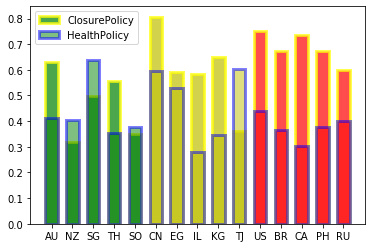

In [31]:
plt.bar(x, y1, alpha=0.7, width=0.6, color='gggggyyyyyrrrrr', edgecolor='yellow', label='ClosurePolicy', lw=3)
plt.bar(x, y2, alpha=0.5, width=0.6, color='gggggyyyyyrrrrr', edgecolor='blue', label='HealthPolicy', lw=3)
plt.legend(loc='upper left')
plt.show()

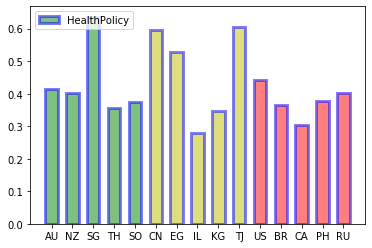

In [32]:
# plt.bar(x, y1, alpha=0.7, width=0.6, color='gggggyyyyyrrrrr', label='ClosurePolicy', lw=3)
plt.bar(x, y2, alpha=0.5, width=0.6, color='gggggyyyyyrrrrr', edgecolor='blue', label='HealthPolicy', lw=3)
plt.legend(loc='upper left')
plt.show()

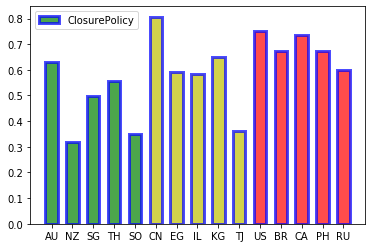

In [33]:
plt.bar(x, y1, alpha=0.7, width=0.6, color='gggggyyyyyrrrrr', edgecolor='blue', label='ClosurePolicy', lw=3)
# plt.bar(x, y2, alpha=0.5, width=0.6, color='gggggyyyyyrrrrr', edgecolor='blue', label='HealthPolicy', lw=3)
plt.legend(loc='upper left')
plt.show()

In [34]:
x1 = ["SG","CN","CA"]
y11 = [SG_closure_average,CN_closure_average,CA_closure_average]
y22 = [SG_health_average,CN_health_average,CA_health_average]

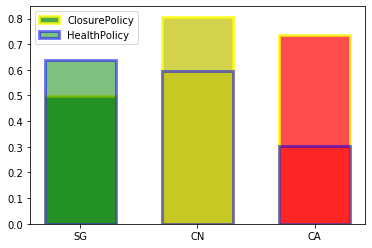

In [35]:
plt.bar(x1, y11, alpha=0.7, width=0.6, color='gyr', edgecolor='yellow', label='ClosurePolicy', lw=3)
plt.bar(x1, y22, alpha=0.5, width=0.6, color='gyr', edgecolor='blue', label='HealthPolicy', lw=3)
plt.legend(loc='upper left')
plt.show()

In [36]:
data_closure_AD = data_closure[data_closure['key'] == "AD"]
s1 = (data_closure_AD['school_closing'] - data_closure_AD['school_closing'].min())/(data_closure_AD['school_closing'].max() - data_closure_AD['school_closing'].min())
data_closure_AD = data_closure_AD.drop(['school_closing'],axis=1)
data_closure_AD.insert(2,'school_closing',s1)
s2 = (data_closure_AD['workplace_closing'] - data_closure_AD['workplace_closing'].min())/(data_closure_AD['workplace_closing'].max() - data_closure_AD['workplace_closing'].min())
data_closure_AD = data_closure_AD.drop(['workplace_closing'],axis=1)
data_closure_AD.insert(3,'workplace_closing',s2)
s3 = (data_closure_AD['cancel_public_events'] - data_closure_AD['cancel_public_events'].min())/(data_closure_AD['cancel_public_events'].max() - data_closure_AD['cancel_public_events'].min())
data_closure_AD = data_closure_AD.drop(['cancel_public_events'],axis=1)
data_closure_AD.insert(4,'cancel_public_events',s3)
s4 = (data_closure_AD['restrictions_on_gatherings'] - data_closure_AD['restrictions_on_gatherings'].min())/(data_closure_AD['restrictions_on_gatherings'].max() - data_closure_AD['restrictions_on_gatherings'].min())
data_closure_AD = data_closure_AD.drop(['restrictions_on_gatherings'],axis=1)
data_closure_AD.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_AD['public_transport_closing'] - data_closure_AD['public_transport_closing'].min())/(data_closure_AD['public_transport_closing'].max() - data_closure_AD['public_transport_closing'].min())
data_closure_AD = data_closure_AD.drop(['public_transport_closing'],axis=1)
data_closure_AD.insert(6,'public_transport_closing',s5)
s6 = (data_closure_AD['stay_at_home_requirements'] - data_closure_AD['stay_at_home_requirements'].min())/(data_closure_AD['stay_at_home_requirements'].max() - data_closure_AD['stay_at_home_requirements'].min())
data_closure_AD = data_closure_AD.drop(['stay_at_home_requirements'],axis=1)
data_closure_AD.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_AD['restrictions_on_internal_movement'] - data_closure_AD['restrictions_on_internal_movement'].min())/(data_closure_AD['restrictions_on_internal_movement'].max() - data_closure_AD['restrictions_on_internal_movement'].min())
data_closure_AD = data_closure_AD.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_AD.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_AD['international_travel_controls'] - data_closure_AD['international_travel_controls'].min())/(data_closure_AD['international_travel_controls'].max() - data_closure_AD['international_travel_controls'].min())
data_closure_AD = data_closure_AD.drop(['international_travel_controls'],axis=1)
data_closure_AD.insert(9,'international_travel_controls',s8)
AD_closure_average_ontime = data_closure_AD.mean(axis = 0) 
AD_closure_average = AD_closure_average_ontime.mean()
print(AD_closure_average)
data_health_AD = data_health[data_health['key'] == "AD"]
s1 = (data_health_AD['testing_policy'] - data_health_AD['testing_policy'].min())/(data_health_AD['testing_policy'].max() - data_health_AD['testing_policy'].min())
data_health_AD = data_health_AD.drop(['testing_policy'],axis=1)
data_health_AD.insert(2,'testing_policy',s1)
s2 = (data_health_AD['contact_tracing'] - data_health_AD['contact_tracing'].min())/(data_health_AD['contact_tracing'].max() - data_health_AD['contact_tracing'].min())
data_health_AD = data_health_AD.drop(['contact_tracing'],axis=1)
data_health_AD.insert(3,'contact_tracing',s2)
s3 = (data_health_AD['emergency_investment_in_healthcare'] - data_health_AD['emergency_investment_in_healthcare'].min())/(data_health_AD['emergency_investment_in_healthcare'].max() - data_health_AD['emergency_investment_in_healthcare'].min())
data_health_AD = data_health_AD.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_AD.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_AD['investment_in_vaccines'] - data_health_AD['investment_in_vaccines'].min())/(data_health_AD['investment_in_vaccines'].max() - data_health_AD['investment_in_vaccines'].min())
data_health_AD = data_health_AD.drop(['investment_in_vaccines'],axis=1)
data_health_AD.insert(5,'investment_in_vaccines',s4)
AD_health_average_ontime = data_health_AD.mean(axis = 0) 
AD_health_average = AD_health_average_ontime.mean()
print(AD_health_average)

data_closure_ME = data_closure[data_closure['key'] == "ME"]
s1 = (data_closure_ME['school_closing'] - data_closure_ME['school_closing'].min())/(data_closure_ME['school_closing'].max() - data_closure_ME['school_closing'].min())
data_closure_ME = data_closure_ME.drop(['school_closing'],axis=1)
data_closure_ME.insert(2,'school_closing',s1)
s2 = (data_closure_ME['workplace_closing'] - data_closure_ME['workplace_closing'].min())/(data_closure_ME['workplace_closing'].max() - data_closure_ME['workplace_closing'].min())
data_closure_ME = data_closure_ME.drop(['workplace_closing'],axis=1)
data_closure_ME.insert(3,'workplace_closing',s2)
s3 = (data_closure_ME['cancel_public_events'] - data_closure_ME['cancel_public_events'].min())/(data_closure_ME['cancel_public_events'].max() - data_closure_ME['cancel_public_events'].min())
data_closure_ME = data_closure_ME.drop(['cancel_public_events'],axis=1)
data_closure_ME.insert(4,'cancel_public_events',s3)
s4 = (data_closure_ME['restrictions_on_gatherings'] - data_closure_ME['restrictions_on_gatherings'].min())/(data_closure_ME['restrictions_on_gatherings'].max() - data_closure_ME['restrictions_on_gatherings'].min())
data_closure_ME = data_closure_ME.drop(['restrictions_on_gatherings'],axis=1)
data_closure_ME.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_ME['public_transport_closing'] - data_closure_ME['public_transport_closing'].min())/(data_closure_ME['public_transport_closing'].max() - data_closure_ME['public_transport_closing'].min())
data_closure_ME = data_closure_ME.drop(['public_transport_closing'],axis=1)
data_closure_ME.insert(6,'public_transport_closing',s5)
s6 = (data_closure_ME['stay_at_home_requirements'] - data_closure_ME['stay_at_home_requirements'].min())/(data_closure_ME['stay_at_home_requirements'].max() - data_closure_ME['stay_at_home_requirements'].min())
data_closure_ME = data_closure_ME.drop(['stay_at_home_requirements'],axis=1)
data_closure_ME.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_ME['restrictions_on_internal_movement'] - data_closure_ME['restrictions_on_internal_movement'].min())/(data_closure_ME['restrictions_on_internal_movement'].max() - data_closure_ME['restrictions_on_internal_movement'].min())
data_closure_ME = data_closure_ME.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_ME.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_ME['international_travel_controls'] - data_closure_ME['international_travel_controls'].min())/(data_closure_ME['international_travel_controls'].max() - data_closure_ME['international_travel_controls'].min())
data_closure_ME = data_closure_ME.drop(['international_travel_controls'],axis=1)
data_closure_ME.insert(9,'international_travel_controls',s8)
ME_closure_average_ontime = data_closure_ME.mean(axis = 0) 
ME_closure_average = ME_closure_average_ontime.mean()
print(ME_closure_average)
data_health_ME = data_health[data_health['key'] == "ME"]
s1 = (data_health_ME['testing_policy'] - data_health_ME['testing_policy'].min())/(data_health_ME['testing_policy'].max() - data_health_ME['testing_policy'].min())
data_health_ME = data_health_ME.drop(['testing_policy'],axis=1)
data_health_ME.insert(2,'testing_policy',s1)
s2 = (data_health_ME['contact_tracing'] - data_health_ME['contact_tracing'].min())/(data_health_ME['contact_tracing'].max() - data_health_ME['contact_tracing'].min())
data_health_ME = data_health_ME.drop(['contact_tracing'],axis=1)
data_health_ME.insert(3,'contact_tracing',s2)
s3 = (data_health_ME['emergency_investment_in_healthcare'] - data_health_ME['emergency_investment_in_healthcare'].min())/(data_health_ME['emergency_investment_in_healthcare'].max() - data_health_ME['emergency_investment_in_healthcare'].min())
data_health_ME = data_health_ME.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_ME.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_ME['investment_in_vaccines'] - data_health_ME['investment_in_vaccines'].min())/(data_health_ME['investment_in_vaccines'].max() - data_health_ME['investment_in_vaccines'].min())
data_health_ME = data_health_ME.drop(['investment_in_vaccines'],axis=1)
data_health_ME.insert(5,'investment_in_vaccines',s4)
ME_health_average_ontime = data_health_ME.mean(axis = 0) 
ME_health_average = ME_health_average_ontime.mean()
print(ME_health_average)


data_closure_LU = data_closure[data_closure['key'] == "LU"]
s1 = (data_closure_LU['school_closing'] - data_closure_LU['school_closing'].min())/(data_closure_LU['school_closing'].max() - data_closure_LU['school_closing'].min())
data_closure_LU = data_closure_LU.drop(['school_closing'],axis=1)
data_closure_LU.insert(2,'school_closing',s1)
s2 = (data_closure_LU['workplace_closing'] - data_closure_LU['workplace_closing'].min())/(data_closure_LU['workplace_closing'].max() - data_closure_LU['workplace_closing'].min())
data_closure_LU = data_closure_LU.drop(['workplace_closing'],axis=1)
data_closure_LU.insert(3,'workplace_closing',s2)
s3 = (data_closure_LU['cancel_public_events'] - data_closure_LU['cancel_public_events'].min())/(data_closure_LU['cancel_public_events'].max() - data_closure_LU['cancel_public_events'].min())
data_closure_LU = data_closure_LU.drop(['cancel_public_events'],axis=1)
data_closure_LU.insert(4,'cancel_public_events',s3)
s4 = (data_closure_LU['restrictions_on_gatherings'] - data_closure_LU['restrictions_on_gatherings'].min())/(data_closure_LU['restrictions_on_gatherings'].max() - data_closure_LU['restrictions_on_gatherings'].min())
data_closure_LU = data_closure_LU.drop(['restrictions_on_gatherings'],axis=1)
data_closure_LU.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_LU['public_transport_closing'] - data_closure_LU['public_transport_closing'].min())/(data_closure_LU['public_transport_closing'].max() - data_closure_LU['public_transport_closing'].min())
data_closure_LU = data_closure_LU.drop(['public_transport_closing'],axis=1)
data_closure_LU.insert(6,'public_transport_closing',s5)
s6 = (data_closure_LU['stay_at_home_requirements'] - data_closure_LU['stay_at_home_requirements'].min())/(data_closure_LU['stay_at_home_requirements'].max() - data_closure_LU['stay_at_home_requirements'].min())
data_closure_LU = data_closure_LU.drop(['stay_at_home_requirements'],axis=1)
data_closure_LU.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_LU['restrictions_on_internal_movement'] - data_closure_LU['restrictions_on_internal_movement'].min())/(data_closure_LU['restrictions_on_internal_movement'].max() - data_closure_LU['restrictions_on_internal_movement'].min())
data_closure_LU = data_closure_LU.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_LU.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_LU['international_travel_controls'] - data_closure_LU['international_travel_controls'].min())/(data_closure_LU['international_travel_controls'].max() - data_closure_LU['international_travel_controls'].min())
data_closure_LU = data_closure_LU.drop(['international_travel_controls'],axis=1)
data_closure_LU.insert(9,'international_travel_controls',s8)
LU_closure_average_ontime = data_closure_LU.mean(axis = 0) 
LU_closure_average = LU_closure_average_ontime.mean()
print(LU_closure_average)
data_health_LU = data_health[data_health['key'] == "LU"]
s1 = (data_health_LU['testing_policy'] - data_health_LU['testing_policy'].min())/(data_health_LU['testing_policy'].max() - data_health_LU['testing_policy'].min())
data_health_LU = data_health_LU.drop(['testing_policy'],axis=1)
data_health_LU.insert(2,'testing_policy',s1)
s2 = (data_health_LU['contact_tracing'] - data_health_LU['contact_tracing'].min())/(data_health_LU['contact_tracing'].max() - data_health_LU['contact_tracing'].min())
data_health_LU = data_health_LU.drop(['contact_tracing'],axis=1)
data_health_LU.insert(3,'contact_tracing',s2)
s3 = (data_health_LU['emergency_investment_in_healthcare'] - data_health_LU['emergency_investment_in_healthcare'].min())/(data_health_LU['emergency_investment_in_healthcare'].max() - data_health_LU['emergency_investment_in_healthcare'].min())
data_health_LU = data_health_LU.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_LU.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_LU['investment_in_vaccines'] - data_health_LU['investment_in_vaccines'].min())/(data_health_LU['investment_in_vaccines'].max() - data_health_LU['investment_in_vaccines'].min())
data_health_LU = data_health_LU.drop(['investment_in_vaccines'],axis=1)
data_health_LU.insert(5,'investment_in_vaccines',s4)
LU_health_average_ontime = data_health_LU.mean(axis = 0) 
LU_health_average = LU_health_average_ontime.mean()
print(LU_health_average)


data_closure_SM = data_closure[data_closure['key'] == "SM"]
s1 = (data_closure_SM['school_closing'] - data_closure_SM['school_closing'].min())/(data_closure_SM['school_closing'].max() - data_closure_SM['school_closing'].min())
data_closure_SM = data_closure_SM.drop(['school_closing'],axis=1)
data_closure_SM.insert(2,'school_closing',s1)
s2 = (data_closure_SM['workplace_closing'] - data_closure_SM['workplace_closing'].min())/(data_closure_SM['workplace_closing'].max() - data_closure_SM['workplace_closing'].min())
data_closure_SM = data_closure_SM.drop(['workplace_closing'],axis=1)
data_closure_SM.insert(3,'workplace_closing',s2)
s3 = (data_closure_SM['cancel_public_events'] - data_closure_SM['cancel_public_events'].min())/(data_closure_SM['cancel_public_events'].max() - data_closure_SM['cancel_public_events'].min())
data_closure_SM = data_closure_SM.drop(['cancel_public_events'],axis=1)
data_closure_SM.insert(4,'cancel_public_events',s3)
s4 = (data_closure_SM['restrictions_on_gatherings'] - data_closure_SM['restrictions_on_gatherings'].min())/(data_closure_SM['restrictions_on_gatherings'].max() - data_closure_SM['restrictions_on_gatherings'].min())
data_closure_SM = data_closure_SM.drop(['restrictions_on_gatherings'],axis=1)
data_closure_SM.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_SM['public_transport_closing'] - data_closure_SM['public_transport_closing'].min())/(data_closure_SM['public_transport_closing'].max() - data_closure_SM['public_transport_closing'].min())
data_closure_SM = data_closure_SM.drop(['public_transport_closing'],axis=1)
data_closure_SM.insert(6,'public_transport_closing',s5)
s6 = (data_closure_SM['stay_at_home_requirements'] - data_closure_SM['stay_at_home_requirements'].min())/(data_closure_SM['stay_at_home_requirements'].max() - data_closure_SM['stay_at_home_requirements'].min())
data_closure_SM = data_closure_SM.drop(['stay_at_home_requirements'],axis=1)
data_closure_SM.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_SM['restrictions_on_internal_movement'] - data_closure_SM['restrictions_on_internal_movement'].min())/(data_closure_SM['restrictions_on_internal_movement'].max() - data_closure_SM['restrictions_on_internal_movement'].min())
data_closure_SM = data_closure_SM.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_SM.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_SM['international_travel_controls'] - data_closure_SM['international_travel_controls'].min())/(data_closure_SM['international_travel_controls'].max() - data_closure_SM['international_travel_controls'].min())
data_closure_SM = data_closure_SM.drop(['international_travel_controls'],axis=1)
data_closure_SM.insert(9,'international_travel_controls',s8)
SM_closure_average_ontime = data_closure_SM.mean(axis = 0) 
SM_closure_average = SM_closure_average_ontime.mean()
print(SM_closure_average)
data_health_SM = data_health[data_health['key'] == "SM"]
s1 = (data_health_SM['testing_policy'] - data_health_SM['testing_policy'].min())/(data_health_SM['testing_policy'].max() - data_health_SM['testing_policy'].min())
data_health_SM = data_health_SM.drop(['testing_policy'],axis=1)
data_health_SM.insert(2,'testing_policy',s1)
s2 = (data_health_SM['contact_tracing'] - data_health_SM['contact_tracing'].min())/(data_health_SM['contact_tracing'].max() - data_health_SM['contact_tracing'].min())
data_health_SM = data_health_SM.drop(['contact_tracing'],axis=1)
data_health_SM.insert(3,'contact_tracing',s2)
s3 = (data_health_SM['emergency_investment_in_healthcare'] - data_health_SM['emergency_investment_in_healthcare'].min())/(data_health_SM['emergency_investment_in_healthcare'].max() - data_health_SM['emergency_investment_in_healthcare'].min())
data_health_SM = data_health_SM.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_SM.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_SM['investment_in_vaccines'] - data_health_SM['investment_in_vaccines'].min())/(data_health_SM['investment_in_vaccines'].max() - data_health_SM['investment_in_vaccines'].min())
data_health_SM = data_health_SM.drop(['investment_in_vaccines'],axis=1)
data_health_SM.insert(5,'investment_in_vaccines',s4)
SM_health_average_ontime = data_health_SM.mean(axis = 0) 
SM_health_average = SM_health_average_ontime.mean()
print(SM_health_average)

data_closure_BH = data_closure[data_closure['key'] == "BH"]
s1 = (data_closure_BH['school_closing'] - data_closure_BH['school_closing'].min())/(data_closure_BH['school_closing'].max() - data_closure_BH['school_closing'].min())
data_closure_BH = data_closure_BH.drop(['school_closing'],axis=1)
data_closure_BH.insert(2,'school_closing',s1)
s2 = (data_closure_BH['workplace_closing'] - data_closure_BH['workplace_closing'].min())/(data_closure_BH['workplace_closing'].max() - data_closure_BH['workplace_closing'].min())
data_closure_BH = data_closure_BH.drop(['workplace_closing'],axis=1)
data_closure_BH.insert(3,'workplace_closing',s2)
s3 = (data_closure_BH['cancel_public_events'] - data_closure_BH['cancel_public_events'].min())/(data_closure_BH['cancel_public_events'].max() - data_closure_BH['cancel_public_events'].min())
data_closure_BH = data_closure_BH.drop(['cancel_public_events'],axis=1)
data_closure_BH.insert(4,'cancel_public_events',s3)
s4 = (data_closure_BH['restrictions_on_gatherings'] - data_closure_BH['restrictions_on_gatherings'].min())/(data_closure_BH['restrictions_on_gatherings'].max() - data_closure_BH['restrictions_on_gatherings'].min())
data_closure_BH = data_closure_BH.drop(['restrictions_on_gatherings'],axis=1)
data_closure_BH.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_BH['public_transport_closing'] - data_closure_BH['public_transport_closing'].min())/(data_closure_BH['public_transport_closing'].max() - data_closure_BH['public_transport_closing'].min())
data_closure_BH = data_closure_BH.drop(['public_transport_closing'],axis=1)
data_closure_BH.insert(6,'public_transport_closing',s5)
s6 = (data_closure_BH['stay_at_home_requirements'] - data_closure_BH['stay_at_home_requirements'].min())/(data_closure_BH['stay_at_home_requirements'].max() - data_closure_BH['stay_at_home_requirements'].min())
data_closure_BH = data_closure_BH.drop(['stay_at_home_requirements'],axis=1)
data_closure_BH.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_BH['restrictions_on_internal_movement'] - data_closure_BH['restrictions_on_internal_movement'].min())/(data_closure_BH['restrictions_on_internal_movement'].max() - data_closure_BH['restrictions_on_internal_movement'].min())
data_closure_BH = data_closure_BH.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_BH.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_BH['international_travel_controls'] - data_closure_BH['international_travel_controls'].min())/(data_closure_BH['international_travel_controls'].max() - data_closure_BH['international_travel_controls'].min())
data_closure_BH = data_closure_BH.drop(['international_travel_controls'],axis=1)
data_closure_BH.insert(9,'international_travel_controls',s8)
BH_closure_average_ontime = data_closure_BH.mean(axis = 0) 
BH_closure_average = BH_closure_average_ontime.mean()
print(BH_closure_average)
data_health_BH = data_health[data_health['key'] == "BH"]
s1 = (data_health_BH['testing_policy'] - data_health_BH['testing_policy'].min())/(data_health_BH['testing_policy'].max() - data_health_BH['testing_policy'].min())
data_health_BH = data_health_BH.drop(['testing_policy'],axis=1)
data_health_BH.insert(2,'testing_policy',s1)
s2 = (data_health_BH['contact_tracing'] - data_health_BH['contact_tracing'].min())/(data_health_BH['contact_tracing'].max() - data_health_BH['contact_tracing'].min())
data_health_BH = data_health_BH.drop(['contact_tracing'],axis=1)
data_health_BH.insert(3,'contact_tracing',s2)
s3 = (data_health_BH['emergency_investment_in_healthcare'] - data_health_BH['emergency_investment_in_healthcare'].min())/(data_health_BH['emergency_investment_in_healthcare'].max() - data_health_BH['emergency_investment_in_healthcare'].min())
data_health_BH = data_health_BH.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_BH.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_BH['investment_in_vaccines'] - data_health_BH['investment_in_vaccines'].min())/(data_health_BH['investment_in_vaccines'].max() - data_health_BH['investment_in_vaccines'].min())
data_health_BH = data_health_BH.drop(['investment_in_vaccines'],axis=1)
data_health_BH.insert(5,'investment_in_vaccines',s4)
BH_health_average_ontime = data_health_BH.mean(axis = 0) 
BH_health_average = BH_health_average_ontime.mean()
print(BH_health_average)

data_closure_CZ = data_closure[data_closure['key'] == "CZ"]
s1 = (data_closure_CZ['school_closing'] - data_closure_CZ['school_closing'].min())/(data_closure_CZ['school_closing'].max() - data_closure_CZ['school_closing'].min())
data_closure_CZ = data_closure_CZ.drop(['school_closing'],axis=1)
data_closure_CZ.insert(2,'school_closing',s1)
s2 = (data_closure_CZ['workplace_closing'] - data_closure_CZ['workplace_closing'].min())/(data_closure_CZ['workplace_closing'].max() - data_closure_CZ['workplace_closing'].min())
data_closure_CZ = data_closure_CZ.drop(['workplace_closing'],axis=1)
data_closure_CZ.insert(3,'workplace_closing',s2)
s3 = (data_closure_CZ['cancel_public_events'] - data_closure_CZ['cancel_public_events'].min())/(data_closure_CZ['cancel_public_events'].max() - data_closure_CZ['cancel_public_events'].min())
data_closure_CZ = data_closure_CZ.drop(['cancel_public_events'],axis=1)
data_closure_CZ.insert(4,'cancel_public_events',s3)
s4 = (data_closure_CZ['restrictions_on_gatherings'] - data_closure_CZ['restrictions_on_gatherings'].min())/(data_closure_CZ['restrictions_on_gatherings'].max() - data_closure_CZ['restrictions_on_gatherings'].min())
data_closure_CZ = data_closure_CZ.drop(['restrictions_on_gatherings'],axis=1)
data_closure_CZ.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_CZ['public_transport_closing'] - data_closure_CZ['public_transport_closing'].min())/(data_closure_CZ['public_transport_closing'].max() - data_closure_CZ['public_transport_closing'].min())
data_closure_CZ = data_closure_CZ.drop(['public_transport_closing'],axis=1)
data_closure_CZ.insert(6,'public_transport_closing',s5)
s6 = (data_closure_CZ['stay_at_home_requirements'] - data_closure_CZ['stay_at_home_requirements'].min())/(data_closure_CZ['stay_at_home_requirements'].max() - data_closure_CZ['stay_at_home_requirements'].min())
data_closure_CZ = data_closure_CZ.drop(['stay_at_home_requirements'],axis=1)
data_closure_CZ.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_CZ['restrictions_on_internal_movement'] - data_closure_CZ['restrictions_on_internal_movement'].min())/(data_closure_CZ['restrictions_on_internal_movement'].max() - data_closure_CZ['restrictions_on_internal_movement'].min())
data_closure_CZ = data_closure_CZ.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_CZ.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_CZ['international_travel_controls'] - data_closure_CZ['international_travel_controls'].min())/(data_closure_CZ['international_travel_controls'].max() - data_closure_CZ['international_travel_controls'].min())
data_closure_CZ = data_closure_CZ.drop(['international_travel_controls'],axis=1)
data_closure_CZ.insert(9,'international_travel_controls',s8)
CZ_closure_average_ontime = data_closure_CZ.mean(axis = 0) 
CZ_closure_average = CZ_closure_average_ontime.mean()
print(CZ_closure_average)
data_health_CZ = data_health[data_health['key'] == "CZ"]
s1 = (data_health_CZ['testing_policy'] - data_health_CZ['testing_policy'].min())/(data_health_CZ['testing_policy'].max() - data_health_CZ['testing_policy'].min())
data_health_CZ = data_health_CZ.drop(['testing_policy'],axis=1)
data_health_CZ.insert(2,'testing_policy',s1)
s2 = (data_health_CZ['contact_tracing'] - data_health_CZ['contact_tracing'].min())/(data_health_CZ['contact_tracing'].max() - data_health_CZ['contact_tracing'].min())
data_health_CZ = data_health_CZ.drop(['contact_tracing'],axis=1)
data_health_CZ.insert(3,'contact_tracing',s2)
s3 = (data_health_CZ['emergency_investment_in_healthcare'] - data_health_CZ['emergency_investment_in_healthcare'].min())/(data_health_CZ['emergency_investment_in_healthcare'].max() - data_health_CZ['emergency_investment_in_healthcare'].min())
data_health_CZ = data_health_CZ.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_CZ.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_CZ['investment_in_vaccines'] - data_health_CZ['investment_in_vaccines'].min())/(data_health_CZ['investment_in_vaccines'].max() - data_health_CZ['investment_in_vaccines'].min())
data_health_CZ = data_health_CZ.drop(['investment_in_vaccines'],axis=1)
data_health_CZ.insert(5,'investment_in_vaccines',s4)
CZ_health_average_ontime = data_health_CZ.mean(axis = 0) 
CZ_health_average = CZ_health_average_ontime.mean()
print(CZ_health_average)

data_closure_BE = data_closure[data_closure['key'] == "BE"]
s1 = (data_closure_BE['school_closing'] - data_closure_BE['school_closing'].min())/(data_closure_BE['school_closing'].max() - data_closure_BE['school_closing'].min())
data_closure_BE = data_closure_BE.drop(['school_closing'],axis=1)
data_closure_BE.insert(2,'school_closing',s1)
s2 = (data_closure_BE['workplace_closing'] - data_closure_BE['workplace_closing'].min())/(data_closure_BE['workplace_closing'].max() - data_closure_BE['workplace_closing'].min())
data_closure_BE = data_closure_BE.drop(['workplace_closing'],axis=1)
data_closure_BE.insert(3,'workplace_closing',s2)
s3 = (data_closure_BE['cancel_public_events'] - data_closure_BE['cancel_public_events'].min())/(data_closure_BE['cancel_public_events'].max() - data_closure_BE['cancel_public_events'].min())
data_closure_BE = data_closure_BE.drop(['cancel_public_events'],axis=1)
data_closure_BE.insert(4,'cancel_public_events',s3)
s4 = (data_closure_BE['restrictions_on_gatherings'] - data_closure_BE['restrictions_on_gatherings'].min())/(data_closure_BE['restrictions_on_gatherings'].max() - data_closure_BE['restrictions_on_gatherings'].min())
data_closure_BE = data_closure_BE.drop(['restrictions_on_gatherings'],axis=1)
data_closure_BE.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_BE['public_transport_closing'] - data_closure_BE['public_transport_closing'].min())/(data_closure_BE['public_transport_closing'].max() - data_closure_BE['public_transport_closing'].min())
data_closure_BE = data_closure_BE.drop(['public_transport_closing'],axis=1)
data_closure_BE.insert(6,'public_transport_closing',s5)
s6 = (data_closure_BE['stay_at_home_requirements'] - data_closure_BE['stay_at_home_requirements'].min())/(data_closure_BE['stay_at_home_requirements'].max() - data_closure_BE['stay_at_home_requirements'].min())
data_closure_BE = data_closure_BE.drop(['stay_at_home_requirements'],axis=1)
data_closure_BE.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_BE['restrictions_on_internal_movement'] - data_closure_BE['restrictions_on_internal_movement'].min())/(data_closure_BE['restrictions_on_internal_movement'].max() - data_closure_BE['restrictions_on_internal_movement'].min())
data_closure_BE = data_closure_BE.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_BE.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_BE['international_travel_controls'] - data_closure_BE['international_travel_controls'].min())/(data_closure_BE['international_travel_controls'].max() - data_closure_BE['international_travel_controls'].min())
data_closure_BE = data_closure_BE.drop(['international_travel_controls'],axis=1)
data_closure_BE.insert(9,'international_travel_controls',s8)
BE_closure_average_ontime = data_closure_BE.mean(axis = 0) 
BE_closure_average = BE_closure_average_ontime.mean()
print(BE_closure_average)
data_health_BE = data_health[data_health['key'] == "BE"]
s1 = (data_health_BE['testing_policy'] - data_health_BE['testing_policy'].min())/(data_health_BE['testing_policy'].max() - data_health_BE['testing_policy'].min())
data_health_BE = data_health_BE.drop(['testing_policy'],axis=1)
data_health_BE.insert(2,'testing_policy',s1)
s2 = (data_health_BE['contact_tracing'] - data_health_BE['contact_tracing'].min())/(data_health_BE['contact_tracing'].max() - data_health_BE['contact_tracing'].min())
data_health_BE = data_health_BE.drop(['contact_tracing'],axis=1)
data_health_BE.insert(3,'contact_tracing',s2)
s3 = (data_health_BE['emergency_investment_in_healthcare'] - data_health_BE['emergency_investment_in_healthcare'].min())/(data_health_BE['emergency_investment_in_healthcare'].max() - data_health_BE['emergency_investment_in_healthcare'].min())
data_health_BE = data_health_BE.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_BE.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_BE['investment_in_vaccines'] - data_health_BE['investment_in_vaccines'].min())/(data_health_BE['investment_in_vaccines'].max() - data_health_BE['investment_in_vaccines'].min())
data_health_BE = data_health_BE.drop(['investment_in_vaccines'],axis=1)
data_health_BE.insert(5,'investment_in_vaccines',s4)
BE_health_average_ontime = data_health_BE.mean(axis = 0) 
BE_health_average = BE_health_average_ontime.mean()
print(BE_health_average)

data_closure_QA = data_closure[data_closure['key'] == "QA"]
s1 = (data_closure_QA['school_closing'] - data_closure_QA['school_closing'].min())/(data_closure_QA['school_closing'].max() - data_closure_QA['school_closing'].min())
data_closure_QA = data_closure_QA.drop(['school_closing'],axis=1)
data_closure_QA.insert(2,'school_closing',s1)
s2 = (data_closure_QA['workplace_closing'] - data_closure_QA['workplace_closing'].min())/(data_closure_QA['workplace_closing'].max() - data_closure_QA['workplace_closing'].min())
data_closure_QA = data_closure_QA.drop(['workplace_closing'],axis=1)
data_closure_QA.insert(3,'workplace_closing',s2)
s3 = (data_closure_QA['cancel_public_events'] - data_closure_QA['cancel_public_events'].min())/(data_closure_QA['cancel_public_events'].max() - data_closure_QA['cancel_public_events'].min())
data_closure_QA = data_closure_QA.drop(['cancel_public_events'],axis=1)
data_closure_QA.insert(4,'cancel_public_events',s3)
s4 = (data_closure_QA['restrictions_on_gatherings'] - data_closure_QA['restrictions_on_gatherings'].min())/(data_closure_QA['restrictions_on_gatherings'].max() - data_closure_QA['restrictions_on_gatherings'].min())
data_closure_QA = data_closure_QA.drop(['restrictions_on_gatherings'],axis=1)
data_closure_QA.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_QA['public_transport_closing'] - data_closure_QA['public_transport_closing'].min())/(data_closure_QA['public_transport_closing'].max() - data_closure_QA['public_transport_closing'].min())
data_closure_QA = data_closure_QA.drop(['public_transport_closing'],axis=1)
data_closure_QA.insert(6,'public_transport_closing',s5)
s6 = (data_closure_QA['stay_at_home_requirements'] - data_closure_QA['stay_at_home_requirements'].min())/(data_closure_QA['stay_at_home_requirements'].max() - data_closure_QA['stay_at_home_requirements'].min())
data_closure_QA = data_closure_QA.drop(['stay_at_home_requirements'],axis=1)
data_closure_QA.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_QA['restrictions_on_internal_movement'] - data_closure_QA['restrictions_on_internal_movement'].min())/(data_closure_QA['restrictions_on_internal_movement'].max() - data_closure_QA['restrictions_on_internal_movement'].min())
data_closure_QA = data_closure_QA.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_QA.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_QA['international_travel_controls'] - data_closure_QA['international_travel_controls'].min())/(data_closure_QA['international_travel_controls'].max() - data_closure_QA['international_travel_controls'].min())
data_closure_QA = data_closure_QA.drop(['international_travel_controls'],axis=1)
data_closure_QA.insert(9,'international_travel_controls',s8)
QA_closure_average_ontime = data_closure_QA.mean(axis = 0) 
QA_closure_average = QA_closure_average_ontime.mean()
print(QA_closure_average)
data_health_QA = data_health[data_health['key'] == "QA"]
s1 = (data_health_QA['testing_policy'] - data_health_QA['testing_policy'].min())/(data_health_QA['testing_policy'].max() - data_health_QA['testing_policy'].min())
data_health_QA = data_health_QA.drop(['testing_policy'],axis=1)
data_health_QA.insert(2,'testing_policy',s1)
s2 = (data_health_QA['contact_tracing'] - data_health_QA['contact_tracing'].min())/(data_health_QA['contact_tracing'].max() - data_health_QA['contact_tracing'].min())
data_health_QA = data_health_QA.drop(['contact_tracing'],axis=1)
data_health_QA.insert(3,'contact_tracing',s2)
s3 = (data_health_QA['emergency_investment_in_healthcare'] - data_health_QA['emergency_investment_in_healthcare'].min())/(data_health_QA['emergency_investment_in_healthcare'].max() - data_health_QA['emergency_investment_in_healthcare'].min())
data_health_QA = data_health_QA.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_QA.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_QA['investment_in_vaccines'] - data_health_QA['investment_in_vaccines'].min())/(data_health_QA['investment_in_vaccines'].max() - data_health_QA['investment_in_vaccines'].min())
data_health_QA = data_health_QA.drop(['investment_in_vaccines'],axis=1)
data_health_QA.insert(5,'investment_in_vaccines',s4)
QA_health_average_ontime = data_health_QA.mean(axis = 0) 
QA_health_average = QA_health_average_ontime.mean()
print(QA_health_average)

data_closure_AM = data_closure[data_closure['key'] == "AM"]
s1 = (data_closure_AM['school_closing'] - data_closure_AM['school_closing'].min())/(data_closure_AM['school_closing'].max() - data_closure_AM['school_closing'].min())
data_closure_AM = data_closure_AM.drop(['school_closing'],axis=1)
data_closure_AM.insert(2,'school_closing',s1)
s2 = (data_closure_AM['workplace_closing'] - data_closure_AM['workplace_closing'].min())/(data_closure_AM['workplace_closing'].max() - data_closure_AM['workplace_closing'].min())
data_closure_AM = data_closure_AM.drop(['workplace_closing'],axis=1)
data_closure_AM.insert(3,'workplace_closing',s2)
s3 = (data_closure_AM['cancel_public_events'] - data_closure_AM['cancel_public_events'].min())/(data_closure_AM['cancel_public_events'].max() - data_closure_AM['cancel_public_events'].min())
data_closure_AM = data_closure_AM.drop(['cancel_public_events'],axis=1)
data_closure_AM.insert(4,'cancel_public_events',s3)
s4 = (data_closure_AM['restrictions_on_gatherings'] - data_closure_AM['restrictions_on_gatherings'].min())/(data_closure_AM['restrictions_on_gatherings'].max() - data_closure_AM['restrictions_on_gatherings'].min())
data_closure_AM = data_closure_AM.drop(['restrictions_on_gatherings'],axis=1)
data_closure_AM.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_AM['public_transport_closing'] - data_closure_AM['public_transport_closing'].min())/(data_closure_AM['public_transport_closing'].max() - data_closure_AM['public_transport_closing'].min())
data_closure_AM = data_closure_AM.drop(['public_transport_closing'],axis=1)
data_closure_AM.insert(6,'public_transport_closing',s5)
s6 = (data_closure_AM['stay_at_home_requirements'] - data_closure_AM['stay_at_home_requirements'].min())/(data_closure_AM['stay_at_home_requirements'].max() - data_closure_AM['stay_at_home_requirements'].min())
data_closure_AM = data_closure_AM.drop(['stay_at_home_requirements'],axis=1)
data_closure_AM.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_AM['restrictions_on_internal_movement'] - data_closure_AM['restrictions_on_internal_movement'].min())/(data_closure_AM['restrictions_on_internal_movement'].max() - data_closure_AM['restrictions_on_internal_movement'].min())
data_closure_AM = data_closure_AM.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_AM.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_AM['international_travel_controls'] - data_closure_AM['international_travel_controls'].min())/(data_closure_AM['international_travel_controls'].max() - data_closure_AM['international_travel_controls'].min())
data_closure_AM = data_closure_AM.drop(['international_travel_controls'],axis=1)
data_closure_AM.insert(9,'international_travel_controls',s8)
AM_closure_average_ontime = data_closure_AM.mean(axis = 0) 
AM_closure_average = AM_closure_average_ontime.mean()
print(AM_closure_average)
data_health_AM = data_health[data_health['key'] == "AM"]
s1 = (data_health_AM['testing_policy'] - data_health_AM['testing_policy'].min())/(data_health_AM['testing_policy'].max() - data_health_AM['testing_policy'].min())
data_health_AM = data_health_AM.drop(['testing_policy'],axis=1)
data_health_AM.insert(2,'testing_policy',s1)
s2 = (data_health_AM['contact_tracing'] - data_health_AM['contact_tracing'].min())/(data_health_AM['contact_tracing'].max() - data_health_AM['contact_tracing'].min())
data_health_AM = data_health_AM.drop(['contact_tracing'],axis=1)
data_health_AM.insert(3,'contact_tracing',s2)
s3 = (data_health_AM['emergency_investment_in_healthcare'] - data_health_AM['emergency_investment_in_healthcare'].min())/(data_health_AM['emergency_investment_in_healthcare'].max() - data_health_AM['emergency_investment_in_healthcare'].min())
data_health_AM = data_health_AM.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_AM.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_AM['investment_in_vaccines'] - data_health_AM['investment_in_vaccines'].min())/(data_health_AM['investment_in_vaccines'].max() - data_health_AM['investment_in_vaccines'].min())
data_health_AM = data_health_AM.drop(['investment_in_vaccines'],axis=1)
data_health_AM.insert(5,'investment_in_vaccines',s4)
AM_health_average_ontime = data_health_AM.mean(axis = 0) 
AM_health_average = AM_health_average_ontime.mean()
print(AM_health_average)

data_closure_SI = data_closure[data_closure['key'] == "SI"]
s1 = (data_closure_SI['school_closing'] - data_closure_SI['school_closing'].min())/(data_closure_SI['school_closing'].max() - data_closure_SI['school_closing'].min())
data_closure_SI = data_closure_SI.drop(['school_closing'],axis=1)
data_closure_SI.insert(2,'school_closing',s1)
s2 = (data_closure_SI['workplace_closing'] - data_closure_SI['workplace_closing'].min())/(data_closure_SI['workplace_closing'].max() - data_closure_SI['workplace_closing'].min())
data_closure_SI = data_closure_SI.drop(['workplace_closing'],axis=1)
data_closure_SI.insert(3,'workplace_closing',s2)
s3 = (data_closure_SI['cancel_public_events'] - data_closure_SI['cancel_public_events'].min())/(data_closure_SI['cancel_public_events'].max() - data_closure_SI['cancel_public_events'].min())
data_closure_SI = data_closure_SI.drop(['cancel_public_events'],axis=1)
data_closure_SI.insert(4,'cancel_public_events',s3)
s4 = (data_closure_SI['restrictions_on_gatherings'] - data_closure_SI['restrictions_on_gatherings'].min())/(data_closure_SI['restrictions_on_gatherings'].max() - data_closure_SI['restrictions_on_gatherings'].min())
data_closure_SI = data_closure_SI.drop(['restrictions_on_gatherings'],axis=1)
data_closure_SI.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_SI['public_transport_closing'] - data_closure_SI['public_transport_closing'].min())/(data_closure_SI['public_transport_closing'].max() - data_closure_SI['public_transport_closing'].min())
data_closure_SI = data_closure_SI.drop(['public_transport_closing'],axis=1)
data_closure_SI.insert(6,'public_transport_closing',s5)
s6 = (data_closure_SI['stay_at_home_requirements'] - data_closure_SI['stay_at_home_requirements'].min())/(data_closure_SI['stay_at_home_requirements'].max() - data_closure_SI['stay_at_home_requirements'].min())
data_closure_SI = data_closure_SI.drop(['stay_at_home_requirements'],axis=1)
data_closure_SI.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_SI['restrictions_on_internal_movement'] - data_closure_SI['restrictions_on_internal_movement'].min())/(data_closure_SI['restrictions_on_internal_movement'].max() - data_closure_SI['restrictions_on_internal_movement'].min())
data_closure_SI = data_closure_SI.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_SI.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_SI['international_travel_controls'] - data_closure_SI['international_travel_controls'].min())/(data_closure_SI['international_travel_controls'].max() - data_closure_SI['international_travel_controls'].min())
data_closure_SI = data_closure_SI.drop(['international_travel_controls'],axis=1)
data_closure_SI.insert(9,'international_travel_controls',s8)
SI_closure_average_ontime = data_closure_SI.mean(axis = 0) 
SI_closure_average = SI_closure_average_ontime.mean()
print(SI_closure_average)
data_health_SI = data_health[data_health['key'] == "SI"]
s1 = (data_health_SI['testing_policy'] - data_health_SI['testing_policy'].min())/(data_health_SI['testing_policy'].max() - data_health_SI['testing_policy'].min())
data_health_SI = data_health_SI.drop(['testing_policy'],axis=1)
data_health_SI.insert(2,'testing_policy',s1)
s2 = (data_health_SI['contact_tracing'] - data_health_SI['contact_tracing'].min())/(data_health_SI['contact_tracing'].max() - data_health_SI['contact_tracing'].min())
data_health_SI = data_health_SI.drop(['contact_tracing'],axis=1)
data_health_SI.insert(3,'contact_tracing',s2)
s3 = (data_health_SI['emergency_investment_in_healthcare'] - data_health_SI['emergency_investment_in_healthcare'].min())/(data_health_SI['emergency_investment_in_healthcare'].max() - data_health_SI['emergency_investment_in_healthcare'].min())
data_health_SI = data_health_SI.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_SI.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_SI['investment_in_vaccines'] - data_health_SI['investment_in_vaccines'].min())/(data_health_SI['investment_in_vaccines'].max() - data_health_SI['investment_in_vaccines'].min())
data_health_SI = data_health_SI.drop(['investment_in_vaccines'],axis=1)
data_health_SI.insert(5,'investment_in_vaccines',s4)
SI_health_average_ontime = data_health_SI.mean(axis = 0) 
SI_health_average = SI_health_average_ontime.mean()
print(SI_health_average)

data_closure_PA = data_closure[data_closure['key'] == "PA"]
s1 = (data_closure_PA['school_closing'] - data_closure_PA['school_closing'].min())/(data_closure_PA['school_closing'].max() - data_closure_PA['school_closing'].min())
data_closure_PA = data_closure_PA.drop(['school_closing'],axis=1)
data_closure_PA.insert(2,'school_closing',s1)
s2 = (data_closure_PA['workplace_closing'] - data_closure_PA['workplace_closing'].min())/(data_closure_PA['workplace_closing'].max() - data_closure_PA['workplace_closing'].min())
data_closure_PA = data_closure_PA.drop(['workplace_closing'],axis=1)
data_closure_PA.insert(3,'workplace_closing',s2)
s3 = (data_closure_PA['cancel_public_events'] - data_closure_PA['cancel_public_events'].min())/(data_closure_PA['cancel_public_events'].max() - data_closure_PA['cancel_public_events'].min())
data_closure_PA = data_closure_PA.drop(['cancel_public_events'],axis=1)
data_closure_PA.insert(4,'cancel_public_events',s3)
s4 = (data_closure_PA['restrictions_on_gatherings'] - data_closure_PA['restrictions_on_gatherings'].min())/(data_closure_PA['restrictions_on_gatherings'].max() - data_closure_PA['restrictions_on_gatherings'].min())
data_closure_PA = data_closure_PA.drop(['restrictions_on_gatherings'],axis=1)
data_closure_PA.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_PA['public_transport_closing'] - data_closure_PA['public_transport_closing'].min())/(data_closure_PA['public_transport_closing'].max() - data_closure_PA['public_transport_closing'].min())
data_closure_PA = data_closure_PA.drop(['public_transport_closing'],axis=1)
data_closure_PA.insert(6,'public_transport_closing',s5)
s6 = (data_closure_PA['stay_at_home_requirements'] - data_closure_PA['stay_at_home_requirements'].min())/(data_closure_PA['stay_at_home_requirements'].max() - data_closure_PA['stay_at_home_requirements'].min())
data_closure_PA = data_closure_PA.drop(['stay_at_home_requirements'],axis=1)
data_closure_PA.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_PA['restrictions_on_internal_movement'] - data_closure_PA['restrictions_on_internal_movement'].min())/(data_closure_PA['restrictions_on_internal_movement'].max() - data_closure_PA['restrictions_on_internal_movement'].min())
data_closure_PA = data_closure_PA.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_PA.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_PA['international_travel_controls'] - data_closure_PA['international_travel_controls'].min())/(data_closure_PA['international_travel_controls'].max() - data_closure_PA['international_travel_controls'].min())
data_closure_PA = data_closure_PA.drop(['international_travel_controls'],axis=1)
data_closure_PA.insert(9,'international_travel_controls',s8)
PA_closure_average_ontime = data_closure_PA.mean(axis = 0) 
PA_closure_average = PA_closure_average_ontime.mean()
print(PA_closure_average)
data_health_PA = data_health[data_health['key'] == "PA"]
s1 = (data_health_PA['testing_policy'] - data_health_PA['testing_policy'].min())/(data_health_PA['testing_policy'].max() - data_health_PA['testing_policy'].min())
data_health_PA = data_health_PA.drop(['testing_policy'],axis=1)
data_health_PA.insert(2,'testing_policy',s1)
s2 = (data_health_PA['contact_tracing'] - data_health_PA['contact_tracing'].min())/(data_health_PA['contact_tracing'].max() - data_health_PA['contact_tracing'].min())
data_health_PA = data_health_PA.drop(['contact_tracing'],axis=1)
data_health_PA.insert(3,'contact_tracing',s2)
s3 = (data_health_PA['emergency_investment_in_healthcare'] - data_health_PA['emergency_investment_in_healthcare'].min())/(data_health_PA['emergency_investment_in_healthcare'].max() - data_health_PA['emergency_investment_in_healthcare'].min())
data_health_PA = data_health_PA.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_PA.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_PA['investment_in_vaccines'] - data_health_PA['investment_in_vaccines'].min())/(data_health_PA['investment_in_vaccines'].max() - data_health_PA['investment_in_vaccines'].min())
data_health_PA = data_health_PA.drop(['investment_in_vaccines'],axis=1)
data_health_PA.insert(5,'investment_in_vaccines',s4)
PA_health_average_ontime = data_health_PA.mean(axis = 0) 
PA_health_average = PA_health_average_ontime.mean()
print(PA_health_average)

data_closure_CH = data_closure[data_closure['key'] == "CH"]
s1 = (data_closure_CH['school_closing'] - data_closure_CH['school_closing'].min())/(data_closure_CH['school_closing'].max() - data_closure_CH['school_closing'].min())
data_closure_CH = data_closure_CH.drop(['school_closing'],axis=1)
data_closure_CH.insert(2,'school_closing',s1)
s2 = (data_closure_CH['workplace_closing'] - data_closure_CH['workplace_closing'].min())/(data_closure_CH['workplace_closing'].max() - data_closure_CH['workplace_closing'].min())
data_closure_CH = data_closure_CH.drop(['workplace_closing'],axis=1)
data_closure_CH.insert(3,'workplace_closing',s2)
s3 = (data_closure_CH['cancel_public_events'] - data_closure_CH['cancel_public_events'].min())/(data_closure_CH['cancel_public_events'].max() - data_closure_CH['cancel_public_events'].min())
data_closure_CH = data_closure_CH.drop(['cancel_public_events'],axis=1)
data_closure_CH.insert(4,'cancel_public_events',s3)
s4 = (data_closure_CH['restrictions_on_gatherings'] - data_closure_CH['restrictions_on_gatherings'].min())/(data_closure_CH['restrictions_on_gatherings'].max() - data_closure_CH['restrictions_on_gatherings'].min())
data_closure_CH = data_closure_CH.drop(['restrictions_on_gatherings'],axis=1)
data_closure_CH.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_CH['public_transport_closing'] - data_closure_CH['public_transport_closing'].min())/(data_closure_CH['public_transport_closing'].max() - data_closure_CH['public_transport_closing'].min())
data_closure_CH = data_closure_CH.drop(['public_transport_closing'],axis=1)
data_closure_CH.insert(6,'public_transport_closing',s5)
s6 = (data_closure_CH['stay_at_home_requirements'] - data_closure_CH['stay_at_home_requirements'].min())/(data_closure_CH['stay_at_home_requirements'].max() - data_closure_CH['stay_at_home_requirements'].min())
data_closure_CH = data_closure_CH.drop(['stay_at_home_requirements'],axis=1)
data_closure_CH.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_CH['restrictions_on_internal_movement'] - data_closure_CH['restrictions_on_internal_movement'].min())/(data_closure_CH['restrictions_on_internal_movement'].max() - data_closure_CH['restrictions_on_internal_movement'].min())
data_closure_CH = data_closure_CH.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_CH.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_CH['international_travel_controls'] - data_closure_CH['international_travel_controls'].min())/(data_closure_CH['international_travel_controls'].max() - data_closure_CH['international_travel_controls'].min())
data_closure_CH = data_closure_CH.drop(['international_travel_controls'],axis=1)
data_closure_CH.insert(9,'international_travel_controls',s8)
CH_closure_average_ontime = data_closure_CH.mean(axis = 0) 
CH_closure_average = CH_closure_average_ontime.mean()
print(CH_closure_average)
data_health_CH = data_health[data_health['key'] == "CH"]
s1 = (data_health_CH['testing_policy'] - data_health_CH['testing_policy'].min())/(data_health_CH['testing_policy'].max() - data_health_CH['testing_policy'].min())
data_health_CH = data_health_CH.drop(['testing_policy'],axis=1)
data_health_CH.insert(2,'testing_policy',s1)
s2 = (data_health_CH['contact_tracing'] - data_health_CH['contact_tracing'].min())/(data_health_CH['contact_tracing'].max() - data_health_CH['contact_tracing'].min())
data_health_CH = data_health_CH.drop(['contact_tracing'],axis=1)
data_health_CH.insert(3,'contact_tracing',s2)
s3 = (data_health_CH['emergency_investment_in_healthcare'] - data_health_CH['emergency_investment_in_healthcare'].min())/(data_health_CH['emergency_investment_in_healthcare'].max() - data_health_CH['emergency_investment_in_healthcare'].min())
data_health_CH = data_health_CH.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_CH.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_CH['investment_in_vaccines'] - data_health_CH['investment_in_vaccines'].min())/(data_health_CH['investment_in_vaccines'].max() - data_health_CH['investment_in_vaccines'].min())
data_health_CH = data_health_CH.drop(['investment_in_vaccines'],axis=1)
data_health_CH.insert(5,'investment_in_vaccines',s4)
CH_health_average_ontime = data_health_CH.mean(axis = 0) 
CH_health_average = CH_health_average_ontime.mean()
print(CH_health_average)

data_closure_IL = data_closure[data_closure['key'] == "IL"]
s1 = (data_closure_IL['school_closing'] - data_closure_IL['school_closing'].min())/(data_closure_IL['school_closing'].max() - data_closure_IL['school_closing'].min())
data_closure_IL = data_closure_IL.drop(['school_closing'],axis=1)
data_closure_IL.insert(2,'school_closing',s1)
s2 = (data_closure_IL['workplace_closing'] - data_closure_IL['workplace_closing'].min())/(data_closure_IL['workplace_closing'].max() - data_closure_IL['workplace_closing'].min())
data_closure_IL = data_closure_IL.drop(['workplace_closing'],axis=1)
data_closure_IL.insert(3,'workplace_closing',s2)
s3 = (data_closure_IL['cancel_public_events'] - data_closure_IL['cancel_public_events'].min())/(data_closure_IL['cancel_public_events'].max() - data_closure_IL['cancel_public_events'].min())
data_closure_IL = data_closure_IL.drop(['cancel_public_events'],axis=1)
data_closure_IL.insert(4,'cancel_public_events',s3)
s4 = (data_closure_IL['restrictions_on_gatherings'] - data_closure_IL['restrictions_on_gatherings'].min())/(data_closure_IL['restrictions_on_gatherings'].max() - data_closure_IL['restrictions_on_gatherings'].min())
data_closure_IL = data_closure_IL.drop(['restrictions_on_gatherings'],axis=1)
data_closure_IL.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_IL['public_transport_closing'] - data_closure_IL['public_transport_closing'].min())/(data_closure_IL['public_transport_closing'].max() - data_closure_IL['public_transport_closing'].min())
data_closure_IL = data_closure_IL.drop(['public_transport_closing'],axis=1)
data_closure_IL.insert(6,'public_transport_closing',s5)
s6 = (data_closure_IL['stay_at_home_requirements'] - data_closure_IL['stay_at_home_requirements'].min())/(data_closure_IL['stay_at_home_requirements'].max() - data_closure_IL['stay_at_home_requirements'].min())
data_closure_IL = data_closure_IL.drop(['stay_at_home_requirements'],axis=1)
data_closure_IL.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_IL['restrictions_on_internal_movement'] - data_closure_IL['restrictions_on_internal_movement'].min())/(data_closure_IL['restrictions_on_internal_movement'].max() - data_closure_IL['restrictions_on_internal_movement'].min())
data_closure_IL = data_closure_IL.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_IL.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_IL['international_travel_controls'] - data_closure_IL['international_travel_controls'].min())/(data_closure_IL['international_travel_controls'].max() - data_closure_IL['international_travel_controls'].min())
data_closure_IL = data_closure_IL.drop(['international_travel_controls'],axis=1)
data_closure_IL.insert(9,'international_travel_controls',s8)
IL_closure_average_ontime = data_closure_IL.mean(axis = 0) 
IL_closure_average = IL_closure_average_ontime.mean()
print(IL_closure_average)
data_health_IL = data_health[data_health['key'] == "IL"]
s1 = (data_health_IL['testing_policy'] - data_health_IL['testing_policy'].min())/(data_health_IL['testing_policy'].max() - data_health_IL['testing_policy'].min())
data_health_IL = data_health_IL.drop(['testing_policy'],axis=1)
data_health_IL.insert(2,'testing_policy',s1)
s2 = (data_health_IL['contact_tracing'] - data_health_IL['contact_tracing'].min())/(data_health_IL['contact_tracing'].max() - data_health_IL['contact_tracing'].min())
data_health_IL = data_health_IL.drop(['contact_tracing'],axis=1)
data_health_IL.insert(3,'contact_tracing',s2)
s3 = (data_health_IL['emergency_investment_in_healthcare'] - data_health_IL['emergency_investment_in_healthcare'].min())/(data_health_IL['emergency_investment_in_healthcare'].max() - data_health_IL['emergency_investment_in_healthcare'].min())
data_health_IL = data_health_IL.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_IL.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_IL['investment_in_vaccines'] - data_health_IL['investment_in_vaccines'].min())/(data_health_IL['investment_in_vaccines'].max() - data_health_IL['investment_in_vaccines'].min())
data_health_IL = data_health_IL.drop(['investment_in_vaccines'],axis=1)
data_health_IL.insert(5,'investment_in_vaccines',s4)
IL_health_average_ontime = data_health_IL.mean(axis = 0) 
IL_health_average = IL_health_average_ontime.mean()
print(IL_health_average)

data_closure_GE = data_closure[data_closure['key'] == "GE"]
s1 = (data_closure_GE['school_closing'] - data_closure_GE['school_closing'].min())/(data_closure_GE['school_closing'].max() - data_closure_GE['school_closing'].min())
data_closure_GE = data_closure_GE.drop(['school_closing'],axis=1)
data_closure_GE.insert(2,'school_closing',s1)
s2 = (data_closure_GE['workplace_closing'] - data_closure_GE['workplace_closing'].min())/(data_closure_GE['workplace_closing'].max() - data_closure_GE['workplace_closing'].min())
data_closure_GE = data_closure_GE.drop(['workplace_closing'],axis=1)
data_closure_GE.insert(3,'workplace_closing',s2)
s3 = (data_closure_GE['cancel_public_events'] - data_closure_GE['cancel_public_events'].min())/(data_closure_GE['cancel_public_events'].max() - data_closure_GE['cancel_public_events'].min())
data_closure_GE = data_closure_GE.drop(['cancel_public_events'],axis=1)
data_closure_GE.insert(4,'cancel_public_events',s3)
s4 = (data_closure_GE['restrictions_on_gatherings'] - data_closure_GE['restrictions_on_gatherings'].min())/(data_closure_GE['restrictions_on_gatherings'].max() - data_closure_GE['restrictions_on_gatherings'].min())
data_closure_GE = data_closure_GE.drop(['restrictions_on_gatherings'],axis=1)
data_closure_GE.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_GE['public_transport_closing'] - data_closure_GE['public_transport_closing'].min())/(data_closure_GE['public_transport_closing'].max() - data_closure_GE['public_transport_closing'].min())
data_closure_GE = data_closure_GE.drop(['public_transport_closing'],axis=1)
data_closure_GE.insert(6,'public_transport_closing',s5)
s6 = (data_closure_GE['stay_at_home_requirements'] - data_closure_GE['stay_at_home_requirements'].min())/(data_closure_GE['stay_at_home_requirements'].max() - data_closure_GE['stay_at_home_requirements'].min())
data_closure_GE = data_closure_GE.drop(['stay_at_home_requirements'],axis=1)
data_closure_GE.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_GE['restrictions_on_internal_movement'] - data_closure_GE['restrictions_on_internal_movement'].min())/(data_closure_GE['restrictions_on_internal_movement'].max() - data_closure_GE['restrictions_on_internal_movement'].min())
data_closure_GE = data_closure_GE.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_GE.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_GE['international_travel_controls'] - data_closure_GE['international_travel_controls'].min())/(data_closure_GE['international_travel_controls'].max() - data_closure_GE['international_travel_controls'].min())
data_closure_GE = data_closure_GE.drop(['international_travel_controls'],axis=1)
data_closure_GE.insert(9,'international_travel_controls',s8)
GE_closure_average_ontime = data_closure_GE.mean(axis = 0) 
GE_closure_average = GE_closure_average_ontime.mean()
print(GE_closure_average)
data_health_GE = data_health[data_health['key'] == "GE"]
s1 = (data_health_GE['testing_policy'] - data_health_GE['testing_policy'].min())/(data_health_GE['testing_policy'].max() - data_health_GE['testing_policy'].min())
data_health_GE = data_health_GE.drop(['testing_policy'],axis=1)
data_health_GE.insert(2,'testing_policy',s1)
s2 = (data_health_GE['contact_tracing'] - data_health_GE['contact_tracing'].min())/(data_health_GE['contact_tracing'].max() - data_health_GE['contact_tracing'].min())
data_health_GE = data_health_GE.drop(['contact_tracing'],axis=1)
data_health_GE.insert(3,'contact_tracing',s2)
s3 = (data_health_GE['emergency_investment_in_healthcare'] - data_health_GE['emergency_investment_in_healthcare'].min())/(data_health_GE['emergency_investment_in_healthcare'].max() - data_health_GE['emergency_investment_in_healthcare'].min())
data_health_GE = data_health_GE.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_GE.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_GE['investment_in_vaccines'] - data_health_GE['investment_in_vaccines'].min())/(data_health_GE['investment_in_vaccines'].max() - data_health_GE['investment_in_vaccines'].min())
data_health_GE = data_health_GE.drop(['investment_in_vaccines'],axis=1)
data_health_GE.insert(5,'investment_in_vaccines',s4)
GE_health_average_ontime = data_health_GE.mean(axis = 0) 
GE_health_average = GE_health_average_ontime.mean()
print(GE_health_average)

data_closure_LI = data_closure[data_closure['key'] == "LI"]
s1 = (data_closure_LI['school_closing'] - data_closure_LI['school_closing'].min())/(data_closure_LI['school_closing'].max() - data_closure_LI['school_closing'].min())
data_closure_LI = data_closure_LI.drop(['school_closing'],axis=1)
data_closure_LI.insert(2,'school_closing',s1)
s2 = (data_closure_LI['workplace_closing'] - data_closure_LI['workplace_closing'].min())/(data_closure_LI['workplace_closing'].max() - data_closure_LI['workplace_closing'].min())
data_closure_LI = data_closure_LI.drop(['workplace_closing'],axis=1)
data_closure_LI.insert(3,'workplace_closing',s2)
s3 = (data_closure_LI['cancel_public_events'] - data_closure_LI['cancel_public_events'].min())/(data_closure_LI['cancel_public_events'].max() - data_closure_LI['cancel_public_events'].min())
data_closure_LI = data_closure_LI.drop(['cancel_public_events'],axis=1)
data_closure_LI.insert(4,'cancel_public_events',s3)
s4 = (data_closure_LI['restrictions_on_gatherings'] - data_closure_LI['restrictions_on_gatherings'].min())/(data_closure_LI['restrictions_on_gatherings'].max() - data_closure_LI['restrictions_on_gatherings'].min())
data_closure_LI = data_closure_LI.drop(['restrictions_on_gatherings'],axis=1)
data_closure_LI.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_LI['public_transport_closing'] - data_closure_LI['public_transport_closing'].min())/(data_closure_LI['public_transport_closing'].max() - data_closure_LI['public_transport_closing'].min())
data_closure_LI = data_closure_LI.drop(['public_transport_closing'],axis=1)
data_closure_LI.insert(6,'public_transport_closing',s5)
s6 = (data_closure_LI['stay_at_home_requirements'] - data_closure_LI['stay_at_home_requirements'].min())/(data_closure_LI['stay_at_home_requirements'].max() - data_closure_LI['stay_at_home_requirements'].min())
data_closure_LI = data_closure_LI.drop(['stay_at_home_requirements'],axis=1)
data_closure_LI.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_LI['restrictions_on_internal_movement'] - data_closure_LI['restrictions_on_internal_movement'].min())/(data_closure_LI['restrictions_on_internal_movement'].max() - data_closure_LI['restrictions_on_internal_movement'].min())
data_closure_LI = data_closure_LI.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_LI.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_LI['international_travel_controls'] - data_closure_LI['international_travel_controls'].min())/(data_closure_LI['international_travel_controls'].max() - data_closure_LI['international_travel_controls'].min())
data_closure_LI = data_closure_LI.drop(['international_travel_controls'],axis=1)
data_closure_LI.insert(9,'international_travel_controls',s8)
LI_closure_average_ontime = data_closure_LI.mean(axis = 0) 
LI_closure_average = LI_closure_average_ontime.mean()
print(LI_closure_average)
data_health_LI = data_health[data_health['key'] == "LI"]
s1 = (data_health_LI['testing_policy'] - data_health_LI['testing_policy'].min())/(data_health_LI['testing_policy'].max() - data_health_LI['testing_policy'].min())
data_health_LI = data_health_LI.drop(['testing_policy'],axis=1)
data_health_LI.insert(2,'testing_policy',s1)
s2 = (data_health_LI['contact_tracing'] - data_health_LI['contact_tracing'].min())/(data_health_LI['contact_tracing'].max() - data_health_LI['contact_tracing'].min())
data_health_LI = data_health_LI.drop(['contact_tracing'],axis=1)
data_health_LI.insert(3,'contact_tracing',s2)
s3 = (data_health_LI['emergency_investment_in_healthcare'] - data_health_LI['emergency_investment_in_healthcare'].min())/(data_health_LI['emergency_investment_in_healthcare'].max() - data_health_LI['emergency_investment_in_healthcare'].min())
data_health_LI = data_health_LI.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_LI.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_LI['investment_in_vaccines'] - data_health_LI['investment_in_vaccines'].min())/(data_health_LI['investment_in_vaccines'].max() - data_health_LI['investment_in_vaccines'].min())
data_health_LI = data_health_LI.drop(['investment_in_vaccines'],axis=1)
data_health_LI.insert(5,'investment_in_vaccines',s4)
LI_health_average_ontime = data_health_LI.mean(axis = 0) 
LI_health_average = LI_health_average_ontime.mean()
print(LI_health_average)

data_closure_ES = data_closure[data_closure['key'] == "ES"]
s1 = (data_closure_ES['school_closing'] - data_closure_ES['school_closing'].min())/(data_closure_ES['school_closing'].max() - data_closure_ES['school_closing'].min())
data_closure_ES = data_closure_ES.drop(['school_closing'],axis=1)
data_closure_ES.insert(2,'school_closing',s1)
s2 = (data_closure_ES['workplace_closing'] - data_closure_ES['workplace_closing'].min())/(data_closure_ES['workplace_closing'].max() - data_closure_ES['workplace_closing'].min())
data_closure_ES = data_closure_ES.drop(['workplace_closing'],axis=1)
data_closure_ES.insert(3,'workplace_closing',s2)
s3 = (data_closure_ES['cancel_public_events'] - data_closure_ES['cancel_public_events'].min())/(data_closure_ES['cancel_public_events'].max() - data_closure_ES['cancel_public_events'].min())
data_closure_ES = data_closure_ES.drop(['cancel_public_events'],axis=1)
data_closure_ES.insert(4,'cancel_public_events',s3)
s4 = (data_closure_ES['restrictions_on_gatherings'] - data_closure_ES['restrictions_on_gatherings'].min())/(data_closure_ES['restrictions_on_gatherings'].max() - data_closure_ES['restrictions_on_gatherings'].min())
data_closure_ES = data_closure_ES.drop(['restrictions_on_gatherings'],axis=1)
data_closure_ES.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_ES['public_transport_closing'] - data_closure_ES['public_transport_closing'].min())/(data_closure_ES['public_transport_closing'].max() - data_closure_ES['public_transport_closing'].min())
data_closure_ES = data_closure_ES.drop(['public_transport_closing'],axis=1)
data_closure_ES.insert(6,'public_transport_closing',s5)
s6 = (data_closure_ES['stay_at_home_requirements'] - data_closure_ES['stay_at_home_requirements'].min())/(data_closure_ES['stay_at_home_requirements'].max() - data_closure_ES['stay_at_home_requirements'].min())
data_closure_ES = data_closure_ES.drop(['stay_at_home_requirements'],axis=1)
data_closure_ES.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_ES['restrictions_on_internal_movement'] - data_closure_ES['restrictions_on_internal_movement'].min())/(data_closure_ES['restrictions_on_internal_movement'].max() - data_closure_ES['restrictions_on_internal_movement'].min())
data_closure_ES = data_closure_ES.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_ES.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_ES['international_travel_controls'] - data_closure_ES['international_travel_controls'].min())/(data_closure_ES['international_travel_controls'].max() - data_closure_ES['international_travel_controls'].min())
data_closure_ES = data_closure_ES.drop(['international_travel_controls'],axis=1)
data_closure_ES.insert(9,'international_travel_controls',s8)
ES_closure_average_ontime = data_closure_ES.mean(axis = 0) 
ES_closure_average = ES_closure_average_ontime.mean()
print(ES_closure_average)
data_health_ES = data_health[data_health['key'] == "ES"]
s1 = (data_health_ES['testing_policy'] - data_health_ES['testing_policy'].min())/(data_health_ES['testing_policy'].max() - data_health_ES['testing_policy'].min())
data_health_ES = data_health_ES.drop(['testing_policy'],axis=1)
data_health_ES.insert(2,'testing_policy',s1)
s2 = (data_health_ES['contact_tracing'] - data_health_ES['contact_tracing'].min())/(data_health_ES['contact_tracing'].max() - data_health_ES['contact_tracing'].min())
data_health_ES = data_health_ES.drop(['contact_tracing'],axis=1)
data_health_ES.insert(3,'contact_tracing',s2)
s3 = (data_health_ES['emergency_investment_in_healthcare'] - data_health_ES['emergency_investment_in_healthcare'].min())/(data_health_ES['emergency_investment_in_healthcare'].max() - data_health_ES['emergency_investment_in_healthcare'].min())
data_health_ES = data_health_ES.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_ES.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_ES['investment_in_vaccines'] - data_health_ES['investment_in_vaccines'].min())/(data_health_ES['investment_in_vaccines'].max() - data_health_ES['investment_in_vaccines'].min())
data_health_ES = data_health_ES.drop(['investment_in_vaccines'],axis=1)
data_health_ES.insert(5,'investment_in_vaccines',s4)
ES_health_average_ontime = data_health_ES.mean(axis = 0) 
ES_health_average = ES_health_average_ontime.mean()
print(ES_health_average)

data_closure_HR = data_closure[data_closure['key'] == "HR"]
s1 = (data_closure_HR['school_closing'] - data_closure_HR['school_closing'].min())/(data_closure_HR['school_closing'].max() - data_closure_HR['school_closing'].min())
data_closure_HR = data_closure_HR.drop(['school_closing'],axis=1)
data_closure_HR.insert(2,'school_closing',s1)
s2 = (data_closure_HR['workplace_closing'] - data_closure_HR['workplace_closing'].min())/(data_closure_HR['workplace_closing'].max() - data_closure_HR['workplace_closing'].min())
data_closure_HR = data_closure_HR.drop(['workplace_closing'],axis=1)
data_closure_HR.insert(3,'workplace_closing',s2)
s3 = (data_closure_HR['cancel_public_events'] - data_closure_HR['cancel_public_events'].min())/(data_closure_HR['cancel_public_events'].max() - data_closure_HR['cancel_public_events'].min())
data_closure_HR = data_closure_HR.drop(['cancel_public_events'],axis=1)
data_closure_HR.insert(4,'cancel_public_events',s3)
s4 = (data_closure_HR['restrictions_on_gatherings'] - data_closure_HR['restrictions_on_gatherings'].min())/(data_closure_HR['restrictions_on_gatherings'].max() - data_closure_HR['restrictions_on_gatherings'].min())
data_closure_HR = data_closure_HR.drop(['restrictions_on_gatherings'],axis=1)
data_closure_HR.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_HR['public_transport_closing'] - data_closure_HR['public_transport_closing'].min())/(data_closure_HR['public_transport_closing'].max() - data_closure_HR['public_transport_closing'].min())
data_closure_HR = data_closure_HR.drop(['public_transport_closing'],axis=1)
data_closure_HR.insert(6,'public_transport_closing',s5)
s6 = (data_closure_HR['stay_at_home_requirements'] - data_closure_HR['stay_at_home_requirements'].min())/(data_closure_HR['stay_at_home_requirements'].max() - data_closure_HR['stay_at_home_requirements'].min())
data_closure_HR = data_closure_HR.drop(['stay_at_home_requirements'],axis=1)
data_closure_HR.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_HR['restrictions_on_internal_movement'] - data_closure_HR['restrictions_on_internal_movement'].min())/(data_closure_HR['restrictions_on_internal_movement'].max() - data_closure_HR['restrictions_on_internal_movement'].min())
data_closure_HR = data_closure_HR.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_HR.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_HR['international_travel_controls'] - data_closure_HR['international_travel_controls'].min())/(data_closure_HR['international_travel_controls'].max() - data_closure_HR['international_travel_controls'].min())
data_closure_HR = data_closure_HR.drop(['international_travel_controls'],axis=1)
data_closure_HR.insert(9,'international_travel_controls',s8)
HR_closure_average_ontime = data_closure_HR.mean(axis = 0) 
HR_closure_average = HR_closure_average_ontime.mean()
print(HR_closure_average)
data_health_HR = data_health[data_health['key'] == "HR"]
s1 = (data_health_HR['testing_policy'] - data_health_HR['testing_policy'].min())/(data_health_HR['testing_policy'].max() - data_health_HR['testing_policy'].min())
data_health_HR = data_health_HR.drop(['testing_policy'],axis=1)
data_health_HR.insert(2,'testing_policy',s1)
s2 = (data_health_HR['contact_tracing'] - data_health_HR['contact_tracing'].min())/(data_health_HR['contact_tracing'].max() - data_health_HR['contact_tracing'].min())
data_health_HR = data_health_HR.drop(['contact_tracing'],axis=1)
data_health_HR.insert(3,'contact_tracing',s2)
s3 = (data_health_HR['emergency_investment_in_healthcare'] - data_health_HR['emergency_investment_in_healthcare'].min())/(data_health_HR['emergency_investment_in_healthcare'].max() - data_health_HR['emergency_investment_in_healthcare'].min())
data_health_HR = data_health_HR.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_HR.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_HR['investment_in_vaccines'] - data_health_HR['investment_in_vaccines'].min())/(data_health_HR['investment_in_vaccines'].max() - data_health_HR['investment_in_vaccines'].min())
data_health_HR = data_health_HR.drop(['investment_in_vaccines'],axis=1)
data_health_HR.insert(5,'investment_in_vaccines',s4)
HR_health_average_ontime = data_health_HR.mean(axis = 0) 
HR_health_average = HR_health_average_ontime.mean()
print(HR_health_average)

data_closure_FR = data_closure[data_closure['key'] == "FR"]
s1 = (data_closure_FR['school_closing'] - data_closure_FR['school_closing'].min())/(data_closure_FR['school_closing'].max() - data_closure_FR['school_closing'].min())
data_closure_FR = data_closure_FR.drop(['school_closing'],axis=1)
data_closure_FR.insert(2,'school_closing',s1)
s2 = (data_closure_FR['workplace_closing'] - data_closure_FR['workplace_closing'].min())/(data_closure_FR['workplace_closing'].max() - data_closure_FR['workplace_closing'].min())
data_closure_FR = data_closure_FR.drop(['workplace_closing'],axis=1)
data_closure_FR.insert(3,'workplace_closing',s2)
s3 = (data_closure_FR['cancel_public_events'] - data_closure_FR['cancel_public_events'].min())/(data_closure_FR['cancel_public_events'].max() - data_closure_FR['cancel_public_events'].min())
data_closure_FR = data_closure_FR.drop(['cancel_public_events'],axis=1)
data_closure_FR.insert(4,'cancel_public_events',s3)
s4 = (data_closure_FR['restrictions_on_gatherings'] - data_closure_FR['restrictions_on_gatherings'].min())/(data_closure_FR['restrictions_on_gatherings'].max() - data_closure_FR['restrictions_on_gatherings'].min())
data_closure_FR = data_closure_FR.drop(['restrictions_on_gatherings'],axis=1)
data_closure_FR.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_FR['public_transport_closing'] - data_closure_FR['public_transport_closing'].min())/(data_closure_FR['public_transport_closing'].max() - data_closure_FR['public_transport_closing'].min())
data_closure_FR = data_closure_FR.drop(['public_transport_closing'],axis=1)
data_closure_FR.insert(6,'public_transport_closing',s5)
s6 = (data_closure_FR['stay_at_home_requirements'] - data_closure_FR['stay_at_home_requirements'].min())/(data_closure_FR['stay_at_home_requirements'].max() - data_closure_FR['stay_at_home_requirements'].min())
data_closure_FR = data_closure_FR.drop(['stay_at_home_requirements'],axis=1)
data_closure_FR.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_FR['restrictions_on_internal_movement'] - data_closure_FR['restrictions_on_internal_movement'].min())/(data_closure_FR['restrictions_on_internal_movement'].max() - data_closure_FR['restrictions_on_internal_movement'].min())
data_closure_FR = data_closure_FR.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_FR.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_FR['international_travel_controls'] - data_closure_FR['international_travel_controls'].min())/(data_closure_FR['international_travel_controls'].max() - data_closure_FR['international_travel_controls'].min())
data_closure_FR = data_closure_FR.drop(['international_travel_controls'],axis=1)
data_closure_FR.insert(9,'international_travel_controls',s8)
FR_closure_average_ontime = data_closure_FR.mean(axis = 0) 
FR_closure_average = FR_closure_average_ontime.mean()
print(FR_closure_average)
data_health_FR = data_health[data_health['key'] == "FR"]
s1 = (data_health_FR['testing_policy'] - data_health_FR['testing_policy'].min())/(data_health_FR['testing_policy'].max() - data_health_FR['testing_policy'].min())
data_health_FR = data_health_FR.drop(['testing_policy'],axis=1)
data_health_FR.insert(2,'testing_policy',s1)
s2 = (data_health_FR['contact_tracing'] - data_health_FR['contact_tracing'].min())/(data_health_FR['contact_tracing'].max() - data_health_FR['contact_tracing'].min())
data_health_FR = data_health_FR.drop(['contact_tracing'],axis=1)
data_health_FR.insert(3,'contact_tracing',s2)
s3 = (data_health_FR['emergency_investment_in_healthcare'] - data_health_FR['emergency_investment_in_healthcare'].min())/(data_health_FR['emergency_investment_in_healthcare'].max() - data_health_FR['emergency_investment_in_healthcare'].min())
data_health_FR = data_health_FR.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_FR.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_FR['investment_in_vaccines'] - data_health_FR['investment_in_vaccines'].min())/(data_health_FR['investment_in_vaccines'].max() - data_health_FR['investment_in_vaccines'].min())
data_health_FR = data_health_FR.drop(['investment_in_vaccines'],axis=1)
data_health_FR.insert(5,'investment_in_vaccines',s4)
FR_health_average_ontime = data_health_FR.mean(axis = 0) 
FR_health_average = FR_health_average_ontime.mean()
print(FR_health_average)

data_closure_KW = data_closure[data_closure['key'] == "KW"]
s1 = (data_closure_KW['school_closing'] - data_closure_KW['school_closing'].min())/(data_closure_KW['school_closing'].max() - data_closure_KW['school_closing'].min())
data_closure_KW = data_closure_KW.drop(['school_closing'],axis=1)
data_closure_KW.insert(2,'school_closing',s1)
s2 = (data_closure_KW['workplace_closing'] - data_closure_KW['workplace_closing'].min())/(data_closure_KW['workplace_closing'].max() - data_closure_KW['workplace_closing'].min())
data_closure_KW = data_closure_KW.drop(['workplace_closing'],axis=1)
data_closure_KW.insert(3,'workplace_closing',s2)
s3 = (data_closure_KW['cancel_public_events'] - data_closure_KW['cancel_public_events'].min())/(data_closure_KW['cancel_public_events'].max() - data_closure_KW['cancel_public_events'].min())
data_closure_KW = data_closure_KW.drop(['cancel_public_events'],axis=1)
data_closure_KW.insert(4,'cancel_public_events',s3)
s4 = (data_closure_KW['restrictions_on_gatherings'] - data_closure_KW['restrictions_on_gatherings'].min())/(data_closure_KW['restrictions_on_gatherings'].max() - data_closure_KW['restrictions_on_gatherings'].min())
data_closure_KW = data_closure_KW.drop(['restrictions_on_gatherings'],axis=1)
data_closure_KW.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_KW['public_transport_closing'] - data_closure_KW['public_transport_closing'].min())/(data_closure_KW['public_transport_closing'].max() - data_closure_KW['public_transport_closing'].min())
data_closure_KW = data_closure_KW.drop(['public_transport_closing'],axis=1)
data_closure_KW.insert(6,'public_transport_closing',s5)
s6 = (data_closure_KW['stay_at_home_requirements'] - data_closure_KW['stay_at_home_requirements'].min())/(data_closure_KW['stay_at_home_requirements'].max() - data_closure_KW['stay_at_home_requirements'].min())
data_closure_KW = data_closure_KW.drop(['stay_at_home_requirements'],axis=1)
data_closure_KW.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_KW['restrictions_on_internal_movement'] - data_closure_KW['restrictions_on_internal_movement'].min())/(data_closure_KW['restrictions_on_internal_movement'].max() - data_closure_KW['restrictions_on_internal_movement'].min())
data_closure_KW = data_closure_KW.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_KW.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_KW['international_travel_controls'] - data_closure_KW['international_travel_controls'].min())/(data_closure_KW['international_travel_controls'].max() - data_closure_KW['international_travel_controls'].min())
data_closure_KW = data_closure_KW.drop(['international_travel_controls'],axis=1)
data_closure_KW.insert(9,'international_travel_controls',s8)
KW_closure_average_ontime = data_closure_KW.mean(axis = 0) 
KW_closure_average = KW_closure_average_ontime.mean()
print(KW_closure_average)
data_health_KW = data_health[data_health['key'] == "KW"]
s1 = (data_health_KW['testing_policy'] - data_health_KW['testing_policy'].min())/(data_health_KW['testing_policy'].max() - data_health_KW['testing_policy'].min())
data_health_KW = data_health_KW.drop(['testing_policy'],axis=1)
data_health_KW.insert(2,'testing_policy',s1)
s2 = (data_health_KW['contact_tracing'] - data_health_KW['contact_tracing'].min())/(data_health_KW['contact_tracing'].max() - data_health_KW['contact_tracing'].min())
data_health_KW = data_health_KW.drop(['contact_tracing'],axis=1)
data_health_KW.insert(3,'contact_tracing',s2)
s3 = (data_health_KW['emergency_investment_in_healthcare'] - data_health_KW['emergency_investment_in_healthcare'].min())/(data_health_KW['emergency_investment_in_healthcare'].max() - data_health_KW['emergency_investment_in_healthcare'].min())
data_health_KW = data_health_KW.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_KW.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_KW['investment_in_vaccines'] - data_health_KW['investment_in_vaccines'].min())/(data_health_KW['investment_in_vaccines'].max() - data_health_KW['investment_in_vaccines'].min())
data_health_KW = data_health_KW.drop(['investment_in_vaccines'],axis=1)
data_health_KW.insert(5,'investment_in_vaccines',s4)
KW_health_average_ontime = data_health_KW.mean(axis = 0) 
KW_health_average = KW_health_average_ontime.mean()
print(KW_health_average)

data_closure_AT = data_closure[data_closure['key'] == "AT"]
s1 = (data_closure_AT['school_closing'] - data_closure_AT['school_closing'].min())/(data_closure_AT['school_closing'].max() - data_closure_AT['school_closing'].min())
data_closure_AT = data_closure_AT.drop(['school_closing'],axis=1)
data_closure_AT.insert(2,'school_closing',s1)
s2 = (data_closure_AT['workplace_closing'] - data_closure_AT['workplace_closing'].min())/(data_closure_AT['workplace_closing'].max() - data_closure_AT['workplace_closing'].min())
data_closure_AT = data_closure_AT.drop(['workplace_closing'],axis=1)
data_closure_AT.insert(3,'workplace_closing',s2)
s3 = (data_closure_AT['cancel_public_events'] - data_closure_AT['cancel_public_events'].min())/(data_closure_AT['cancel_public_events'].max() - data_closure_AT['cancel_public_events'].min())
data_closure_AT = data_closure_AT.drop(['cancel_public_events'],axis=1)
data_closure_AT.insert(4,'cancel_public_events',s3)
s4 = (data_closure_AT['restrictions_on_gatherings'] - data_closure_AT['restrictions_on_gatherings'].min())/(data_closure_AT['restrictions_on_gatherings'].max() - data_closure_AT['restrictions_on_gatherings'].min())
data_closure_AT = data_closure_AT.drop(['restrictions_on_gatherings'],axis=1)
data_closure_AT.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_AT['public_transport_closing'] - data_closure_AT['public_transport_closing'].min())/(data_closure_AT['public_transport_closing'].max() - data_closure_AT['public_transport_closing'].min())
data_closure_AT = data_closure_AT.drop(['public_transport_closing'],axis=1)
data_closure_AT.insert(6,'public_transport_closing',s5)
s6 = (data_closure_AT['stay_at_home_requirements'] - data_closure_AT['stay_at_home_requirements'].min())/(data_closure_AT['stay_at_home_requirements'].max() - data_closure_AT['stay_at_home_requirements'].min())
data_closure_AT = data_closure_AT.drop(['stay_at_home_requirements'],axis=1)
data_closure_AT.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_AT['restrictions_on_internal_movement'] - data_closure_AT['restrictions_on_internal_movement'].min())/(data_closure_AT['restrictions_on_internal_movement'].max() - data_closure_AT['restrictions_on_internal_movement'].min())
data_closure_AT = data_closure_AT.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_AT.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_AT['international_travel_controls'] - data_closure_AT['international_travel_controls'].min())/(data_closure_AT['international_travel_controls'].max() - data_closure_AT['international_travel_controls'].min())
data_closure_AT = data_closure_AT.drop(['international_travel_controls'],axis=1)
data_closure_AT.insert(9,'international_travel_controls',s8)
AT_closure_average_ontime = data_closure_AT.mean(axis = 0) 
AT_closure_average = AT_closure_average_ontime.mean()
print(AT_closure_average)
data_health_AT = data_health[data_health['key'] == "AT"]
s1 = (data_health_AT['testing_policy'] - data_health_AT['testing_policy'].min())/(data_health_AT['testing_policy'].max() - data_health_AT['testing_policy'].min())
data_health_AT = data_health_AT.drop(['testing_policy'],axis=1)
data_health_AT.insert(2,'testing_policy',s1)
s2 = (data_health_AT['contact_tracing'] - data_health_AT['contact_tracing'].min())/(data_health_AT['contact_tracing'].max() - data_health_AT['contact_tracing'].min())
data_health_AT = data_health_AT.drop(['contact_tracing'],axis=1)
data_health_AT.insert(3,'contact_tracing',s2)
s3 = (data_health_AT['emergency_investment_in_healthcare'] - data_health_AT['emergency_investment_in_healthcare'].min())/(data_health_AT['emergency_investment_in_healthcare'].max() - data_health_AT['emergency_investment_in_healthcare'].min())
data_health_AT = data_health_AT.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_AT.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_AT['investment_in_vaccines'] - data_health_AT['investment_in_vaccines'].min())/(data_health_AT['investment_in_vaccines'].max() - data_health_AT['investment_in_vaccines'].min())
data_health_AT = data_health_AT.drop(['investment_in_vaccines'],axis=1)
data_health_AT.insert(5,'investment_in_vaccines',s4)
AT_health_average_ontime = data_health_AT.mean(axis = 0) 
AT_health_average = AT_health_average_ontime.mean()
print(AT_health_average)

data_closure_NL = data_closure[data_closure['key'] == "NL"]
s1 = (data_closure_NL['school_closing'] - data_closure_NL['school_closing'].min())/(data_closure_NL['school_closing'].max() - data_closure_NL['school_closing'].min())
data_closure_NL = data_closure_NL.drop(['school_closing'],axis=1)
data_closure_NL.insert(2,'school_closing',s1)
s2 = (data_closure_NL['workplace_closing'] - data_closure_NL['workplace_closing'].min())/(data_closure_NL['workplace_closing'].max() - data_closure_NL['workplace_closing'].min())
data_closure_NL = data_closure_NL.drop(['workplace_closing'],axis=1)
data_closure_NL.insert(3,'workplace_closing',s2)
s3 = (data_closure_NL['cancel_public_events'] - data_closure_NL['cancel_public_events'].min())/(data_closure_NL['cancel_public_events'].max() - data_closure_NL['cancel_public_events'].min())
data_closure_NL = data_closure_NL.drop(['cancel_public_events'],axis=1)
data_closure_NL.insert(4,'cancel_public_events',s3)
s4 = (data_closure_NL['restrictions_on_gatherings'] - data_closure_NL['restrictions_on_gatherings'].min())/(data_closure_NL['restrictions_on_gatherings'].max() - data_closure_NL['restrictions_on_gatherings'].min())
data_closure_NL = data_closure_NL.drop(['restrictions_on_gatherings'],axis=1)
data_closure_NL.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_NL['public_transport_closing'] - data_closure_NL['public_transport_closing'].min())/(data_closure_NL['public_transport_closing'].max() - data_closure_NL['public_transport_closing'].min())
data_closure_NL = data_closure_NL.drop(['public_transport_closing'],axis=1)
data_closure_NL.insert(6,'public_transport_closing',s5)
s6 = (data_closure_NL['stay_at_home_requirements'] - data_closure_NL['stay_at_home_requirements'].min())/(data_closure_NL['stay_at_home_requirements'].max() - data_closure_NL['stay_at_home_requirements'].min())
data_closure_NL = data_closure_NL.drop(['stay_at_home_requirements'],axis=1)
data_closure_NL.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_NL['restrictions_on_internal_movement'] - data_closure_NL['restrictions_on_internal_movement'].min())/(data_closure_NL['restrictions_on_internal_movement'].max() - data_closure_NL['restrictions_on_internal_movement'].min())
data_closure_NL = data_closure_NL.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_NL.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_NL['international_travel_controls'] - data_closure_NL['international_travel_controls'].min())/(data_closure_NL['international_travel_controls'].max() - data_closure_NL['international_travel_controls'].min())
data_closure_NL = data_closure_NL.drop(['international_travel_controls'],axis=1)
data_closure_NL.insert(9,'international_travel_controls',s8)
NL_closure_average_ontime = data_closure_NL.mean(axis = 0) 
NL_closure_average = NL_closure_average_ontime.mean()
print(NL_closure_average)
data_health_NL = data_health[data_health['key'] == "NL"]
s1 = (data_health_NL['testing_policy'] - data_health_NL['testing_policy'].min())/(data_health_NL['testing_policy'].max() - data_health_NL['testing_policy'].min())
data_health_NL = data_health_NL.drop(['testing_policy'],axis=1)
data_health_NL.insert(2,'testing_policy',s1)
s2 = (data_health_NL['contact_tracing'] - data_health_NL['contact_tracing'].min())/(data_health_NL['contact_tracing'].max() - data_health_NL['contact_tracing'].min())
data_health_NL = data_health_NL.drop(['contact_tracing'],axis=1)
data_health_NL.insert(3,'contact_tracing',s2)
s3 = (data_health_NL['emergency_investment_in_healthcare'] - data_health_NL['emergency_investment_in_healthcare'].min())/(data_health_NL['emergency_investment_in_healthcare'].max() - data_health_NL['emergency_investment_in_healthcare'].min())
data_health_NL = data_health_NL.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_NL.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_NL['investment_in_vaccines'] - data_health_NL['investment_in_vaccines'].min())/(data_health_NL['investment_in_vaccines'].max() - data_health_NL['investment_in_vaccines'].min())
data_health_NL = data_health_NL.drop(['investment_in_vaccines'],axis=1)
data_health_NL.insert(5,'investment_in_vaccines',s4)
NL_health_average_ontime = data_health_NL.mean(axis = 0) 
NL_health_average = NL_health_average_ontime.mean()
print(NL_health_average)

data_closure_MK = data_closure[data_closure['key'] == "MK"]
s1 = (data_closure_MK['school_closing'] - data_closure_MK['school_closing'].min())/(data_closure_MK['school_closing'].max() - data_closure_MK['school_closing'].min())
data_closure_MK = data_closure_MK.drop(['school_closing'],axis=1)
data_closure_MK.insert(2,'school_closing',s1)
s2 = (data_closure_MK['workplace_closing'] - data_closure_MK['workplace_closing'].min())/(data_closure_MK['workplace_closing'].max() - data_closure_MK['workplace_closing'].min())
data_closure_MK = data_closure_MK.drop(['workplace_closing'],axis=1)
data_closure_MK.insert(3,'workplace_closing',s2)
s3 = (data_closure_MK['cancel_public_events'] - data_closure_MK['cancel_public_events'].min())/(data_closure_MK['cancel_public_events'].max() - data_closure_MK['cancel_public_events'].min())
data_closure_MK = data_closure_MK.drop(['cancel_public_events'],axis=1)
data_closure_MK.insert(4,'cancel_public_events',s3)
s4 = (data_closure_MK['restrictions_on_gatherings'] - data_closure_MK['restrictions_on_gatherings'].min())/(data_closure_MK['restrictions_on_gatherings'].max() - data_closure_MK['restrictions_on_gatherings'].min())
data_closure_MK = data_closure_MK.drop(['restrictions_on_gatherings'],axis=1)
data_closure_MK.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_MK['public_transport_closing'] - data_closure_MK['public_transport_closing'].min())/(data_closure_MK['public_transport_closing'].max() - data_closure_MK['public_transport_closing'].min())
data_closure_MK = data_closure_MK.drop(['public_transport_closing'],axis=1)
data_closure_MK.insert(6,'public_transport_closing',s5)
s6 = (data_closure_MK['stay_at_home_requirements'] - data_closure_MK['stay_at_home_requirements'].min())/(data_closure_MK['stay_at_home_requirements'].max() - data_closure_MK['stay_at_home_requirements'].min())
data_closure_MK = data_closure_MK.drop(['stay_at_home_requirements'],axis=1)
data_closure_MK.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_MK['restrictions_on_internal_movement'] - data_closure_MK['restrictions_on_internal_movement'].min())/(data_closure_MK['restrictions_on_internal_movement'].max() - data_closure_MK['restrictions_on_internal_movement'].min())
data_closure_MK = data_closure_MK.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_MK.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_MK['international_travel_controls'] - data_closure_MK['international_travel_controls'].min())/(data_closure_MK['international_travel_controls'].max() - data_closure_MK['international_travel_controls'].min())
data_closure_MK = data_closure_MK.drop(['international_travel_controls'],axis=1)
data_closure_MK.insert(9,'international_travel_controls',s8)
MK_closure_average_ontime = data_closure_MK.mean(axis = 0) 
MK_closure_average = MK_closure_average_ontime.mean()
print(MK_closure_average)
data_health_MK = data_health[data_health['key'] == "MK"]
s1 = (data_health_MK['testing_policy'] - data_health_MK['testing_policy'].min())/(data_health_MK['testing_policy'].max() - data_health_MK['testing_policy'].min())
data_health_MK = data_health_MK.drop(['testing_policy'],axis=1)
data_health_MK.insert(2,'testing_policy',s1)
s2 = (data_health_MK['contact_tracing'] - data_health_MK['contact_tracing'].min())/(data_health_MK['contact_tracing'].max() - data_health_MK['contact_tracing'].min())
data_health_MK = data_health_MK.drop(['contact_tracing'],axis=1)
data_health_MK.insert(3,'contact_tracing',s2)
s3 = (data_health_MK['emergency_investment_in_healthcare'] - data_health_MK['emergency_investment_in_healthcare'].min())/(data_health_MK['emergency_investment_in_healthcare'].max() - data_health_MK['emergency_investment_in_healthcare'].min())
data_health_MK = data_health_MK.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_MK.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_MK['investment_in_vaccines'] - data_health_MK['investment_in_vaccines'].min())/(data_health_MK['investment_in_vaccines'].max() - data_health_MK['investment_in_vaccines'].min())
data_health_MK = data_health_MK.drop(['investment_in_vaccines'],axis=1)
data_health_MK.insert(5,'investment_in_vaccines',s4)
MK_health_average_ontime = data_health_MK.mean(axis = 0) 
MK_health_average = MK_health_average_ontime.mean()
print(MK_health_average)

data_closure_AR = data_closure[data_closure['key'] == "AR"]
s1 = (data_closure_AR['school_closing'] - data_closure_AR['school_closing'].min())/(data_closure_AR['school_closing'].max() - data_closure_AR['school_closing'].min())
data_closure_AR = data_closure_AR.drop(['school_closing'],axis=1)
data_closure_AR.insert(2,'school_closing',s1)
s2 = (data_closure_AR['workplace_closing'] - data_closure_AR['workplace_closing'].min())/(data_closure_AR['workplace_closing'].max() - data_closure_AR['workplace_closing'].min())
data_closure_AR = data_closure_AR.drop(['workplace_closing'],axis=1)
data_closure_AR.insert(3,'workplace_closing',s2)
s3 = (data_closure_AR['cancel_public_events'] - data_closure_AR['cancel_public_events'].min())/(data_closure_AR['cancel_public_events'].max() - data_closure_AR['cancel_public_events'].min())
data_closure_AR = data_closure_AR.drop(['cancel_public_events'],axis=1)
data_closure_AR.insert(4,'cancel_public_events',s3)
s4 = (data_closure_AR['restrictions_on_gatherings'] - data_closure_AR['restrictions_on_gatherings'].min())/(data_closure_AR['restrictions_on_gatherings'].max() - data_closure_AR['restrictions_on_gatherings'].min())
data_closure_AR = data_closure_AR.drop(['restrictions_on_gatherings'],axis=1)
data_closure_AR.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_AR['public_transport_closing'] - data_closure_AR['public_transport_closing'].min())/(data_closure_AR['public_transport_closing'].max() - data_closure_AR['public_transport_closing'].min())
data_closure_AR = data_closure_AR.drop(['public_transport_closing'],axis=1)
data_closure_AR.insert(6,'public_transport_closing',s5)
s6 = (data_closure_AR['stay_at_home_requirements'] - data_closure_AR['stay_at_home_requirements'].min())/(data_closure_AR['stay_at_home_requirements'].max() - data_closure_AR['stay_at_home_requirements'].min())
data_closure_AR = data_closure_AR.drop(['stay_at_home_requirements'],axis=1)
data_closure_AR.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_AR['restrictions_on_internal_movement'] - data_closure_AR['restrictions_on_internal_movement'].min())/(data_closure_AR['restrictions_on_internal_movement'].max() - data_closure_AR['restrictions_on_internal_movement'].min())
data_closure_AR = data_closure_AR.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_AR.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_AR['international_travel_controls'] - data_closure_AR['international_travel_controls'].min())/(data_closure_AR['international_travel_controls'].max() - data_closure_AR['international_travel_controls'].min())
data_closure_AR = data_closure_AR.drop(['international_travel_controls'],axis=1)
data_closure_AR.insert(9,'international_travel_controls',s8)
AR_closure_average_ontime = data_closure_AR.mean(axis = 0) 
AR_closure_average = AR_closure_average_ontime.mean()
print(AR_closure_average)
data_health_AR = data_health[data_health['key'] == "AR"]
s1 = (data_health_AR['testing_policy'] - data_health_AR['testing_policy'].min())/(data_health_AR['testing_policy'].max() - data_health_AR['testing_policy'].min())
data_health_AR = data_health_AR.drop(['testing_policy'],axis=1)
data_health_AR.insert(2,'testing_policy',s1)
s2 = (data_health_AR['contact_tracing'] - data_health_AR['contact_tracing'].min())/(data_health_AR['contact_tracing'].max() - data_health_AR['contact_tracing'].min())
data_health_AR = data_health_AR.drop(['contact_tracing'],axis=1)
data_health_AR.insert(3,'contact_tracing',s2)
s3 = (data_health_AR['emergency_investment_in_healthcare'] - data_health_AR['emergency_investment_in_healthcare'].min())/(data_health_AR['emergency_investment_in_healthcare'].max() - data_health_AR['emergency_investment_in_healthcare'].min())
data_health_AR = data_health_AR.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_AR.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_AR['investment_in_vaccines'] - data_health_AR['investment_in_vaccines'].min())/(data_health_AR['investment_in_vaccines'].max() - data_health_AR['investment_in_vaccines'].min())
data_health_AR = data_health_AR.drop(['investment_in_vaccines'],axis=1)
data_health_AR.insert(5,'investment_in_vaccines',s4)
AR_health_average_ontime = data_health_AR.mean(axis = 0) 
AR_health_average = AR_health_average_ontime.mean()
print(AR_health_average)

data_closure_PT = data_closure[data_closure['key'] == "PT"]
s1 = (data_closure_PT['school_closing'] - data_closure_PT['school_closing'].min())/(data_closure_PT['school_closing'].max() - data_closure_PT['school_closing'].min())
data_closure_PT = data_closure_PT.drop(['school_closing'],axis=1)
data_closure_PT.insert(2,'school_closing',s1)
s2 = (data_closure_PT['workplace_closing'] - data_closure_PT['workplace_closing'].min())/(data_closure_PT['workplace_closing'].max() - data_closure_PT['workplace_closing'].min())
data_closure_PT = data_closure_PT.drop(['workplace_closing'],axis=1)
data_closure_PT.insert(3,'workplace_closing',s2)
s3 = (data_closure_PT['cancel_public_events'] - data_closure_PT['cancel_public_events'].min())/(data_closure_PT['cancel_public_events'].max() - data_closure_PT['cancel_public_events'].min())
data_closure_PT = data_closure_PT.drop(['cancel_public_events'],axis=1)
data_closure_PT.insert(4,'cancel_public_events',s3)
s4 = (data_closure_PT['restrictions_on_gatherings'] - data_closure_PT['restrictions_on_gatherings'].min())/(data_closure_PT['restrictions_on_gatherings'].max() - data_closure_PT['restrictions_on_gatherings'].min())
data_closure_PT = data_closure_PT.drop(['restrictions_on_gatherings'],axis=1)
data_closure_PT.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_PT['public_transport_closing'] - data_closure_PT['public_transport_closing'].min())/(data_closure_PT['public_transport_closing'].max() - data_closure_PT['public_transport_closing'].min())
data_closure_PT = data_closure_PT.drop(['public_transport_closing'],axis=1)
data_closure_PT.insert(6,'public_transport_closing',s5)
s6 = (data_closure_PT['stay_at_home_requirements'] - data_closure_PT['stay_at_home_requirements'].min())/(data_closure_PT['stay_at_home_requirements'].max() - data_closure_PT['stay_at_home_requirements'].min())
data_closure_PT = data_closure_PT.drop(['stay_at_home_requirements'],axis=1)
data_closure_PT.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_PT['restrictions_on_internal_movement'] - data_closure_PT['restrictions_on_internal_movement'].min())/(data_closure_PT['restrictions_on_internal_movement'].max() - data_closure_PT['restrictions_on_internal_movement'].min())
data_closure_PT = data_closure_PT.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_PT.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_PT['international_travel_controls'] - data_closure_PT['international_travel_controls'].min())/(data_closure_PT['international_travel_controls'].max() - data_closure_PT['international_travel_controls'].min())
data_closure_PT = data_closure_PT.drop(['international_travel_controls'],axis=1)
data_closure_PT.insert(9,'international_travel_controls',s8)
PT_closure_average_ontime = data_closure_PT.mean(axis = 0) 
PT_closure_average = PT_closure_average_ontime.mean()
print(PT_closure_average)
data_health_PT = data_health[data_health['key'] == "PT"]
s1 = (data_health_PT['testing_policy'] - data_health_PT['testing_policy'].min())/(data_health_PT['testing_policy'].max() - data_health_PT['testing_policy'].min())
data_health_PT = data_health_PT.drop(['testing_policy'],axis=1)
data_health_PT.insert(2,'testing_policy',s1)
s2 = (data_health_PT['contact_tracing'] - data_health_PT['contact_tracing'].min())/(data_health_PT['contact_tracing'].max() - data_health_PT['contact_tracing'].min())
data_health_PT = data_health_PT.drop(['contact_tracing'],axis=1)
data_health_PT.insert(3,'contact_tracing',s2)
s3 = (data_health_PT['emergency_investment_in_healthcare'] - data_health_PT['emergency_investment_in_healthcare'].min())/(data_health_PT['emergency_investment_in_healthcare'].max() - data_health_PT['emergency_investment_in_healthcare'].min())
data_health_PT = data_health_PT.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_PT.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_PT['investment_in_vaccines'] - data_health_PT['investment_in_vaccines'].min())/(data_health_PT['investment_in_vaccines'].max() - data_health_PT['investment_in_vaccines'].min())
data_health_PT = data_health_PT.drop(['investment_in_vaccines'],axis=1)
data_health_PT.insert(5,'investment_in_vaccines',s4)
PT_health_average_ontime = data_health_PT.mean(axis = 0) 
PT_health_average = PT_health_average_ontime.mean()
print(PT_health_average)


0.5346649298017077
0.37960148598446414
nan
nan
0.3962686567164173
0.5048092868988391
0.3673902195608784
0.5133067198935463
0.6112804878048775
0.5511517615176151
0.4643570002851435
0.5309381237524949
0.5750888415067518
0.3669937512956655
0.6723513719512193
0.7337398373983739
nan
nan
0.4343377976190475
0.5357962947213691
0.6287935323383083
0.4451218905497512
0.4973347547974411
0.3344028116657269
0.585509950248756
0.2779588240955939
0.5657338308457707
0.5401929713686563
nan
nan
0.5919099301397204
0.3360848934925782
0.3755005005005011
0.5095095095095097
0.5691115428773291
0.34195946045161263
0.6112251243781097
0.47960199004975124
0.4536380597014922
0.5091240404762614
0.5174440298507459
0.36231343283582085
nan
nan
0.7244713930348257
0.4376878556937784
0.6385416666666668
0.4412202206200779


In [37]:
data_closure_MK = data_closure[data_closure['key'] == "LI"]
data_closure_MK 

,date,key,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls


### ME AM LI MK: NO INFO IN THIS DATASET.

In [38]:
data_closure_VN = data_closure[data_closure['key'] == "VN"]
s1 = (data_closure_VN['school_closing'] - data_closure_VN['school_closing'].min())/(data_closure_VN['school_closing'].max() - data_closure_VN['school_closing'].min())
data_closure_VN = data_closure_VN.drop(['school_closing'],axis=1)
data_closure_VN.insert(2,'school_closing',s1)
s2 = (data_closure_VN['workplace_closing'] - data_closure_VN['workplace_closing'].min())/(data_closure_VN['workplace_closing'].max() - data_closure_VN['workplace_closing'].min())
data_closure_VN = data_closure_VN.drop(['workplace_closing'],axis=1)
data_closure_VN.insert(3,'workplace_closing',s2)
s3 = (data_closure_VN['cancel_public_events'] - data_closure_VN['cancel_public_events'].min())/(data_closure_VN['cancel_public_events'].max() - data_closure_VN['cancel_public_events'].min())
data_closure_VN = data_closure_VN.drop(['cancel_public_events'],axis=1)
data_closure_VN.insert(4,'cancel_public_events',s3)
s4 = (data_closure_VN['restrictions_on_gatherings'] - data_closure_VN['restrictions_on_gatherings'].min())/(data_closure_VN['restrictions_on_gatherings'].max() - data_closure_VN['restrictions_on_gatherings'].min())
data_closure_VN = data_closure_VN.drop(['restrictions_on_gatherings'],axis=1)
data_closure_VN.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_VN['public_transport_closing'] - data_closure_VN['public_transport_closing'].min())/(data_closure_VN['public_transport_closing'].max() - data_closure_VN['public_transport_closing'].min())
data_closure_VN = data_closure_VN.drop(['public_transport_closing'],axis=1)
data_closure_VN.insert(6,'public_transport_closing',s5)
s6 = (data_closure_VN['stay_at_home_requirements'] - data_closure_VN['stay_at_home_requirements'].min())/(data_closure_VN['stay_at_home_requirements'].max() - data_closure_VN['stay_at_home_requirements'].min())
data_closure_VN = data_closure_VN.drop(['stay_at_home_requirements'],axis=1)
data_closure_VN.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_VN['restrictions_on_internal_movement'] - data_closure_VN['restrictions_on_internal_movement'].min())/(data_closure_VN['restrictions_on_internal_movement'].max() - data_closure_VN['restrictions_on_internal_movement'].min())
data_closure_VN = data_closure_VN.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_VN.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_VN['international_travel_controls'] - data_closure_VN['international_travel_controls'].min())/(data_closure_VN['international_travel_controls'].max() - data_closure_VN['international_travel_controls'].min())
data_closure_VN = data_closure_VN.drop(['international_travel_controls'],axis=1)
data_closure_VN.insert(9,'international_travel_controls',s8)
VN_closure_average_ontime = data_closure_VN.mean(axis = 0) 
VN_closure_average = VN_closure_average_ontime.mean()
print(VN_closure_average)
data_health_VN = data_health[data_health['key'] == "VN"]
s1 = (data_health_VN['testing_policy'] - data_health_VN['testing_policy'].min())/(data_health_VN['testing_policy'].max() - data_health_VN['testing_policy'].min())
data_health_VN = data_health_VN.drop(['testing_policy'],axis=1)
data_health_VN.insert(2,'testing_policy',s1)
s2 = (data_health_VN['contact_tracing'] - data_health_VN['contact_tracing'].min())/(data_health_VN['contact_tracing'].max() - data_health_VN['contact_tracing'].min())
data_health_VN = data_health_VN.drop(['contact_tracing'],axis=1)
data_health_VN.insert(3,'contact_tracing',s2)
s3 = (data_health_VN['emergency_investment_in_healthcare'] - data_health_VN['emergency_investment_in_healthcare'].min())/(data_health_VN['emergency_investment_in_healthcare'].max() - data_health_VN['emergency_investment_in_healthcare'].min())
data_health_VN = data_health_VN.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_VN.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_VN['investment_in_vaccines'] - data_health_VN['investment_in_vaccines'].min())/(data_health_VN['investment_in_vaccines'].max() - data_health_VN['investment_in_vaccines'].min())
data_health_VN = data_health_VN.drop(['investment_in_vaccines'],axis=1)
data_health_VN.insert(5,'investment_in_vaccines',s4)
VN_health_average_ontime = data_health_VN.mean(axis = 0) 
VN_health_average = VN_health_average_ontime.mean()
print(VN_health_average)

data_closure_BI = data_closure[data_closure['key'] == "BI"]
s1 = (data_closure_BI['school_closing'] - data_closure_BI['school_closing'].min())/(data_closure_BI['school_closing'].max() - data_closure_BI['school_closing'].min())
data_closure_BI = data_closure_BI.drop(['school_closing'],axis=1)
data_closure_BI.insert(2,'school_closing',s1)
s2 = (data_closure_BI['workplace_closing'] - data_closure_BI['workplace_closing'].min())/(data_closure_BI['workplace_closing'].max() - data_closure_BI['workplace_closing'].min())
data_closure_BI = data_closure_BI.drop(['workplace_closing'],axis=1)
data_closure_BI.insert(3,'workplace_closing',s2)
s3 = (data_closure_BI['cancel_public_events'] - data_closure_BI['cancel_public_events'].min())/(data_closure_BI['cancel_public_events'].max() - data_closure_BI['cancel_public_events'].min())
data_closure_BI = data_closure_BI.drop(['cancel_public_events'],axis=1)
data_closure_BI.insert(4,'cancel_public_events',s3)
s4 = (data_closure_BI['restrictions_on_gatherings'] - data_closure_BI['restrictions_on_gatherings'].min())/(data_closure_BI['restrictions_on_gatherings'].max() - data_closure_BI['restrictions_on_gatherings'].min())
data_closure_BI = data_closure_BI.drop(['restrictions_on_gatherings'],axis=1)
data_closure_BI.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_BI['public_transport_closing'] - data_closure_BI['public_transport_closing'].min())/(data_closure_BI['public_transport_closing'].max() - data_closure_BI['public_transport_closing'].min())
data_closure_BI = data_closure_BI.drop(['public_transport_closing'],axis=1)
data_closure_BI.insert(6,'public_transport_closing',s5)
s6 = (data_closure_BI['stay_at_home_requirements'] - data_closure_BI['stay_at_home_requirements'].min())/(data_closure_BI['stay_at_home_requirements'].max() - data_closure_BI['stay_at_home_requirements'].min())
data_closure_BI = data_closure_BI.drop(['stay_at_home_requirements'],axis=1)
data_closure_BI.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_BI['restrictions_on_internal_movement'] - data_closure_BI['restrictions_on_internal_movement'].min())/(data_closure_BI['restrictions_on_internal_movement'].max() - data_closure_BI['restrictions_on_internal_movement'].min())
data_closure_BI = data_closure_BI.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_BI.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_BI['international_travel_controls'] - data_closure_BI['international_travel_controls'].min())/(data_closure_BI['international_travel_controls'].max() - data_closure_BI['international_travel_controls'].min())
data_closure_BI = data_closure_BI.drop(['international_travel_controls'],axis=1)
data_closure_BI.insert(9,'international_travel_controls',s8)
BI_closure_average_ontime = data_closure_BI.mean(axis = 0) 
BI_closure_average = BI_closure_average_ontime.mean()
print(BI_closure_average)
data_health_BI = data_health[data_health['key'] == "BI"]
s1 = (data_health_BI['testing_policy'] - data_health_BI['testing_policy'].min())/(data_health_BI['testing_policy'].max() - data_health_BI['testing_policy'].min())
data_health_BI = data_health_BI.drop(['testing_policy'],axis=1)
data_health_BI.insert(2,'testing_policy',s1)
s2 = (data_health_BI['contact_tracing'] - data_health_BI['contact_tracing'].min())/(data_health_BI['contact_tracing'].max() - data_health_BI['contact_tracing'].min())
data_health_BI = data_health_BI.drop(['contact_tracing'],axis=1)
data_health_BI.insert(3,'contact_tracing',s2)
s3 = (data_health_BI['emergency_investment_in_healthcare'] - data_health_BI['emergency_investment_in_healthcare'].min())/(data_health_BI['emergency_investment_in_healthcare'].max() - data_health_BI['emergency_investment_in_healthcare'].min())
data_health_BI = data_health_BI.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_BI.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_BI['investment_in_vaccines'] - data_health_BI['investment_in_vaccines'].min())/(data_health_BI['investment_in_vaccines'].max() - data_health_BI['investment_in_vaccines'].min())
data_health_BI = data_health_BI.drop(['investment_in_vaccines'],axis=1)
data_health_BI.insert(5,'investment_in_vaccines',s4)
BI_health_average_ontime = data_health_BI.mean(axis = 0) 
BI_health_average = BI_health_average_ontime.mean()
print(BI_health_average)

data_closure_NE = data_closure[data_closure['key'] == "NE"]
s1 = (data_closure_NE['school_closing'] - data_closure_NE['school_closing'].min())/(data_closure_NE['school_closing'].max() - data_closure_NE['school_closing'].min())
data_closure_NE = data_closure_NE.drop(['school_closing'],axis=1)
data_closure_NE.insert(2,'school_closing',s1)
s2 = (data_closure_NE['workplace_closing'] - data_closure_NE['workplace_closing'].min())/(data_closure_NE['workplace_closing'].max() - data_closure_NE['workplace_closing'].min())
data_closure_NE = data_closure_NE.drop(['workplace_closing'],axis=1)
data_closure_NE.insert(3,'workplace_closing',s2)
s3 = (data_closure_NE['cancel_public_events'] - data_closure_NE['cancel_public_events'].min())/(data_closure_NE['cancel_public_events'].max() - data_closure_NE['cancel_public_events'].min())
data_closure_NE = data_closure_NE.drop(['cancel_public_events'],axis=1)
data_closure_NE.insert(4,'cancel_public_events',s3)
s4 = (data_closure_NE['restrictions_on_gatherings'] - data_closure_NE['restrictions_on_gatherings'].min())/(data_closure_NE['restrictions_on_gatherings'].max() - data_closure_NE['restrictions_on_gatherings'].min())
data_closure_NE = data_closure_NE.drop(['restrictions_on_gatherings'],axis=1)
data_closure_NE.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_NE['public_transport_closing'] - data_closure_NE['public_transport_closing'].min())/(data_closure_NE['public_transport_closing'].max() - data_closure_NE['public_transport_closing'].min())
data_closure_NE = data_closure_NE.drop(['public_transport_closing'],axis=1)
data_closure_NE.insert(6,'public_transport_closing',s5)
s6 = (data_closure_NE['stay_at_home_requirements'] - data_closure_NE['stay_at_home_requirements'].min())/(data_closure_NE['stay_at_home_requirements'].max() - data_closure_NE['stay_at_home_requirements'].min())
data_closure_NE = data_closure_NE.drop(['stay_at_home_requirements'],axis=1)
data_closure_NE.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_NE['restrictions_on_internal_movement'] - data_closure_NE['restrictions_on_internal_movement'].min())/(data_closure_NE['restrictions_on_internal_movement'].max() - data_closure_NE['restrictions_on_internal_movement'].min())
data_closure_NE = data_closure_NE.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_NE.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_NE['international_travel_controls'] - data_closure_NE['international_travel_controls'].min())/(data_closure_NE['international_travel_controls'].max() - data_closure_NE['international_travel_controls'].min())
data_closure_NE = data_closure_NE.drop(['international_travel_controls'],axis=1)
data_closure_NE.insert(9,'international_travel_controls',s8)
NE_closure_average_ontime = data_closure_NE.mean(axis = 0) 
NE_closure_average = NE_closure_average_ontime.mean()
print(NE_closure_average)
data_health_NE = data_health[data_health['key'] == "NE"]
s1 = (data_health_NE['testing_policy'] - data_health_NE['testing_policy'].min())/(data_health_NE['testing_policy'].max() - data_health_NE['testing_policy'].min())
data_health_NE = data_health_NE.drop(['testing_policy'],axis=1)
data_health_NE.insert(2,'testing_policy',s1)
s2 = (data_health_NE['contact_tracing'] - data_health_NE['contact_tracing'].min())/(data_health_NE['contact_tracing'].max() - data_health_NE['contact_tracing'].min())
data_health_NE = data_health_NE.drop(['contact_tracing'],axis=1)
data_health_NE.insert(3,'contact_tracing',s2)
s3 = (data_health_NE['emergency_investment_in_healthcare'] - data_health_NE['emergency_investment_in_healthcare'].min())/(data_health_NE['emergency_investment_in_healthcare'].max() - data_health_NE['emergency_investment_in_healthcare'].min())
data_health_NE = data_health_NE.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_NE.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_NE['investment_in_vaccines'] - data_health_NE['investment_in_vaccines'].min())/(data_health_NE['investment_in_vaccines'].max() - data_health_NE['investment_in_vaccines'].min())
data_health_NE = data_health_NE.drop(['investment_in_vaccines'],axis=1)
data_health_NE.insert(5,'investment_in_vaccines',s4)
NE_health_average_ontime = data_health_NE.mean(axis = 0) 
NE_health_average = NE_health_average_ontime.mean()
print(NE_health_average)

data_closure_PG = data_closure[data_closure['key'] == "PG"]
s1 = (data_closure_PG['school_closing'] - data_closure_PG['school_closing'].min())/(data_closure_PG['school_closing'].max() - data_closure_PG['school_closing'].min())
data_closure_PG = data_closure_PG.drop(['school_closing'],axis=1)
data_closure_PG.insert(2,'school_closing',s1)
s2 = (data_closure_PG['workplace_closing'] - data_closure_PG['workplace_closing'].min())/(data_closure_PG['workplace_closing'].max() - data_closure_PG['workplace_closing'].min())
data_closure_PG = data_closure_PG.drop(['workplace_closing'],axis=1)
data_closure_PG.insert(3,'workplace_closing',s2)
s3 = (data_closure_PG['cancel_public_events'] - data_closure_PG['cancel_public_events'].min())/(data_closure_PG['cancel_public_events'].max() - data_closure_PG['cancel_public_events'].min())
data_closure_PG = data_closure_PG.drop(['cancel_public_events'],axis=1)
data_closure_PG.insert(4,'cancel_public_events',s3)
s4 = (data_closure_PG['restrictions_on_gatherings'] - data_closure_PG['restrictions_on_gatherings'].min())/(data_closure_PG['restrictions_on_gatherings'].max() - data_closure_PG['restrictions_on_gatherings'].min())
data_closure_PG = data_closure_PG.drop(['restrictions_on_gatherings'],axis=1)
data_closure_PG.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_PG['public_transport_closing'] - data_closure_PG['public_transport_closing'].min())/(data_closure_PG['public_transport_closing'].max() - data_closure_PG['public_transport_closing'].min())
data_closure_PG = data_closure_PG.drop(['public_transport_closing'],axis=1)
data_closure_PG.insert(6,'public_transport_closing',s5)
s6 = (data_closure_PG['stay_at_home_requirements'] - data_closure_PG['stay_at_home_requirements'].min())/(data_closure_PG['stay_at_home_requirements'].max() - data_closure_PG['stay_at_home_requirements'].min())
data_closure_PG = data_closure_PG.drop(['stay_at_home_requirements'],axis=1)
data_closure_PG.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_PG['restrictions_on_internal_movement'] - data_closure_PG['restrictions_on_internal_movement'].min())/(data_closure_PG['restrictions_on_internal_movement'].max() - data_closure_PG['restrictions_on_internal_movement'].min())
data_closure_PG = data_closure_PG.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_PG.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_PG['international_travel_controls'] - data_closure_PG['international_travel_controls'].min())/(data_closure_PG['international_travel_controls'].max() - data_closure_PG['international_travel_controls'].min())
data_closure_PG = data_closure_PG.drop(['international_travel_controls'],axis=1)
data_closure_PG.insert(9,'international_travel_controls',s8)
PG_closure_average_ontime = data_closure_PG.mean(axis = 0) 
PG_closure_average = PG_closure_average_ontime.mean()
print(PG_closure_average)
data_health_PG = data_health[data_health['key'] == "PG"]
s1 = (data_health_PG['testing_policy'] - data_health_PG['testing_policy'].min())/(data_health_PG['testing_policy'].max() - data_health_PG['testing_policy'].min())
data_health_PG = data_health_PG.drop(['testing_policy'],axis=1)
data_health_PG.insert(2,'testing_policy',s1)
s2 = (data_health_PG['contact_tracing'] - data_health_PG['contact_tracing'].min())/(data_health_PG['contact_tracing'].max() - data_health_PG['contact_tracing'].min())
data_health_PG = data_health_PG.drop(['contact_tracing'],axis=1)
data_health_PG.insert(3,'contact_tracing',s2)
s3 = (data_health_PG['emergency_investment_in_healthcare'] - data_health_PG['emergency_investment_in_healthcare'].min())/(data_health_PG['emergency_investment_in_healthcare'].max() - data_health_PG['emergency_investment_in_healthcare'].min())
data_health_PG = data_health_PG.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_PG.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_PG['investment_in_vaccines'] - data_health_PG['investment_in_vaccines'].min())/(data_health_PG['investment_in_vaccines'].max() - data_health_PG['investment_in_vaccines'].min())
data_health_PG = data_health_PG.drop(['investment_in_vaccines'],axis=1)
data_health_PG.insert(5,'investment_in_vaccines',s4)
PG_health_average_ontime = data_health_PG.mean(axis = 0) 
PG_health_average = PG_health_average_ontime.mean()
print(PG_health_average)

data_closure_PG = data_closure[data_closure['key'] == "PG"]
s1 = (data_closure_PG['school_closing'] - data_closure_PG['school_closing'].min())/(data_closure_PG['school_closing'].max() - data_closure_PG['school_closing'].min())
data_closure_PG = data_closure_PG.drop(['school_closing'],axis=1)
data_closure_PG.insert(2,'school_closing',s1)
s2 = (data_closure_PG['workplace_closing'] - data_closure_PG['workplace_closing'].min())/(data_closure_PG['workplace_closing'].max() - data_closure_PG['workplace_closing'].min())
data_closure_PG = data_closure_PG.drop(['workplace_closing'],axis=1)
data_closure_PG.insert(3,'workplace_closing',s2)
s3 = (data_closure_PG['cancel_public_events'] - data_closure_PG['cancel_public_events'].min())/(data_closure_PG['cancel_public_events'].max() - data_closure_PG['cancel_public_events'].min())
data_closure_PG = data_closure_PG.drop(['cancel_public_events'],axis=1)
data_closure_PG.insert(4,'cancel_public_events',s3)
s4 = (data_closure_PG['restrictions_on_gatherings'] - data_closure_PG['restrictions_on_gatherings'].min())/(data_closure_PG['restrictions_on_gatherings'].max() - data_closure_PG['restrictions_on_gatherings'].min())
data_closure_PG = data_closure_PG.drop(['restrictions_on_gatherings'],axis=1)
data_closure_PG.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_PG['public_transport_closing'] - data_closure_PG['public_transport_closing'].min())/(data_closure_PG['public_transport_closing'].max() - data_closure_PG['public_transport_closing'].min())
data_closure_PG = data_closure_PG.drop(['public_transport_closing'],axis=1)
data_closure_PG.insert(6,'public_transport_closing',s5)
s6 = (data_closure_PG['stay_at_home_requirements'] - data_closure_PG['stay_at_home_requirements'].min())/(data_closure_PG['stay_at_home_requirements'].max() - data_closure_PG['stay_at_home_requirements'].min())
data_closure_PG = data_closure_PG.drop(['stay_at_home_requirements'],axis=1)
data_closure_PG.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_PG['restrictions_on_internal_movement'] - data_closure_PG['restrictions_on_internal_movement'].min())/(data_closure_PG['restrictions_on_internal_movement'].max() - data_closure_PG['restrictions_on_internal_movement'].min())
data_closure_PG = data_closure_PG.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_PG.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_PG['international_travel_controls'] - data_closure_PG['international_travel_controls'].min())/(data_closure_PG['international_travel_controls'].max() - data_closure_PG['international_travel_controls'].min())
data_closure_PG = data_closure_PG.drop(['international_travel_controls'],axis=1)
data_closure_PG.insert(9,'international_travel_controls',s8)
PG_closure_average_ontime = data_closure_PG.mean(axis = 0) 
PG_closure_average = PG_closure_average_ontime.mean()
print(PG_closure_average)
data_health_PG = data_health[data_health['key'] == "PG"]
s1 = (data_health_PG['testing_policy'] - data_health_PG['testing_policy'].min())/(data_health_PG['testing_policy'].max() - data_health_PG['testing_policy'].min())
data_health_PG = data_health_PG.drop(['testing_policy'],axis=1)
data_health_PG.insert(2,'testing_policy',s1)
s2 = (data_health_PG['contact_tracing'] - data_health_PG['contact_tracing'].min())/(data_health_PG['contact_tracing'].max() - data_health_PG['contact_tracing'].min())
data_health_PG = data_health_PG.drop(['contact_tracing'],axis=1)
data_health_PG.insert(3,'contact_tracing',s2)
s3 = (data_health_PG['emergency_investment_in_healthcare'] - data_health_PG['emergency_investment_in_healthcare'].min())/(data_health_PG['emergency_investment_in_healthcare'].max() - data_health_PG['emergency_investment_in_healthcare'].min())
data_health_PG = data_health_PG.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_PG.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_PG['investment_in_vaccines'] - data_health_PG['investment_in_vaccines'].min())/(data_health_PG['investment_in_vaccines'].max() - data_health_PG['investment_in_vaccines'].min())
data_health_PG = data_health_PG.drop(['investment_in_vaccines'],axis=1)
data_health_PG.insert(5,'investment_in_vaccines',s4)
PG_health_average_ontime = data_health_PG.mean(axis = 0) 
PG_health_average = PG_health_average_ontime.mean()
print(PG_health_average)

data_closure_YE = data_closure[data_closure['key'] == "YE"]
s1 = (data_closure_YE['school_closing'] - data_closure_YE['school_closing'].min())/(data_closure_YE['school_closing'].max() - data_closure_YE['school_closing'].min())
data_closure_YE = data_closure_YE.drop(['school_closing'],axis=1)
data_closure_YE.insert(2,'school_closing',s1)
s2 = (data_closure_YE['workplace_closing'] - data_closure_YE['workplace_closing'].min())/(data_closure_YE['workplace_closing'].max() - data_closure_YE['workplace_closing'].min())
data_closure_YE = data_closure_YE.drop(['workplace_closing'],axis=1)
data_closure_YE.insert(3,'workplace_closing',s2)
s3 = (data_closure_YE['cancel_public_events'] - data_closure_YE['cancel_public_events'].min())/(data_closure_YE['cancel_public_events'].max() - data_closure_YE['cancel_public_events'].min())
data_closure_YE = data_closure_YE.drop(['cancel_public_events'],axis=1)
data_closure_YE.insert(4,'cancel_public_events',s3)
s4 = (data_closure_YE['restrictions_on_gatherings'] - data_closure_YE['restrictions_on_gatherings'].min())/(data_closure_YE['restrictions_on_gatherings'].max() - data_closure_YE['restrictions_on_gatherings'].min())
data_closure_YE = data_closure_YE.drop(['restrictions_on_gatherings'],axis=1)
data_closure_YE.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_YE['public_transport_closing'] - data_closure_YE['public_transport_closing'].min())/(data_closure_YE['public_transport_closing'].max() - data_closure_YE['public_transport_closing'].min())
data_closure_YE = data_closure_YE.drop(['public_transport_closing'],axis=1)
data_closure_YE.insert(6,'public_transport_closing',s5)
s6 = (data_closure_YE['stay_at_home_requirements'] - data_closure_YE['stay_at_home_requirements'].min())/(data_closure_YE['stay_at_home_requirements'].max() - data_closure_YE['stay_at_home_requirements'].min())
data_closure_YE = data_closure_YE.drop(['stay_at_home_requirements'],axis=1)
data_closure_YE.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_YE['restrictions_on_internal_movement'] - data_closure_YE['restrictions_on_internal_movement'].min())/(data_closure_YE['restrictions_on_internal_movement'].max() - data_closure_YE['restrictions_on_internal_movement'].min())
data_closure_YE = data_closure_YE.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_YE.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_YE['international_travel_controls'] - data_closure_YE['international_travel_controls'].min())/(data_closure_YE['international_travel_controls'].max() - data_closure_YE['international_travel_controls'].min())
data_closure_YE = data_closure_YE.drop(['international_travel_controls'],axis=1)
data_closure_YE.insert(9,'international_travel_controls',s8)
YE_closure_average_ontime = data_closure_YE.mean(axis = 0) 
YE_closure_average = YE_closure_average_ontime.mean()
print(YE_closure_average)
data_health_YE = data_health[data_health['key'] == "YE"]
s1 = (data_health_YE['testing_policy'] - data_health_YE['testing_policy'].min())/(data_health_YE['testing_policy'].max() - data_health_YE['testing_policy'].min())
data_health_YE = data_health_YE.drop(['testing_policy'],axis=1)
data_health_YE.insert(2,'testing_policy',s1)
s2 = (data_health_YE['contact_tracing'] - data_health_YE['contact_tracing'].min())/(data_health_YE['contact_tracing'].max() - data_health_YE['contact_tracing'].min())
data_health_YE = data_health_YE.drop(['contact_tracing'],axis=1)
data_health_YE.insert(3,'contact_tracing',s2)
s3 = (data_health_YE['emergency_investment_in_healthcare'] - data_health_YE['emergency_investment_in_healthcare'].min())/(data_health_YE['emergency_investment_in_healthcare'].max() - data_health_YE['emergency_investment_in_healthcare'].min())
data_health_YE = data_health_YE.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_YE.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_YE['investment_in_vaccines'] - data_health_YE['investment_in_vaccines'].min())/(data_health_YE['investment_in_vaccines'].max() - data_health_YE['investment_in_vaccines'].min())
data_health_YE = data_health_YE.drop(['investment_in_vaccines'],axis=1)
data_health_YE.insert(5,'investment_in_vaccines',s4)
YE_health_average_ontime = data_health_YE.mean(axis = 0) 
YE_health_average = YE_health_average_ontime.mean()
print(YE_health_average)

data_closure_TD = data_closure[data_closure['key'] == "TD"]
s1 = (data_closure_TD['school_closing'] - data_closure_TD['school_closing'].min())/(data_closure_TD['school_closing'].max() - data_closure_TD['school_closing'].min())
data_closure_TD = data_closure_TD.drop(['school_closing'],axis=1)
data_closure_TD.insert(2,'school_closing',s1)
s2 = (data_closure_TD['workplace_closing'] - data_closure_TD['workplace_closing'].min())/(data_closure_TD['workplace_closing'].max() - data_closure_TD['workplace_closing'].min())
data_closure_TD = data_closure_TD.drop(['workplace_closing'],axis=1)
data_closure_TD.insert(3,'workplace_closing',s2)
s3 = (data_closure_TD['cancel_public_events'] - data_closure_TD['cancel_public_events'].min())/(data_closure_TD['cancel_public_events'].max() - data_closure_TD['cancel_public_events'].min())
data_closure_TD = data_closure_TD.drop(['cancel_public_events'],axis=1)
data_closure_TD.insert(4,'cancel_public_events',s3)
s4 = (data_closure_TD['restrictions_on_gatherings'] - data_closure_TD['restrictions_on_gatherings'].min())/(data_closure_TD['restrictions_on_gatherings'].max() - data_closure_TD['restrictions_on_gatherings'].min())
data_closure_TD = data_closure_TD.drop(['restrictions_on_gatherings'],axis=1)
data_closure_TD.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_TD['public_transport_closing'] - data_closure_TD['public_transport_closing'].min())/(data_closure_TD['public_transport_closing'].max() - data_closure_TD['public_transport_closing'].min())
data_closure_TD = data_closure_TD.drop(['public_transport_closing'],axis=1)
data_closure_TD.insert(6,'public_transport_closing',s5)
s6 = (data_closure_TD['stay_at_home_requirements'] - data_closure_TD['stay_at_home_requirements'].min())/(data_closure_TD['stay_at_home_requirements'].max() - data_closure_TD['stay_at_home_requirements'].min())
data_closure_TD = data_closure_TD.drop(['stay_at_home_requirements'],axis=1)
data_closure_TD.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_TD['restrictions_on_internal_movement'] - data_closure_TD['restrictions_on_internal_movement'].min())/(data_closure_TD['restrictions_on_internal_movement'].max() - data_closure_TD['restrictions_on_internal_movement'].min())
data_closure_TD = data_closure_TD.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_TD.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_TD['international_travel_controls'] - data_closure_TD['international_travel_controls'].min())/(data_closure_TD['international_travel_controls'].max() - data_closure_TD['international_travel_controls'].min())
data_closure_TD = data_closure_TD.drop(['international_travel_controls'],axis=1)
data_closure_TD.insert(9,'international_travel_controls',s8)
TD_closure_average_ontime = data_closure_TD.mean(axis = 0) 
TD_closure_average = TD_closure_average_ontime.mean()
print(TD_closure_average)
data_health_TD = data_health[data_health['key'] == "TD"]
s1 = (data_health_TD['testing_policy'] - data_health_TD['testing_policy'].min())/(data_health_TD['testing_policy'].max() - data_health_TD['testing_policy'].min())
data_health_TD = data_health_TD.drop(['testing_policy'],axis=1)
data_health_TD.insert(2,'testing_policy',s1)
s2 = (data_health_TD['contact_tracing'] - data_health_TD['contact_tracing'].min())/(data_health_TD['contact_tracing'].max() - data_health_TD['contact_tracing'].min())
data_health_TD = data_health_TD.drop(['contact_tracing'],axis=1)
data_health_TD.insert(3,'contact_tracing',s2)
s3 = (data_health_TD['emergency_investment_in_healthcare'] - data_health_TD['emergency_investment_in_healthcare'].min())/(data_health_TD['emergency_investment_in_healthcare'].max() - data_health_TD['emergency_investment_in_healthcare'].min())
data_health_TD = data_health_TD.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_TD.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_TD['investment_in_vaccines'] - data_health_TD['investment_in_vaccines'].min())/(data_health_TD['investment_in_vaccines'].max() - data_health_TD['investment_in_vaccines'].min())
data_health_TD = data_health_TD.drop(['investment_in_vaccines'],axis=1)
data_health_TD.insert(5,'investment_in_vaccines',s4)
TD_health_average_ontime = data_health_TD.mean(axis = 0) 
TD_health_average = TD_health_average_ontime.mean()
print(TD_health_average)

data_closure_CD = data_closure[data_closure['key'] == "CD"]
s1 = (data_closure_CD['school_closing'] - data_closure_CD['school_closing'].min())/(data_closure_CD['school_closing'].max() - data_closure_CD['school_closing'].min())
data_closure_CD = data_closure_CD.drop(['school_closing'],axis=1)
data_closure_CD.insert(2,'school_closing',s1)
s2 = (data_closure_CD['workplace_closing'] - data_closure_CD['workplace_closing'].min())/(data_closure_CD['workplace_closing'].max() - data_closure_CD['workplace_closing'].min())
data_closure_CD = data_closure_CD.drop(['workplace_closing'],axis=1)
data_closure_CD.insert(3,'workplace_closing',s2)
s3 = (data_closure_CD['cancel_public_events'] - data_closure_CD['cancel_public_events'].min())/(data_closure_CD['cancel_public_events'].max() - data_closure_CD['cancel_public_events'].min())
data_closure_CD = data_closure_CD.drop(['cancel_public_events'],axis=1)
data_closure_CD.insert(4,'cancel_public_events',s3)
s4 = (data_closure_CD['restrictions_on_gatherings'] - data_closure_CD['restrictions_on_gatherings'].min())/(data_closure_CD['restrictions_on_gatherings'].max() - data_closure_CD['restrictions_on_gatherings'].min())
data_closure_CD = data_closure_CD.drop(['restrictions_on_gatherings'],axis=1)
data_closure_CD.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_CD['public_transport_closing'] - data_closure_CD['public_transport_closing'].min())/(data_closure_CD['public_transport_closing'].max() - data_closure_CD['public_transport_closing'].min())
data_closure_CD = data_closure_CD.drop(['public_transport_closing'],axis=1)
data_closure_CD.insert(6,'public_transport_closing',s5)
s6 = (data_closure_CD['stay_at_home_requirements'] - data_closure_CD['stay_at_home_requirements'].min())/(data_closure_CD['stay_at_home_requirements'].max() - data_closure_CD['stay_at_home_requirements'].min())
data_closure_CD = data_closure_CD.drop(['stay_at_home_requirements'],axis=1)
data_closure_CD.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_CD['restrictions_on_internal_movement'] - data_closure_CD['restrictions_on_internal_movement'].min())/(data_closure_CD['restrictions_on_internal_movement'].max() - data_closure_CD['restrictions_on_internal_movement'].min())
data_closure_CD = data_closure_CD.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_CD.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_CD['international_travel_controls'] - data_closure_CD['international_travel_controls'].min())/(data_closure_CD['international_travel_controls'].max() - data_closure_CD['international_travel_controls'].min())
data_closure_CD = data_closure_CD.drop(['international_travel_controls'],axis=1)
data_closure_CD.insert(9,'international_travel_controls',s8)
CD_closure_average_ontime = data_closure_CD.mean(axis = 0) 
CD_closure_average = CD_closure_average_ontime.mean()
print(CD_closure_average)
data_health_CD = data_health[data_health['key'] == "CD"]
s1 = (data_health_CD['testing_policy'] - data_health_CD['testing_policy'].min())/(data_health_CD['testing_policy'].max() - data_health_CD['testing_policy'].min())
data_health_CD = data_health_CD.drop(['testing_policy'],axis=1)
data_health_CD.insert(2,'testing_policy',s1)
s2 = (data_health_CD['contact_tracing'] - data_health_CD['contact_tracing'].min())/(data_health_CD['contact_tracing'].max() - data_health_CD['contact_tracing'].min())
data_health_CD = data_health_CD.drop(['contact_tracing'],axis=1)
data_health_CD.insert(3,'contact_tracing',s2)
s3 = (data_health_CD['emergency_investment_in_healthcare'] - data_health_CD['emergency_investment_in_healthcare'].min())/(data_health_CD['emergency_investment_in_healthcare'].max() - data_health_CD['emergency_investment_in_healthcare'].min())
data_health_CD = data_health_CD.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_CD.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_CD['investment_in_vaccines'] - data_health_CD['investment_in_vaccines'].min())/(data_health_CD['investment_in_vaccines'].max() - data_health_CD['investment_in_vaccines'].min())
data_health_CD = data_health_CD.drop(['investment_in_vaccines'],axis=1)
data_health_CD.insert(5,'investment_in_vaccines',s4)
CD_health_average_ontime = data_health_CD.mean(axis = 0) 
CD_health_average = CD_health_average_ontime.mean()
print(CD_health_average)

data_closure_BF = data_closure[data_closure['key'] == "BF"]
s1 = (data_closure_BF['school_closing'] - data_closure_BF['school_closing'].min())/(data_closure_BF['school_closing'].max() - data_closure_BF['school_closing'].min())
data_closure_BF = data_closure_BF.drop(['school_closing'],axis=1)
data_closure_BF.insert(2,'school_closing',s1)
s2 = (data_closure_BF['workplace_closing'] - data_closure_BF['workplace_closing'].min())/(data_closure_BF['workplace_closing'].max() - data_closure_BF['workplace_closing'].min())
data_closure_BF = data_closure_BF.drop(['workplace_closing'],axis=1)
data_closure_BF.insert(3,'workplace_closing',s2)
s3 = (data_closure_BF['cancel_public_events'] - data_closure_BF['cancel_public_events'].min())/(data_closure_BF['cancel_public_events'].max() - data_closure_BF['cancel_public_events'].min())
data_closure_BF = data_closure_BF.drop(['cancel_public_events'],axis=1)
data_closure_BF.insert(4,'cancel_public_events',s3)
s4 = (data_closure_BF['restrictions_on_gatherings'] - data_closure_BF['restrictions_on_gatherings'].min())/(data_closure_BF['restrictions_on_gatherings'].max() - data_closure_BF['restrictions_on_gatherings'].min())
data_closure_BF = data_closure_BF.drop(['restrictions_on_gatherings'],axis=1)
data_closure_BF.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_BF['public_transport_closing'] - data_closure_BF['public_transport_closing'].min())/(data_closure_BF['public_transport_closing'].max() - data_closure_BF['public_transport_closing'].min())
data_closure_BF = data_closure_BF.drop(['public_transport_closing'],axis=1)
data_closure_BF.insert(6,'public_transport_closing',s5)
s6 = (data_closure_BF['stay_at_home_requirements'] - data_closure_BF['stay_at_home_requirements'].min())/(data_closure_BF['stay_at_home_requirements'].max() - data_closure_BF['stay_at_home_requirements'].min())
data_closure_BF = data_closure_BF.drop(['stay_at_home_requirements'],axis=1)
data_closure_BF.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_BF['restrictions_on_internal_movement'] - data_closure_BF['restrictions_on_internal_movement'].min())/(data_closure_BF['restrictions_on_internal_movement'].max() - data_closure_BF['restrictions_on_internal_movement'].min())
data_closure_BF = data_closure_BF.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_BF.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_BF['international_travel_controls'] - data_closure_BF['international_travel_controls'].min())/(data_closure_BF['international_travel_controls'].max() - data_closure_BF['international_travel_controls'].min())
data_closure_BF = data_closure_BF.drop(['international_travel_controls'],axis=1)
data_closure_BF.insert(9,'international_travel_controls',s8)
BF_closure_average_ontime = data_closure_BF.mean(axis = 0) 
BF_closure_average = BF_closure_average_ontime.mean()
print(BF_closure_average)
data_health_BF = data_health[data_health['key'] == "BF"]
s1 = (data_health_BF['testing_policy'] - data_health_BF['testing_policy'].min())/(data_health_BF['testing_policy'].max() - data_health_BF['testing_policy'].min())
data_health_BF = data_health_BF.drop(['testing_policy'],axis=1)
data_health_BF.insert(2,'testing_policy',s1)
s2 = (data_health_BF['contact_tracing'] - data_health_BF['contact_tracing'].min())/(data_health_BF['contact_tracing'].max() - data_health_BF['contact_tracing'].min())
data_health_BF = data_health_BF.drop(['contact_tracing'],axis=1)
data_health_BF.insert(3,'contact_tracing',s2)
s3 = (data_health_BF['emergency_investment_in_healthcare'] - data_health_BF['emergency_investment_in_healthcare'].min())/(data_health_BF['emergency_investment_in_healthcare'].max() - data_health_BF['emergency_investment_in_healthcare'].min())
data_health_BF = data_health_BF.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_BF.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_BF['investment_in_vaccines'] - data_health_BF['investment_in_vaccines'].min())/(data_health_BF['investment_in_vaccines'].max() - data_health_BF['investment_in_vaccines'].min())
data_health_BF = data_health_BF.drop(['investment_in_vaccines'],axis=1)
data_health_BF.insert(5,'investment_in_vaccines',s4)
BF_health_average_ontime = data_health_BF.mean(axis = 0) 
BF_health_average = BF_health_average_ontime.mean()
print(BF_health_average)

data_closure_ER = data_closure[data_closure['key'] == "ER"]
s1 = (data_closure_ER['school_closing'] - data_closure_ER['school_closing'].min())/(data_closure_ER['school_closing'].max() - data_closure_ER['school_closing'].min())
data_closure_ER = data_closure_ER.drop(['school_closing'],axis=1)
data_closure_ER.insert(2,'school_closing',s1)
s2 = (data_closure_ER['workplace_closing'] - data_closure_ER['workplace_closing'].min())/(data_closure_ER['workplace_closing'].max() - data_closure_ER['workplace_closing'].min())
data_closure_ER = data_closure_ER.drop(['workplace_closing'],axis=1)
data_closure_ER.insert(3,'workplace_closing',s2)
s3 = (data_closure_ER['cancel_public_events'] - data_closure_ER['cancel_public_events'].min())/(data_closure_ER['cancel_public_events'].max() - data_closure_ER['cancel_public_events'].min())
data_closure_ER = data_closure_ER.drop(['cancel_public_events'],axis=1)
data_closure_ER.insert(4,'cancel_public_events',s3)
s4 = (data_closure_ER['restrictions_on_gatherings'] - data_closure_ER['restrictions_on_gatherings'].min())/(data_closure_ER['restrictions_on_gatherings'].max() - data_closure_ER['restrictions_on_gatherings'].min())
data_closure_ER = data_closure_ER.drop(['restrictions_on_gatherings'],axis=1)
data_closure_ER.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_ER['public_transport_closing'] - data_closure_ER['public_transport_closing'].min())/(data_closure_ER['public_transport_closing'].max() - data_closure_ER['public_transport_closing'].min())
data_closure_ER = data_closure_ER.drop(['public_transport_closing'],axis=1)
data_closure_ER.insert(6,'public_transport_closing',s5)
s6 = (data_closure_ER['stay_at_home_requirements'] - data_closure_ER['stay_at_home_requirements'].min())/(data_closure_ER['stay_at_home_requirements'].max() - data_closure_ER['stay_at_home_requirements'].min())
data_closure_ER = data_closure_ER.drop(['stay_at_home_requirements'],axis=1)
data_closure_ER.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_ER['restrictions_on_internal_movement'] - data_closure_ER['restrictions_on_internal_movement'].min())/(data_closure_ER['restrictions_on_internal_movement'].max() - data_closure_ER['restrictions_on_internal_movement'].min())
data_closure_ER = data_closure_ER.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_ER.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_ER['international_travel_controls'] - data_closure_ER['international_travel_controls'].min())/(data_closure_ER['international_travel_controls'].max() - data_closure_ER['international_travel_controls'].min())
data_closure_ER = data_closure_ER.drop(['international_travel_controls'],axis=1)
data_closure_ER.insert(9,'international_travel_controls',s8)
ER_closure_average_ontime = data_closure_ER.mean(axis = 0) 
ER_closure_average = ER_closure_average_ontime.mean()
print(ER_closure_average)
data_health_ER = data_health[data_health['key'] == "ER"]
s1 = (data_health_ER['testing_policy'] - data_health_ER['testing_policy'].min())/(data_health_ER['testing_policy'].max() - data_health_ER['testing_policy'].min())
data_health_ER = data_health_ER.drop(['testing_policy'],axis=1)
data_health_ER.insert(2,'testing_policy',s1)
s2 = (data_health_ER['contact_tracing'] - data_health_ER['contact_tracing'].min())/(data_health_ER['contact_tracing'].max() - data_health_ER['contact_tracing'].min())
data_health_ER = data_health_ER.drop(['contact_tracing'],axis=1)
data_health_ER.insert(3,'contact_tracing',s2)
s3 = (data_health_ER['emergency_investment_in_healthcare'] - data_health_ER['emergency_investment_in_healthcare'].min())/(data_health_ER['emergency_investment_in_healthcare'].max() - data_health_ER['emergency_investment_in_healthcare'].min())
data_health_ER = data_health_ER.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_ER.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_ER['investment_in_vaccines'] - data_health_ER['investment_in_vaccines'].min())/(data_health_ER['investment_in_vaccines'].max() - data_health_ER['investment_in_vaccines'].min())
data_health_ER = data_health_ER.drop(['investment_in_vaccines'],axis=1)
data_health_ER.insert(5,'investment_in_vaccines',s4)
ER_health_average_ontime = data_health_ER.mean(axis = 0) 
ER_health_average = ER_health_average_ontime.mean()
print(ER_health_average)

data_closure_ML = data_closure[data_closure['key'] == "ML"]
s1 = (data_closure_ML['school_closing'] - data_closure_ML['school_closing'].min())/(data_closure_ML['school_closing'].max() - data_closure_ML['school_closing'].min())
data_closure_ML = data_closure_ML.drop(['school_closing'],axis=1)
data_closure_ML.insert(2,'school_closing',s1)
s2 = (data_closure_ML['workplace_closing'] - data_closure_ML['workplace_closing'].min())/(data_closure_ML['workplace_closing'].max() - data_closure_ML['workplace_closing'].min())
data_closure_ML = data_closure_ML.drop(['workplace_closing'],axis=1)
data_closure_ML.insert(3,'workplace_closing',s2)
s3 = (data_closure_ML['cancel_public_events'] - data_closure_ML['cancel_public_events'].min())/(data_closure_ML['cancel_public_events'].max() - data_closure_ML['cancel_public_events'].min())
data_closure_ML = data_closure_ML.drop(['cancel_public_events'],axis=1)
data_closure_ML.insert(4,'cancel_public_events',s3)
s4 = (data_closure_ML['restrictions_on_gatherings'] - data_closure_ML['restrictions_on_gatherings'].min())/(data_closure_ML['restrictions_on_gatherings'].max() - data_closure_ML['restrictions_on_gatherings'].min())
data_closure_ML = data_closure_ML.drop(['restrictions_on_gatherings'],axis=1)
data_closure_ML.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_ML['public_transport_closing'] - data_closure_ML['public_transport_closing'].min())/(data_closure_ML['public_transport_closing'].max() - data_closure_ML['public_transport_closing'].min())
data_closure_ML = data_closure_ML.drop(['public_transport_closing'],axis=1)
data_closure_ML.insert(6,'public_transport_closing',s5)
s6 = (data_closure_ML['stay_at_home_requirements'] - data_closure_ML['stay_at_home_requirements'].min())/(data_closure_ML['stay_at_home_requirements'].max() - data_closure_ML['stay_at_home_requirements'].min())
data_closure_ML = data_closure_ML.drop(['stay_at_home_requirements'],axis=1)
data_closure_ML.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_ML['restrictions_on_internal_movement'] - data_closure_ML['restrictions_on_internal_movement'].min())/(data_closure_ML['restrictions_on_internal_movement'].max() - data_closure_ML['restrictions_on_internal_movement'].min())
data_closure_ML = data_closure_ML.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_ML.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_ML['international_travel_controls'] - data_closure_ML['international_travel_controls'].min())/(data_closure_ML['international_travel_controls'].max() - data_closure_ML['international_travel_controls'].min())
data_closure_ML = data_closure_ML.drop(['international_travel_controls'],axis=1)
data_closure_ML.insert(9,'international_travel_controls',s8)
ML_closure_average_ontime = data_closure_ML.mean(axis = 0) 
ML_closure_average = ML_closure_average_ontime.mean()
print(ML_closure_average)
data_health_ML = data_health[data_health['key'] == "ML"]
s1 = (data_health_ML['testing_policy'] - data_health_ML['testing_policy'].min())/(data_health_ML['testing_policy'].max() - data_health_ML['testing_policy'].min())
data_health_ML = data_health_ML.drop(['testing_policy'],axis=1)
data_health_ML.insert(2,'testing_policy',s1)
s2 = (data_health_ML['contact_tracing'] - data_health_ML['contact_tracing'].min())/(data_health_ML['contact_tracing'].max() - data_health_ML['contact_tracing'].min())
data_health_ML = data_health_ML.drop(['contact_tracing'],axis=1)
data_health_ML.insert(3,'contact_tracing',s2)
s3 = (data_health_ML['emergency_investment_in_healthcare'] - data_health_ML['emergency_investment_in_healthcare'].min())/(data_health_ML['emergency_investment_in_healthcare'].max() - data_health_ML['emergency_investment_in_healthcare'].min())
data_health_ML = data_health_ML.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_ML.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_ML['investment_in_vaccines'] - data_health_ML['investment_in_vaccines'].min())/(data_health_ML['investment_in_vaccines'].max() - data_health_ML['investment_in_vaccines'].min())
data_health_ML = data_health_ML.drop(['investment_in_vaccines'],axis=1)
data_health_ML.insert(5,'investment_in_vaccines',s4)
ML_health_average_ontime = data_health_ML.mean(axis = 0) 
ML_health_average = ML_health_average_ontime.mean()
print(ML_health_average)

data_closure_BJ = data_closure[data_closure['key'] == "BJ"]
s1 = (data_closure_BJ['school_closing'] - data_closure_BJ['school_closing'].min())/(data_closure_BJ['school_closing'].max() - data_closure_BJ['school_closing'].min())
data_closure_BJ = data_closure_BJ.drop(['school_closing'],axis=1)
data_closure_BJ.insert(2,'school_closing',s1)
s2 = (data_closure_BJ['workplace_closing'] - data_closure_BJ['workplace_closing'].min())/(data_closure_BJ['workplace_closing'].max() - data_closure_BJ['workplace_closing'].min())
data_closure_BJ = data_closure_BJ.drop(['workplace_closing'],axis=1)
data_closure_BJ.insert(3,'workplace_closing',s2)
s3 = (data_closure_BJ['cancel_public_events'] - data_closure_BJ['cancel_public_events'].min())/(data_closure_BJ['cancel_public_events'].max() - data_closure_BJ['cancel_public_events'].min())
data_closure_BJ = data_closure_BJ.drop(['cancel_public_events'],axis=1)
data_closure_BJ.insert(4,'cancel_public_events',s3)
s4 = (data_closure_BJ['restrictions_on_gatherings'] - data_closure_BJ['restrictions_on_gatherings'].min())/(data_closure_BJ['restrictions_on_gatherings'].max() - data_closure_BJ['restrictions_on_gatherings'].min())
data_closure_BJ = data_closure_BJ.drop(['restrictions_on_gatherings'],axis=1)
data_closure_BJ.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_BJ['public_transport_closing'] - data_closure_BJ['public_transport_closing'].min())/(data_closure_BJ['public_transport_closing'].max() - data_closure_BJ['public_transport_closing'].min())
data_closure_BJ = data_closure_BJ.drop(['public_transport_closing'],axis=1)
data_closure_BJ.insert(6,'public_transport_closing',s5)
s6 = (data_closure_BJ['stay_at_home_requirements'] - data_closure_BJ['stay_at_home_requirements'].min())/(data_closure_BJ['stay_at_home_requirements'].max() - data_closure_BJ['stay_at_home_requirements'].min())
data_closure_BJ = data_closure_BJ.drop(['stay_at_home_requirements'],axis=1)
data_closure_BJ.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_BJ['restrictions_on_internal_movement'] - data_closure_BJ['restrictions_on_internal_movement'].min())/(data_closure_BJ['restrictions_on_internal_movement'].max() - data_closure_BJ['restrictions_on_internal_movement'].min())
data_closure_BJ = data_closure_BJ.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_BJ.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_BJ['international_travel_controls'] - data_closure_BJ['international_travel_controls'].min())/(data_closure_BJ['international_travel_controls'].max() - data_closure_BJ['international_travel_controls'].min())
data_closure_BJ = data_closure_BJ.drop(['international_travel_controls'],axis=1)
data_closure_BJ.insert(9,'international_travel_controls',s8)
BJ_closure_average_ontime = data_closure_BJ.mean(axis = 0) 
BJ_closure_average = BJ_closure_average_ontime.mean()
print(BJ_closure_average)
data_health_BJ = data_health[data_health['key'] == "BJ"]
s1 = (data_health_BJ['testing_policy'] - data_health_BJ['testing_policy'].min())/(data_health_BJ['testing_policy'].max() - data_health_BJ['testing_policy'].min())
data_health_BJ = data_health_BJ.drop(['testing_policy'],axis=1)
data_health_BJ.insert(2,'testing_policy',s1)
s2 = (data_health_BJ['contact_tracing'] - data_health_BJ['contact_tracing'].min())/(data_health_BJ['contact_tracing'].max() - data_health_BJ['contact_tracing'].min())
data_health_BJ = data_health_BJ.drop(['contact_tracing'],axis=1)
data_health_BJ.insert(3,'contact_tracing',s2)
s3 = (data_health_BJ['emergency_investment_in_healthcare'] - data_health_BJ['emergency_investment_in_healthcare'].min())/(data_health_BJ['emergency_investment_in_healthcare'].max() - data_health_BJ['emergency_investment_in_healthcare'].min())
data_health_BJ = data_health_BJ.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_BJ.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_BJ['investment_in_vaccines'] - data_health_BJ['investment_in_vaccines'].min())/(data_health_BJ['investment_in_vaccines'].max() - data_health_BJ['investment_in_vaccines'].min())
data_health_BJ = data_health_BJ.drop(['investment_in_vaccines'],axis=1)
data_health_BJ.insert(5,'investment_in_vaccines',s4)
BJ_health_average_ontime = data_health_BJ.mean(axis = 0) 
BJ_health_average = BJ_health_average_ontime.mean()
print(BJ_health_average)

data_closure_MN = data_closure[data_closure['key'] == "MN"]
s1 = (data_closure_MN['school_closing'] - data_closure_MN['school_closing'].min())/(data_closure_MN['school_closing'].max() - data_closure_MN['school_closing'].min())
data_closure_MN = data_closure_MN.drop(['school_closing'],axis=1)
data_closure_MN.insert(2,'school_closing',s1)
s2 = (data_closure_MN['workplace_closing'] - data_closure_MN['workplace_closing'].min())/(data_closure_MN['workplace_closing'].max() - data_closure_MN['workplace_closing'].min())
data_closure_MN = data_closure_MN.drop(['workplace_closing'],axis=1)
data_closure_MN.insert(3,'workplace_closing',s2)
s3 = (data_closure_MN['cancel_public_events'] - data_closure_MN['cancel_public_events'].min())/(data_closure_MN['cancel_public_events'].max() - data_closure_MN['cancel_public_events'].min())
data_closure_MN = data_closure_MN.drop(['cancel_public_events'],axis=1)
data_closure_MN.insert(4,'cancel_public_events',s3)
s4 = (data_closure_MN['restrictions_on_gatherings'] - data_closure_MN['restrictions_on_gatherings'].min())/(data_closure_MN['restrictions_on_gatherings'].max() - data_closure_MN['restrictions_on_gatherings'].min())
data_closure_MN = data_closure_MN.drop(['restrictions_on_gatherings'],axis=1)
data_closure_MN.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_MN['public_transport_closing'] - data_closure_MN['public_transport_closing'].min())/(data_closure_MN['public_transport_closing'].max() - data_closure_MN['public_transport_closing'].min())
data_closure_MN = data_closure_MN.drop(['public_transport_closing'],axis=1)
data_closure_MN.insert(6,'public_transport_closing',s5)
s6 = (data_closure_MN['stay_at_home_requirements'] - data_closure_MN['stay_at_home_requirements'].min())/(data_closure_MN['stay_at_home_requirements'].max() - data_closure_MN['stay_at_home_requirements'].min())
data_closure_MN = data_closure_MN.drop(['stay_at_home_requirements'],axis=1)
data_closure_MN.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_MN['restrictions_on_internal_movement'] - data_closure_MN['restrictions_on_internal_movement'].min())/(data_closure_MN['restrictions_on_internal_movement'].max() - data_closure_MN['restrictions_on_internal_movement'].min())
data_closure_MN = data_closure_MN.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_MN.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_MN['international_travel_controls'] - data_closure_MN['international_travel_controls'].min())/(data_closure_MN['international_travel_controls'].max() - data_closure_MN['international_travel_controls'].min())
data_closure_MN = data_closure_MN.drop(['international_travel_controls'],axis=1)
data_closure_MN.insert(9,'international_travel_controls',s8)
MN_closure_average_ontime = data_closure_MN.mean(axis = 0) 
MN_closure_average = MN_closure_average_ontime.mean()
print(MN_closure_average)
data_health_MN = data_health[data_health['key'] == "MN"]
s1 = (data_health_MN['testing_policy'] - data_health_MN['testing_policy'].min())/(data_health_MN['testing_policy'].max() - data_health_MN['testing_policy'].min())
data_health_MN = data_health_MN.drop(['testing_policy'],axis=1)
data_health_MN.insert(2,'testing_policy',s1)
s2 = (data_health_MN['contact_tracing'] - data_health_MN['contact_tracing'].min())/(data_health_MN['contact_tracing'].max() - data_health_MN['contact_tracing'].min())
data_health_MN = data_health_MN.drop(['contact_tracing'],axis=1)
data_health_MN.insert(3,'contact_tracing',s2)
s3 = (data_health_MN['emergency_investment_in_healthcare'] - data_health_MN['emergency_investment_in_healthcare'].min())/(data_health_MN['emergency_investment_in_healthcare'].max() - data_health_MN['emergency_investment_in_healthcare'].min())
data_health_MN = data_health_MN.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_MN.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_MN['investment_in_vaccines'] - data_health_MN['investment_in_vaccines'].min())/(data_health_MN['investment_in_vaccines'].max() - data_health_MN['investment_in_vaccines'].min())
data_health_MN = data_health_MN.drop(['investment_in_vaccines'],axis=1)
data_health_MN.insert(5,'investment_in_vaccines',s4)
MN_health_average_ontime = data_health_MN.mean(axis = 0) 
MN_health_average = MN_health_average_ontime.mean()
print(MN_health_average)

data_closure_SS = data_closure[data_closure['key'] == "SS"]
s1 = (data_closure_SS['school_closing'] - data_closure_SS['school_closing'].min())/(data_closure_SS['school_closing'].max() - data_closure_SS['school_closing'].min())
data_closure_SS = data_closure_SS.drop(['school_closing'],axis=1)
data_closure_SS.insert(2,'school_closing',s1)
s2 = (data_closure_SS['workplace_closing'] - data_closure_SS['workplace_closing'].min())/(data_closure_SS['workplace_closing'].max() - data_closure_SS['workplace_closing'].min())
data_closure_SS = data_closure_SS.drop(['workplace_closing'],axis=1)
data_closure_SS.insert(3,'workplace_closing',s2)
s3 = (data_closure_SS['cancel_public_events'] - data_closure_SS['cancel_public_events'].min())/(data_closure_SS['cancel_public_events'].max() - data_closure_SS['cancel_public_events'].min())
data_closure_SS = data_closure_SS.drop(['cancel_public_events'],axis=1)
data_closure_SS.insert(4,'cancel_public_events',s3)
s4 = (data_closure_SS['restrictions_on_gatherings'] - data_closure_SS['restrictions_on_gatherings'].min())/(data_closure_SS['restrictions_on_gatherings'].max() - data_closure_SS['restrictions_on_gatherings'].min())
data_closure_SS = data_closure_SS.drop(['restrictions_on_gatherings'],axis=1)
data_closure_SS.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_SS['public_transport_closing'] - data_closure_SS['public_transport_closing'].min())/(data_closure_SS['public_transport_closing'].max() - data_closure_SS['public_transport_closing'].min())
data_closure_SS = data_closure_SS.drop(['public_transport_closing'],axis=1)
data_closure_SS.insert(6,'public_transport_closing',s5)
s6 = (data_closure_SS['stay_at_home_requirements'] - data_closure_SS['stay_at_home_requirements'].min())/(data_closure_SS['stay_at_home_requirements'].max() - data_closure_SS['stay_at_home_requirements'].min())
data_closure_SS = data_closure_SS.drop(['stay_at_home_requirements'],axis=1)
data_closure_SS.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_SS['restrictions_on_internal_movement'] - data_closure_SS['restrictions_on_internal_movement'].min())/(data_closure_SS['restrictions_on_internal_movement'].max() - data_closure_SS['restrictions_on_internal_movement'].min())
data_closure_SS = data_closure_SS.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_SS.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_SS['international_travel_controls'] - data_closure_SS['international_travel_controls'].min())/(data_closure_SS['international_travel_controls'].max() - data_closure_SS['international_travel_controls'].min())
data_closure_SS = data_closure_SS.drop(['international_travel_controls'],axis=1)
data_closure_SS.insert(9,'international_travel_controls',s8)
SS_closure_average_ontime = data_closure_SS.mean(axis = 0) 
SS_closure_average = SS_closure_average_ontime.mean()
print(SS_closure_average)
data_health_SS = data_health[data_health['key'] == "SS"]
s1 = (data_health_SS['testing_policy'] - data_health_SS['testing_policy'].min())/(data_health_SS['testing_policy'].max() - data_health_SS['testing_policy'].min())
data_health_SS = data_health_SS.drop(['testing_policy'],axis=1)
data_health_SS.insert(2,'testing_policy',s1)
s2 = (data_health_SS['contact_tracing'] - data_health_SS['contact_tracing'].min())/(data_health_SS['contact_tracing'].max() - data_health_SS['contact_tracing'].min())
data_health_SS = data_health_SS.drop(['contact_tracing'],axis=1)
data_health_SS.insert(3,'contact_tracing',s2)
s3 = (data_health_SS['emergency_investment_in_healthcare'] - data_health_SS['emergency_investment_in_healthcare'].min())/(data_health_SS['emergency_investment_in_healthcare'].max() - data_health_SS['emergency_investment_in_healthcare'].min())
data_health_SS = data_health_SS.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_SS.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_SS['investment_in_vaccines'] - data_health_SS['investment_in_vaccines'].min())/(data_health_SS['investment_in_vaccines'].max() - data_health_SS['investment_in_vaccines'].min())
data_health_SS = data_health_SS.drop(['investment_in_vaccines'],axis=1)
data_health_SS.insert(5,'investment_in_vaccines',s4)
SS_health_average_ontime = data_health_SS.mean(axis = 0) 
SS_health_average = SS_health_average_ontime.mean()
print(SS_health_average)

data_closure_SO = data_closure[data_closure['key'] == "SO"]
s1 = (data_closure_SO['school_closing'] - data_closure_SO['school_closing'].min())/(data_closure_SO['school_closing'].max() - data_closure_SO['school_closing'].min())
data_closure_SO = data_closure_SO.drop(['school_closing'],axis=1)
data_closure_SO.insert(2,'school_closing',s1)
s2 = (data_closure_SO['workplace_closing'] - data_closure_SO['workplace_closing'].min())/(data_closure_SO['workplace_closing'].max() - data_closure_SO['workplace_closing'].min())
data_closure_SO = data_closure_SO.drop(['workplace_closing'],axis=1)
data_closure_SO.insert(3,'workplace_closing',s2)
s3 = (data_closure_SO['cancel_public_events'] - data_closure_SO['cancel_public_events'].min())/(data_closure_SO['cancel_public_events'].max() - data_closure_SO['cancel_public_events'].min())
data_closure_SO = data_closure_SO.drop(['cancel_public_events'],axis=1)
data_closure_SO.insert(4,'cancel_public_events',s3)
s4 = (data_closure_SO['restrictions_on_gatherings'] - data_closure_SO['restrictions_on_gatherings'].min())/(data_closure_SO['restrictions_on_gatherings'].max() - data_closure_SO['restrictions_on_gatherings'].min())
data_closure_SO = data_closure_SO.drop(['restrictions_on_gatherings'],axis=1)
data_closure_SO.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_SO['public_transport_closing'] - data_closure_SO['public_transport_closing'].min())/(data_closure_SO['public_transport_closing'].max() - data_closure_SO['public_transport_closing'].min())
data_closure_SO = data_closure_SO.drop(['public_transport_closing'],axis=1)
data_closure_SO.insert(6,'public_transport_closing',s5)
s6 = (data_closure_SO['stay_at_home_requirements'] - data_closure_SO['stay_at_home_requirements'].min())/(data_closure_SO['stay_at_home_requirements'].max() - data_closure_SO['stay_at_home_requirements'].min())
data_closure_SO = data_closure_SO.drop(['stay_at_home_requirements'],axis=1)
data_closure_SO.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_SO['restrictions_on_internal_movement'] - data_closure_SO['restrictions_on_internal_movement'].min())/(data_closure_SO['restrictions_on_internal_movement'].max() - data_closure_SO['restrictions_on_internal_movement'].min())
data_closure_SO = data_closure_SO.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_SO.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_SO['international_travel_controls'] - data_closure_SO['international_travel_controls'].min())/(data_closure_SO['international_travel_controls'].max() - data_closure_SO['international_travel_controls'].min())
data_closure_SO = data_closure_SO.drop(['international_travel_controls'],axis=1)
data_closure_SO.insert(9,'international_travel_controls',s8)
SO_closure_average_ontime = data_closure_SO.mean(axis = 0) 
SO_closure_average = SO_closure_average_ontime.mean()
print(SO_closure_average)
data_health_SO = data_health[data_health['key'] == "SO"]
s1 = (data_health_SO['testing_policy'] - data_health_SO['testing_policy'].min())/(data_health_SO['testing_policy'].max() - data_health_SO['testing_policy'].min())
data_health_SO = data_health_SO.drop(['testing_policy'],axis=1)
data_health_SO.insert(2,'testing_policy',s1)
s2 = (data_health_SO['contact_tracing'] - data_health_SO['contact_tracing'].min())/(data_health_SO['contact_tracing'].max() - data_health_SO['contact_tracing'].min())
data_health_SO = data_health_SO.drop(['contact_tracing'],axis=1)
data_health_SO.insert(3,'contact_tracing',s2)
s3 = (data_health_SO['emergency_investment_in_healthcare'] - data_health_SO['emergency_investment_in_healthcare'].min())/(data_health_SO['emergency_investment_in_healthcare'].max() - data_health_SO['emergency_investment_in_healthcare'].min())
data_health_SO = data_health_SO.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_SO.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_SO['investment_in_vaccines'] - data_health_SO['investment_in_vaccines'].min())/(data_health_SO['investment_in_vaccines'].max() - data_health_SO['investment_in_vaccines'].min())
data_health_SO = data_health_SO.drop(['investment_in_vaccines'],axis=1)
data_health_SO.insert(5,'investment_in_vaccines',s4)
SO_health_average_ontime = data_health_SO.mean(axis = 0) 
SO_health_average = SO_health_average_ontime.mean()
print(SO_health_average)

data_closure_SL = data_closure[data_closure['key'] == "SL"]
s1 = (data_closure_SL['school_closing'] - data_closure_SL['school_closing'].min())/(data_closure_SL['school_closing'].max() - data_closure_SL['school_closing'].min())
data_closure_SL = data_closure_SL.drop(['school_closing'],axis=1)
data_closure_SL.insert(2,'school_closing',s1)
s2 = (data_closure_SL['workplace_closing'] - data_closure_SL['workplace_closing'].min())/(data_closure_SL['workplace_closing'].max() - data_closure_SL['workplace_closing'].min())
data_closure_SL = data_closure_SL.drop(['workplace_closing'],axis=1)
data_closure_SL.insert(3,'workplace_closing',s2)
s3 = (data_closure_SL['cancel_public_events'] - data_closure_SL['cancel_public_events'].min())/(data_closure_SL['cancel_public_events'].max() - data_closure_SL['cancel_public_events'].min())
data_closure_SL = data_closure_SL.drop(['cancel_public_events'],axis=1)
data_closure_SL.insert(4,'cancel_public_events',s3)
s4 = (data_closure_SL['restrictions_on_gatherings'] - data_closure_SL['restrictions_on_gatherings'].min())/(data_closure_SL['restrictions_on_gatherings'].max() - data_closure_SL['restrictions_on_gatherings'].min())
data_closure_SL = data_closure_SL.drop(['restrictions_on_gatherings'],axis=1)
data_closure_SL.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_SL['public_transport_closing'] - data_closure_SL['public_transport_closing'].min())/(data_closure_SL['public_transport_closing'].max() - data_closure_SL['public_transport_closing'].min())
data_closure_SL = data_closure_SL.drop(['public_transport_closing'],axis=1)
data_closure_SL.insert(6,'public_transport_closing',s5)
s6 = (data_closure_SL['stay_at_home_requirements'] - data_closure_SL['stay_at_home_requirements'].min())/(data_closure_SL['stay_at_home_requirements'].max() - data_closure_SL['stay_at_home_requirements'].min())
data_closure_SL = data_closure_SL.drop(['stay_at_home_requirements'],axis=1)
data_closure_SL.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_SL['restrictions_on_internal_movement'] - data_closure_SL['restrictions_on_internal_movement'].min())/(data_closure_SL['restrictions_on_internal_movement'].max() - data_closure_SL['restrictions_on_internal_movement'].min())
data_closure_SL = data_closure_SL.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_SL.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_SL['international_travel_controls'] - data_closure_SL['international_travel_controls'].min())/(data_closure_SL['international_travel_controls'].max() - data_closure_SL['international_travel_controls'].min())
data_closure_SL = data_closure_SL.drop(['international_travel_controls'],axis=1)
data_closure_SL.insert(9,'international_travel_controls',s8)
SL_closure_average_ontime = data_closure_SL.mean(axis = 0) 
SL_closure_average = SL_closure_average_ontime.mean()
print(SL_closure_average)
data_health_SL = data_health[data_health['key'] == "SL"]
s1 = (data_health_SL['testing_policy'] - data_health_SL['testing_policy'].min())/(data_health_SL['testing_policy'].max() - data_health_SL['testing_policy'].min())
data_health_SL = data_health_SL.drop(['testing_policy'],axis=1)
data_health_SL.insert(2,'testing_policy',s1)
s2 = (data_health_SL['contact_tracing'] - data_health_SL['contact_tracing'].min())/(data_health_SL['contact_tracing'].max() - data_health_SL['contact_tracing'].min())
data_health_SL = data_health_SL.drop(['contact_tracing'],axis=1)
data_health_SL.insert(3,'contact_tracing',s2)
s3 = (data_health_SL['emergency_investment_in_healthcare'] - data_health_SL['emergency_investment_in_healthcare'].min())/(data_health_SL['emergency_investment_in_healthcare'].max() - data_health_SL['emergency_investment_in_healthcare'].min())
data_health_SL = data_health_SL.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_SL.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_SL['investment_in_vaccines'] - data_health_SL['investment_in_vaccines'].min())/(data_health_SL['investment_in_vaccines'].max() - data_health_SL['investment_in_vaccines'].min())
data_health_SL = data_health_SL.drop(['investment_in_vaccines'],axis=1)
data_health_SL.insert(5,'investment_in_vaccines',s4)
SL_health_average_ontime = data_health_SL.mean(axis = 0) 
SL_health_average = SL_health_average_ontime.mean()
print(SL_health_average)

data_closure_MW = data_closure[data_closure['key'] == "MW"]
s1 = (data_closure_MW['school_closing'] - data_closure_MW['school_closing'].min())/(data_closure_MW['school_closing'].max() - data_closure_MW['school_closing'].min())
data_closure_MW = data_closure_MW.drop(['school_closing'],axis=1)
data_closure_MW.insert(2,'school_closing',s1)
s2 = (data_closure_MW['workplace_closing'] - data_closure_MW['workplace_closing'].min())/(data_closure_MW['workplace_closing'].max() - data_closure_MW['workplace_closing'].min())
data_closure_MW = data_closure_MW.drop(['workplace_closing'],axis=1)
data_closure_MW.insert(3,'workplace_closing',s2)
s3 = (data_closure_MW['cancel_public_events'] - data_closure_MW['cancel_public_events'].min())/(data_closure_MW['cancel_public_events'].max() - data_closure_MW['cancel_public_events'].min())
data_closure_MW = data_closure_MW.drop(['cancel_public_events'],axis=1)
data_closure_MW.insert(4,'cancel_public_events',s3)
s4 = (data_closure_MW['restrictions_on_gatherings'] - data_closure_MW['restrictions_on_gatherings'].min())/(data_closure_MW['restrictions_on_gatherings'].max() - data_closure_MW['restrictions_on_gatherings'].min())
data_closure_MW = data_closure_MW.drop(['restrictions_on_gatherings'],axis=1)
data_closure_MW.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_MW['public_transport_closing'] - data_closure_MW['public_transport_closing'].min())/(data_closure_MW['public_transport_closing'].max() - data_closure_MW['public_transport_closing'].min())
data_closure_MW = data_closure_MW.drop(['public_transport_closing'],axis=1)
data_closure_MW.insert(6,'public_transport_closing',s5)
s6 = (data_closure_MW['stay_at_home_requirements'] - data_closure_MW['stay_at_home_requirements'].min())/(data_closure_MW['stay_at_home_requirements'].max() - data_closure_MW['stay_at_home_requirements'].min())
data_closure_MW = data_closure_MW.drop(['stay_at_home_requirements'],axis=1)
data_closure_MW.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_MW['restrictions_on_internal_movement'] - data_closure_MW['restrictions_on_internal_movement'].min())/(data_closure_MW['restrictions_on_internal_movement'].max() - data_closure_MW['restrictions_on_internal_movement'].min())
data_closure_MW = data_closure_MW.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_MW.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_MW['international_travel_controls'] - data_closure_MW['international_travel_controls'].min())/(data_closure_MW['international_travel_controls'].max() - data_closure_MW['international_travel_controls'].min())
data_closure_MW = data_closure_MW.drop(['international_travel_controls'],axis=1)
data_closure_MW.insert(9,'international_travel_controls',s8)
MW_closure_average_ontime = data_closure_MW.mean(axis = 0) 
MW_closure_average = MW_closure_average_ontime.mean()
print(MW_closure_average)
data_health_MW = data_health[data_health['key'] == "MW"]
s1 = (data_health_MW['testing_policy'] - data_health_MW['testing_policy'].min())/(data_health_MW['testing_policy'].max() - data_health_MW['testing_policy'].min())
data_health_MW = data_health_MW.drop(['testing_policy'],axis=1)
data_health_MW.insert(2,'testing_policy',s1)
s2 = (data_health_MW['contact_tracing'] - data_health_MW['contact_tracing'].min())/(data_health_MW['contact_tracing'].max() - data_health_MW['contact_tracing'].min())
data_health_MW = data_health_MW.drop(['contact_tracing'],axis=1)
data_health_MW.insert(3,'contact_tracing',s2)
s3 = (data_health_MW['emergency_investment_in_healthcare'] - data_health_MW['emergency_investment_in_healthcare'].min())/(data_health_MW['emergency_investment_in_healthcare'].max() - data_health_MW['emergency_investment_in_healthcare'].min())
data_health_MW = data_health_MW.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_MW.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_MW['investment_in_vaccines'] - data_health_MW['investment_in_vaccines'].min())/(data_health_MW['investment_in_vaccines'].max() - data_health_MW['investment_in_vaccines'].min())
data_health_MW = data_health_MW.drop(['investment_in_vaccines'],axis=1)
data_health_MW.insert(5,'investment_in_vaccines',s4)
MW_health_average_ontime = data_health_MW.mean(axis = 0) 
MW_health_average = MW_health_average_ontime.mean()
print(MW_health_average)

data_closure_LR = data_closure[data_closure['key'] == "LR"]
s1 = (data_closure_LR['school_closing'] - data_closure_LR['school_closing'].min())/(data_closure_LR['school_closing'].max() - data_closure_LR['school_closing'].min())
data_closure_LR = data_closure_LR.drop(['school_closing'],axis=1)
data_closure_LR.insert(2,'school_closing',s1)
s2 = (data_closure_LR['workplace_closing'] - data_closure_LR['workplace_closing'].min())/(data_closure_LR['workplace_closing'].max() - data_closure_LR['workplace_closing'].min())
data_closure_LR = data_closure_LR.drop(['workplace_closing'],axis=1)
data_closure_LR.insert(3,'workplace_closing',s2)
s3 = (data_closure_LR['cancel_public_events'] - data_closure_LR['cancel_public_events'].min())/(data_closure_LR['cancel_public_events'].max() - data_closure_LR['cancel_public_events'].min())
data_closure_LR = data_closure_LR.drop(['cancel_public_events'],axis=1)
data_closure_LR.insert(4,'cancel_public_events',s3)
s4 = (data_closure_LR['restrictions_on_gatherings'] - data_closure_LR['restrictions_on_gatherings'].min())/(data_closure_LR['restrictions_on_gatherings'].max() - data_closure_LR['restrictions_on_gatherings'].min())
data_closure_LR = data_closure_LR.drop(['restrictions_on_gatherings'],axis=1)
data_closure_LR.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_LR['public_transport_closing'] - data_closure_LR['public_transport_closing'].min())/(data_closure_LR['public_transport_closing'].max() - data_closure_LR['public_transport_closing'].min())
data_closure_LR = data_closure_LR.drop(['public_transport_closing'],axis=1)
data_closure_LR.insert(6,'public_transport_closing',s5)
s6 = (data_closure_LR['stay_at_home_requirements'] - data_closure_LR['stay_at_home_requirements'].min())/(data_closure_LR['stay_at_home_requirements'].max() - data_closure_LR['stay_at_home_requirements'].min())
data_closure_LR = data_closure_LR.drop(['stay_at_home_requirements'],axis=1)
data_closure_LR.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_LR['restrictions_on_internal_movement'] - data_closure_LR['restrictions_on_internal_movement'].min())/(data_closure_LR['restrictions_on_internal_movement'].max() - data_closure_LR['restrictions_on_internal_movement'].min())
data_closure_LR = data_closure_LR.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_LR.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_LR['international_travel_controls'] - data_closure_LR['international_travel_controls'].min())/(data_closure_LR['international_travel_controls'].max() - data_closure_LR['international_travel_controls'].min())
data_closure_LR = data_closure_LR.drop(['international_travel_controls'],axis=1)
data_closure_LR.insert(9,'international_travel_controls',s8)
LR_closure_average_ontime = data_closure_LR.mean(axis = 0) 
LR_closure_average = LR_closure_average_ontime.mean()
print(LR_closure_average)
data_health_LR = data_health[data_health['key'] == "LR"]
s1 = (data_health_LR['testing_policy'] - data_health_LR['testing_policy'].min())/(data_health_LR['testing_policy'].max() - data_health_LR['testing_policy'].min())
data_health_LR = data_health_LR.drop(['testing_policy'],axis=1)
data_health_LR.insert(2,'testing_policy',s1)
s2 = (data_health_LR['contact_tracing'] - data_health_LR['contact_tracing'].min())/(data_health_LR['contact_tracing'].max() - data_health_LR['contact_tracing'].min())
data_health_LR = data_health_LR.drop(['contact_tracing'],axis=1)
data_health_LR.insert(3,'contact_tracing',s2)
s3 = (data_health_LR['emergency_investment_in_healthcare'] - data_health_LR['emergency_investment_in_healthcare'].min())/(data_health_LR['emergency_investment_in_healthcare'].max() - data_health_LR['emergency_investment_in_healthcare'].min())
data_health_LR = data_health_LR.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_LR.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_LR['investment_in_vaccines'] - data_health_LR['investment_in_vaccines'].min())/(data_health_LR['investment_in_vaccines'].max() - data_health_LR['investment_in_vaccines'].min())
data_health_LR = data_health_LR.drop(['investment_in_vaccines'],axis=1)
data_health_LR.insert(5,'investment_in_vaccines',s4)
LR_health_average_ontime = data_health_LR.mean(axis = 0) 
LR_health_average = LR_health_average_ontime.mean()
print(LR_health_average)

data_closure_NG = data_closure[data_closure['key'] == "NG"]
s1 = (data_closure_NG['school_closing'] - data_closure_NG['school_closing'].min())/(data_closure_NG['school_closing'].max() - data_closure_NG['school_closing'].min())
data_closure_NG = data_closure_NG.drop(['school_closing'],axis=1)
data_closure_NG.insert(2,'school_closing',s1)
s2 = (data_closure_NG['workplace_closing'] - data_closure_NG['workplace_closing'].min())/(data_closure_NG['workplace_closing'].max() - data_closure_NG['workplace_closing'].min())
data_closure_NG = data_closure_NG.drop(['workplace_closing'],axis=1)
data_closure_NG.insert(3,'workplace_closing',s2)
s3 = (data_closure_NG['cancel_public_events'] - data_closure_NG['cancel_public_events'].min())/(data_closure_NG['cancel_public_events'].max() - data_closure_NG['cancel_public_events'].min())
data_closure_NG = data_closure_NG.drop(['cancel_public_events'],axis=1)
data_closure_NG.insert(4,'cancel_public_events',s3)
s4 = (data_closure_NG['restrictions_on_gatherings'] - data_closure_NG['restrictions_on_gatherings'].min())/(data_closure_NG['restrictions_on_gatherings'].max() - data_closure_NG['restrictions_on_gatherings'].min())
data_closure_NG = data_closure_NG.drop(['restrictions_on_gatherings'],axis=1)
data_closure_NG.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_NG['public_transport_closing'] - data_closure_NG['public_transport_closing'].min())/(data_closure_NG['public_transport_closing'].max() - data_closure_NG['public_transport_closing'].min())
data_closure_NG = data_closure_NG.drop(['public_transport_closing'],axis=1)
data_closure_NG.insert(6,'public_transport_closing',s5)
s6 = (data_closure_NG['stay_at_home_requirements'] - data_closure_NG['stay_at_home_requirements'].min())/(data_closure_NG['stay_at_home_requirements'].max() - data_closure_NG['stay_at_home_requirements'].min())
data_closure_NG = data_closure_NG.drop(['stay_at_home_requirements'],axis=1)
data_closure_NG.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_NG['restrictions_on_internal_movement'] - data_closure_NG['restrictions_on_internal_movement'].min())/(data_closure_NG['restrictions_on_internal_movement'].max() - data_closure_NG['restrictions_on_internal_movement'].min())
data_closure_NG = data_closure_NG.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_NG.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_NG['international_travel_controls'] - data_closure_NG['international_travel_controls'].min())/(data_closure_NG['international_travel_controls'].max() - data_closure_NG['international_travel_controls'].min())
data_closure_NG = data_closure_NG.drop(['international_travel_controls'],axis=1)
data_closure_NG.insert(9,'international_travel_controls',s8)
NG_closure_average_ontime = data_closure_NG.mean(axis = 0) 
NG_closure_average = NG_closure_average_ontime.mean()
print(NG_closure_average)
data_health_NG = data_health[data_health['key'] == "NG"]
s1 = (data_health_NG['testing_policy'] - data_health_NG['testing_policy'].min())/(data_health_NG['testing_policy'].max() - data_health_NG['testing_policy'].min())
data_health_NG = data_health_NG.drop(['testing_policy'],axis=1)
data_health_NG.insert(2,'testing_policy',s1)
s2 = (data_health_NG['contact_tracing'] - data_health_NG['contact_tracing'].min())/(data_health_NG['contact_tracing'].max() - data_health_NG['contact_tracing'].min())
data_health_NG = data_health_NG.drop(['contact_tracing'],axis=1)
data_health_NG.insert(3,'contact_tracing',s2)
s3 = (data_health_NG['emergency_investment_in_healthcare'] - data_health_NG['emergency_investment_in_healthcare'].min())/(data_health_NG['emergency_investment_in_healthcare'].max() - data_health_NG['emergency_investment_in_healthcare'].min())
data_health_NG = data_health_NG.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_NG.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_NG['investment_in_vaccines'] - data_health_NG['investment_in_vaccines'].min())/(data_health_NG['investment_in_vaccines'].max() - data_health_NG['investment_in_vaccines'].min())
data_health_NG = data_health_NG.drop(['investment_in_vaccines'],axis=1)
data_health_NG.insert(5,'investment_in_vaccines',s4)
NG_health_average_ontime = data_health_NG.mean(axis = 0) 
NG_health_average = NG_health_average_ontime.mean()
print(NG_health_average)

data_closure_TG = data_closure[data_closure['key'] == "TG"]
s1 = (data_closure_TG['school_closing'] - data_closure_TG['school_closing'].min())/(data_closure_TG['school_closing'].max() - data_closure_TG['school_closing'].min())
data_closure_TG = data_closure_TG.drop(['school_closing'],axis=1)
data_closure_TG.insert(2,'school_closing',s1)
s2 = (data_closure_TG['workplace_closing'] - data_closure_TG['workplace_closing'].min())/(data_closure_TG['workplace_closing'].max() - data_closure_TG['workplace_closing'].min())
data_closure_TG = data_closure_TG.drop(['workplace_closing'],axis=1)
data_closure_TG.insert(3,'workplace_closing',s2)
s3 = (data_closure_TG['cancel_public_events'] - data_closure_TG['cancel_public_events'].min())/(data_closure_TG['cancel_public_events'].max() - data_closure_TG['cancel_public_events'].min())
data_closure_TG = data_closure_TG.drop(['cancel_public_events'],axis=1)
data_closure_TG.insert(4,'cancel_public_events',s3)
s4 = (data_closure_TG['restrictions_on_gatherings'] - data_closure_TG['restrictions_on_gatherings'].min())/(data_closure_TG['restrictions_on_gatherings'].max() - data_closure_TG['restrictions_on_gatherings'].min())
data_closure_TG = data_closure_TG.drop(['restrictions_on_gatherings'],axis=1)
data_closure_TG.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_TG['public_transport_closing'] - data_closure_TG['public_transport_closing'].min())/(data_closure_TG['public_transport_closing'].max() - data_closure_TG['public_transport_closing'].min())
data_closure_TG = data_closure_TG.drop(['public_transport_closing'],axis=1)
data_closure_TG.insert(6,'public_transport_closing',s5)
s6 = (data_closure_TG['stay_at_home_requirements'] - data_closure_TG['stay_at_home_requirements'].min())/(data_closure_TG['stay_at_home_requirements'].max() - data_closure_TG['stay_at_home_requirements'].min())
data_closure_TG = data_closure_TG.drop(['stay_at_home_requirements'],axis=1)
data_closure_TG.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_TG['restrictions_on_internal_movement'] - data_closure_TG['restrictions_on_internal_movement'].min())/(data_closure_TG['restrictions_on_internal_movement'].max() - data_closure_TG['restrictions_on_internal_movement'].min())
data_closure_TG = data_closure_TG.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_TG.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_TG['international_travel_controls'] - data_closure_TG['international_travel_controls'].min())/(data_closure_TG['international_travel_controls'].max() - data_closure_TG['international_travel_controls'].min())
data_closure_TG = data_closure_TG.drop(['international_travel_controls'],axis=1)
data_closure_TG.insert(9,'international_travel_controls',s8)
TG_closure_average_ontime = data_closure_TG.mean(axis = 0) 
TG_closure_average = TG_closure_average_ontime.mean()
print(TG_closure_average)
data_health_TG = data_health[data_health['key'] == "TG"]
s1 = (data_health_TG['testing_policy'] - data_health_TG['testing_policy'].min())/(data_health_TG['testing_policy'].max() - data_health_TG['testing_policy'].min())
data_health_TG = data_health_TG.drop(['testing_policy'],axis=1)
data_health_TG.insert(2,'testing_policy',s1)
s2 = (data_health_TG['contact_tracing'] - data_health_TG['contact_tracing'].min())/(data_health_TG['contact_tracing'].max() - data_health_TG['contact_tracing'].min())
data_health_TG = data_health_TG.drop(['contact_tracing'],axis=1)
data_health_TG.insert(3,'contact_tracing',s2)
s3 = (data_health_TG['emergency_investment_in_healthcare'] - data_health_TG['emergency_investment_in_healthcare'].min())/(data_health_TG['emergency_investment_in_healthcare'].max() - data_health_TG['emergency_investment_in_healthcare'].min())
data_health_TG = data_health_TG.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_TG.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_TG['investment_in_vaccines'] - data_health_TG['investment_in_vaccines'].min())/(data_health_TG['investment_in_vaccines'].max() - data_health_TG['investment_in_vaccines'].min())
data_health_TG = data_health_TG.drop(['investment_in_vaccines'],axis=1)
data_health_TG.insert(5,'investment_in_vaccines',s4)
TG_health_average_ontime = data_health_TG.mean(axis = 0) 
TG_health_average = TG_health_average_ontime.mean()
print(TG_health_average)

data_closure_MU = data_closure[data_closure['key'] == "MU"]
s1 = (data_closure_MU['school_closing'] - data_closure_MU['school_closing'].min())/(data_closure_MU['school_closing'].max() - data_closure_MU['school_closing'].min())
data_closure_MU = data_closure_MU.drop(['school_closing'],axis=1)
data_closure_MU.insert(2,'school_closing',s1)
s2 = (data_closure_MU['workplace_closing'] - data_closure_MU['workplace_closing'].min())/(data_closure_MU['workplace_closing'].max() - data_closure_MU['workplace_closing'].min())
data_closure_MU = data_closure_MU.drop(['workplace_closing'],axis=1)
data_closure_MU.insert(3,'workplace_closing',s2)
s3 = (data_closure_MU['cancel_public_events'] - data_closure_MU['cancel_public_events'].min())/(data_closure_MU['cancel_public_events'].max() - data_closure_MU['cancel_public_events'].min())
data_closure_MU = data_closure_MU.drop(['cancel_public_events'],axis=1)
data_closure_MU.insert(4,'cancel_public_events',s3)
s4 = (data_closure_MU['restrictions_on_gatherings'] - data_closure_MU['restrictions_on_gatherings'].min())/(data_closure_MU['restrictions_on_gatherings'].max() - data_closure_MU['restrictions_on_gatherings'].min())
data_closure_MU = data_closure_MU.drop(['restrictions_on_gatherings'],axis=1)
data_closure_MU.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_MU['public_transport_closing'] - data_closure_MU['public_transport_closing'].min())/(data_closure_MU['public_transport_closing'].max() - data_closure_MU['public_transport_closing'].min())
data_closure_MU = data_closure_MU.drop(['public_transport_closing'],axis=1)
data_closure_MU.insert(6,'public_transport_closing',s5)
s6 = (data_closure_MU['stay_at_home_requirements'] - data_closure_MU['stay_at_home_requirements'].min())/(data_closure_MU['stay_at_home_requirements'].max() - data_closure_MU['stay_at_home_requirements'].min())
data_closure_MU = data_closure_MU.drop(['stay_at_home_requirements'],axis=1)
data_closure_MU.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_MU['restrictions_on_internal_movement'] - data_closure_MU['restrictions_on_internal_movement'].min())/(data_closure_MU['restrictions_on_internal_movement'].max() - data_closure_MU['restrictions_on_internal_movement'].min())
data_closure_MU = data_closure_MU.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_MU.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_MU['international_travel_controls'] - data_closure_MU['international_travel_controls'].min())/(data_closure_MU['international_travel_controls'].max() - data_closure_MU['international_travel_controls'].min())
data_closure_MU = data_closure_MU.drop(['international_travel_controls'],axis=1)
data_closure_MU.insert(9,'international_travel_controls',s8)
MU_closure_average_ontime = data_closure_MU.mean(axis = 0) 
MU_closure_average = MU_closure_average_ontime.mean()
print(MU_closure_average)
data_health_MU = data_health[data_health['key'] == "MU"]
s1 = (data_health_MU['testing_policy'] - data_health_MU['testing_policy'].min())/(data_health_MU['testing_policy'].max() - data_health_MU['testing_policy'].min())
data_health_MU = data_health_MU.drop(['testing_policy'],axis=1)
data_health_MU.insert(2,'testing_policy',s1)
s2 = (data_health_MU['contact_tracing'] - data_health_MU['contact_tracing'].min())/(data_health_MU['contact_tracing'].max() - data_health_MU['contact_tracing'].min())
data_health_MU = data_health_MU.drop(['contact_tracing'],axis=1)
data_health_MU.insert(3,'contact_tracing',s2)
s3 = (data_health_MU['emergency_investment_in_healthcare'] - data_health_MU['emergency_investment_in_healthcare'].min())/(data_health_MU['emergency_investment_in_healthcare'].max() - data_health_MU['emergency_investment_in_healthcare'].min())
data_health_MU = data_health_MU.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_MU.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_MU['investment_in_vaccines'] - data_health_MU['investment_in_vaccines'].min())/(data_health_MU['investment_in_vaccines'].max() - data_health_MU['investment_in_vaccines'].min())
data_health_MU = data_health_MU.drop(['investment_in_vaccines'],axis=1)
data_health_MU.insert(5,'investment_in_vaccines',s4)
MU_health_average_ontime = data_health_MU.mean(axis = 0) 
MU_health_average = MU_health_average_ontime.mean()
print(MU_health_average)

data_closure_SD = data_closure[data_closure['key'] == "SD"]
s1 = (data_closure_SD['school_closing'] - data_closure_SD['school_closing'].min())/(data_closure_SD['school_closing'].max() - data_closure_SD['school_closing'].min())
data_closure_SD = data_closure_SD.drop(['school_closing'],axis=1)
data_closure_SD.insert(2,'school_closing',s1)
s2 = (data_closure_SD['workplace_closing'] - data_closure_SD['workplace_closing'].min())/(data_closure_SD['workplace_closing'].max() - data_closure_SD['workplace_closing'].min())
data_closure_SD = data_closure_SD.drop(['workplace_closing'],axis=1)
data_closure_SD.insert(3,'workplace_closing',s2)
s3 = (data_closure_SD['cancel_public_events'] - data_closure_SD['cancel_public_events'].min())/(data_closure_SD['cancel_public_events'].max() - data_closure_SD['cancel_public_events'].min())
data_closure_SD = data_closure_SD.drop(['cancel_public_events'],axis=1)
data_closure_SD.insert(4,'cancel_public_events',s3)
s4 = (data_closure_SD['restrictions_on_gatherings'] - data_closure_SD['restrictions_on_gatherings'].min())/(data_closure_SD['restrictions_on_gatherings'].max() - data_closure_SD['restrictions_on_gatherings'].min())
data_closure_SD = data_closure_SD.drop(['restrictions_on_gatherings'],axis=1)
data_closure_SD.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_SD['public_transport_closing'] - data_closure_SD['public_transport_closing'].min())/(data_closure_SD['public_transport_closing'].max() - data_closure_SD['public_transport_closing'].min())
data_closure_SD = data_closure_SD.drop(['public_transport_closing'],axis=1)
data_closure_SD.insert(6,'public_transport_closing',s5)
s6 = (data_closure_SD['stay_at_home_requirements'] - data_closure_SD['stay_at_home_requirements'].min())/(data_closure_SD['stay_at_home_requirements'].max() - data_closure_SD['stay_at_home_requirements'].min())
data_closure_SD = data_closure_SD.drop(['stay_at_home_requirements'],axis=1)
data_closure_SD.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_SD['restrictions_on_internal_movement'] - data_closure_SD['restrictions_on_internal_movement'].min())/(data_closure_SD['restrictions_on_internal_movement'].max() - data_closure_SD['restrictions_on_internal_movement'].min())
data_closure_SD = data_closure_SD.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_SD.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_SD['international_travel_controls'] - data_closure_SD['international_travel_controls'].min())/(data_closure_SD['international_travel_controls'].max() - data_closure_SD['international_travel_controls'].min())
data_closure_SD = data_closure_SD.drop(['international_travel_controls'],axis=1)
data_closure_SD.insert(9,'international_travel_controls',s8)
SD_closure_average_ontime = data_closure_SD.mean(axis = 0) 
SD_closure_average = SD_closure_average_ontime.mean()
print(SD_closure_average)
data_health_SD = data_health[data_health['key'] == "SD"]
s1 = (data_health_SD['testing_policy'] - data_health_SD['testing_policy'].min())/(data_health_SD['testing_policy'].max() - data_health_SD['testing_policy'].min())
data_health_SD = data_health_SD.drop(['testing_policy'],axis=1)
data_health_SD.insert(2,'testing_policy',s1)
s2 = (data_health_SD['contact_tracing'] - data_health_SD['contact_tracing'].min())/(data_health_SD['contact_tracing'].max() - data_health_SD['contact_tracing'].min())
data_health_SD = data_health_SD.drop(['contact_tracing'],axis=1)
data_health_SD.insert(3,'contact_tracing',s2)
s3 = (data_health_SD['emergency_investment_in_healthcare'] - data_health_SD['emergency_investment_in_healthcare'].min())/(data_health_SD['emergency_investment_in_healthcare'].max() - data_health_SD['emergency_investment_in_healthcare'].min())
data_health_SD = data_health_SD.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_SD.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_SD['investment_in_vaccines'] - data_health_SD['investment_in_vaccines'].min())/(data_health_SD['investment_in_vaccines'].max() - data_health_SD['investment_in_vaccines'].min())
data_health_SD = data_health_SD.drop(['investment_in_vaccines'],axis=1)
data_health_SD.insert(5,'investment_in_vaccines',s4)
SD_health_average_ontime = data_health_SD.mean(axis = 0) 
SD_health_average = SD_health_average_ontime.mean()
print(SD_health_average)

data_closure_RW = data_closure[data_closure['key'] == "RW"]
s1 = (data_closure_RW['school_closing'] - data_closure_RW['school_closing'].min())/(data_closure_RW['school_closing'].max() - data_closure_RW['school_closing'].min())
data_closure_RW = data_closure_RW.drop(['school_closing'],axis=1)
data_closure_RW.insert(2,'school_closing',s1)
s2 = (data_closure_RW['workplace_closing'] - data_closure_RW['workplace_closing'].min())/(data_closure_RW['workplace_closing'].max() - data_closure_RW['workplace_closing'].min())
data_closure_RW = data_closure_RW.drop(['workplace_closing'],axis=1)
data_closure_RW.insert(3,'workplace_closing',s2)
s3 = (data_closure_RW['cancel_public_events'] - data_closure_RW['cancel_public_events'].min())/(data_closure_RW['cancel_public_events'].max() - data_closure_RW['cancel_public_events'].min())
data_closure_RW = data_closure_RW.drop(['cancel_public_events'],axis=1)
data_closure_RW.insert(4,'cancel_public_events',s3)
s4 = (data_closure_RW['restrictions_on_gatherings'] - data_closure_RW['restrictions_on_gatherings'].min())/(data_closure_RW['restrictions_on_gatherings'].max() - data_closure_RW['restrictions_on_gatherings'].min())
data_closure_RW = data_closure_RW.drop(['restrictions_on_gatherings'],axis=1)
data_closure_RW.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_RW['public_transport_closing'] - data_closure_RW['public_transport_closing'].min())/(data_closure_RW['public_transport_closing'].max() - data_closure_RW['public_transport_closing'].min())
data_closure_RW = data_closure_RW.drop(['public_transport_closing'],axis=1)
data_closure_RW.insert(6,'public_transport_closing',s5)
s6 = (data_closure_RW['stay_at_home_requirements'] - data_closure_RW['stay_at_home_requirements'].min())/(data_closure_RW['stay_at_home_requirements'].max() - data_closure_RW['stay_at_home_requirements'].min())
data_closure_RW = data_closure_RW.drop(['stay_at_home_requirements'],axis=1)
data_closure_RW.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_RW['restrictions_on_internal_movement'] - data_closure_RW['restrictions_on_internal_movement'].min())/(data_closure_RW['restrictions_on_internal_movement'].max() - data_closure_RW['restrictions_on_internal_movement'].min())
data_closure_RW = data_closure_RW.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_RW.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_RW['international_travel_controls'] - data_closure_RW['international_travel_controls'].min())/(data_closure_RW['international_travel_controls'].max() - data_closure_RW['international_travel_controls'].min())
data_closure_RW = data_closure_RW.drop(['international_travel_controls'],axis=1)
data_closure_RW.insert(9,'international_travel_controls',s8)
RW_closure_average_ontime = data_closure_RW.mean(axis = 0) 
RW_closure_average = RW_closure_average_ontime.mean()
print(RW_closure_average)
data_health_RW = data_health[data_health['key'] == "RW"]
s1 = (data_health_RW['testing_policy'] - data_health_RW['testing_policy'].min())/(data_health_RW['testing_policy'].max() - data_health_RW['testing_policy'].min())
data_health_RW = data_health_RW.drop(['testing_policy'],axis=1)
data_health_RW.insert(2,'testing_policy',s1)
s2 = (data_health_RW['contact_tracing'] - data_health_RW['contact_tracing'].min())/(data_health_RW['contact_tracing'].max() - data_health_RW['contact_tracing'].min())
data_health_RW = data_health_RW.drop(['contact_tracing'],axis=1)
data_health_RW.insert(3,'contact_tracing',s2)
s3 = (data_health_RW['emergency_investment_in_healthcare'] - data_health_RW['emergency_investment_in_healthcare'].min())/(data_health_RW['emergency_investment_in_healthcare'].max() - data_health_RW['emergency_investment_in_healthcare'].min())
data_health_RW = data_health_RW.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_RW.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_RW['investment_in_vaccines'] - data_health_RW['investment_in_vaccines'].min())/(data_health_RW['investment_in_vaccines'].max() - data_health_RW['investment_in_vaccines'].min())
data_health_RW = data_health_RW.drop(['investment_in_vaccines'],axis=1)
data_health_RW.insert(5,'investment_in_vaccines',s4)
RW_health_average_ontime = data_health_RW.mean(axis = 0) 
RW_health_average = RW_health_average_ontime.mean()
print(RW_health_average)


0.581467661691542
0.4950248756218914
0.46329365079364904
0.3849206349206349
0.22043846669595143
0.30672893889964287
0.38495024875621886
0.4741293532338309
0.38495024875621886
0.4741293532338309
0.4694859038142618
0.12537313432835823
0.5444962686567169
0.4502487562189055
0.5520057564310131
0.5264082781677724
0.37801616915422886
0.4205638474295191
0.6794016768292683
0.5325203252032521
0.4500943670150989
0.4390243902439024
0.40720569752827834
0.5169788413598988
0.5341106965174129
0.354477938992593
0.5480721393034824
0.3579679736842105
0.3510296010296012
0.37537537537537535
0.3304415422885574
0.7313432835820896
0.6216003316749582
0.38603860157090003
0.6054687499999996
0.5528455284552845
0.546139705882353
0.4424367201898225
0.4886165169660679
0.26497005988023953
0.2883508508508509
0.42692692692692663
0.5791412601626014
0.4949228112698704
0.6010638297872335
0.5450861195542047


In [39]:
data_closure_PE = data_closure[data_closure['key'] == "PE"]
s1 = (data_closure_PE['school_closing'] - data_closure_PE['school_closing'].min())/(data_closure_PE['school_closing'].max() - data_closure_PE['school_closing'].min())
data_closure_PE = data_closure_PE.drop(['school_closing'],axis=1)
data_closure_PE.insert(2,'school_closing',s1)
s2 = (data_closure_PE['workplace_closing'] - data_closure_PE['workplace_closing'].min())/(data_closure_PE['workplace_closing'].max() - data_closure_PE['workplace_closing'].min())
data_closure_PE = data_closure_PE.drop(['workplace_closing'],axis=1)
data_closure_PE.insert(3,'workplace_closing',s2)
s3 = (data_closure_PE['cancel_public_events'] - data_closure_PE['cancel_public_events'].min())/(data_closure_PE['cancel_public_events'].max() - data_closure_PE['cancel_public_events'].min())
data_closure_PE = data_closure_PE.drop(['cancel_public_events'],axis=1)
data_closure_PE.insert(4,'cancel_public_events',s3)
s4 = (data_closure_PE['restrictions_on_gatherings'] - data_closure_PE['restrictions_on_gatherings'].min())/(data_closure_PE['restrictions_on_gatherings'].max() - data_closure_PE['restrictions_on_gatherings'].min())
data_closure_PE = data_closure_PE.drop(['restrictions_on_gatherings'],axis=1)
data_closure_PE.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_PE['public_transport_closing'] - data_closure_PE['public_transport_closing'].min())/(data_closure_PE['public_transport_closing'].max() - data_closure_PE['public_transport_closing'].min())
data_closure_PE = data_closure_PE.drop(['public_transport_closing'],axis=1)
data_closure_PE.insert(6,'public_transport_closing',s5)
s6 = (data_closure_PE['stay_at_home_requirements'] - data_closure_PE['stay_at_home_requirements'].min())/(data_closure_PE['stay_at_home_requirements'].max() - data_closure_PE['stay_at_home_requirements'].min())
data_closure_PE = data_closure_PE.drop(['stay_at_home_requirements'],axis=1)
data_closure_PE.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_PE['restrictions_on_internal_movement'] - data_closure_PE['restrictions_on_internal_movement'].min())/(data_closure_PE['restrictions_on_internal_movement'].max() - data_closure_PE['restrictions_on_internal_movement'].min())
data_closure_PE = data_closure_PE.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_PE.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_PE['international_travel_controls'] - data_closure_PE['international_travel_controls'].min())/(data_closure_PE['international_travel_controls'].max() - data_closure_PE['international_travel_controls'].min())
data_closure_PE = data_closure_PE.drop(['international_travel_controls'],axis=1)
data_closure_PE.insert(9,'international_travel_controls',s8)
PE_closure_average_ontime = data_closure_PE.mean(axis = 0) 
PE_closure_average = PE_closure_average_ontime.mean()
print(PE_closure_average)
data_health_PE = data_health[data_health['key'] == "PE"]
s1 = (data_health_PE['testing_policy'] - data_health_PE['testing_policy'].min())/(data_health_PE['testing_policy'].max() - data_health_PE['testing_policy'].min())
data_health_PE = data_health_PE.drop(['testing_policy'],axis=1)
data_health_PE.insert(2,'testing_policy',s1)
s2 = (data_health_PE['contact_tracing'] - data_health_PE['contact_tracing'].min())/(data_health_PE['contact_tracing'].max() - data_health_PE['contact_tracing'].min())
data_health_PE = data_health_PE.drop(['contact_tracing'],axis=1)
data_health_PE.insert(3,'contact_tracing',s2)
s3 = (data_health_PE['emergency_investment_in_healthcare'] - data_health_PE['emergency_investment_in_healthcare'].min())/(data_health_PE['emergency_investment_in_healthcare'].max() - data_health_PE['emergency_investment_in_healthcare'].min())
data_health_PE = data_health_PE.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_PE.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_PE['investment_in_vaccines'] - data_health_PE['investment_in_vaccines'].min())/(data_health_PE['investment_in_vaccines'].max() - data_health_PE['investment_in_vaccines'].min())
data_health_PE = data_health_PE.drop(['investment_in_vaccines'],axis=1)
data_health_PE.insert(5,'investment_in_vaccines',s4)
PE_health_average_ontime = data_health_PE.mean(axis = 0) 
PE_health_average = PE_health_average_ontime.mean()
print(PE_health_average)

data_closure_CL = data_closure[data_closure['key'] == "CL"]
s1 = (data_closure_CL['school_closing'] - data_closure_CL['school_closing'].min())/(data_closure_CL['school_closing'].max() - data_closure_CL['school_closing'].min())
data_closure_CL = data_closure_CL.drop(['school_closing'],axis=1)
data_closure_CL.insert(2,'school_closing',s1)
s2 = (data_closure_CL['workplace_closing'] - data_closure_CL['workplace_closing'].min())/(data_closure_CL['workplace_closing'].max() - data_closure_CL['workplace_closing'].min())
data_closure_CL = data_closure_CL.drop(['workplace_closing'],axis=1)
data_closure_CL.insert(3,'workplace_closing',s2)
s3 = (data_closure_CL['cancel_public_events'] - data_closure_CL['cancel_public_events'].min())/(data_closure_CL['cancel_public_events'].max() - data_closure_CL['cancel_public_events'].min())
data_closure_CL = data_closure_CL.drop(['cancel_public_events'],axis=1)
data_closure_CL.insert(4,'cancel_public_events',s3)
s4 = (data_closure_CL['restrictions_on_gatherings'] - data_closure_CL['restrictions_on_gatherings'].min())/(data_closure_CL['restrictions_on_gatherings'].max() - data_closure_CL['restrictions_on_gatherings'].min())
data_closure_CL = data_closure_CL.drop(['restrictions_on_gatherings'],axis=1)
data_closure_CL.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_CL['public_transport_closing'] - data_closure_CL['public_transport_closing'].min())/(data_closure_CL['public_transport_closing'].max() - data_closure_CL['public_transport_closing'].min())
data_closure_CL = data_closure_CL.drop(['public_transport_closing'],axis=1)
data_closure_CL.insert(6,'public_transport_closing',s5)
s6 = (data_closure_CL['stay_at_home_requirements'] - data_closure_CL['stay_at_home_requirements'].min())/(data_closure_CL['stay_at_home_requirements'].max() - data_closure_CL['stay_at_home_requirements'].min())
data_closure_CL = data_closure_CL.drop(['stay_at_home_requirements'],axis=1)
data_closure_CL.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_CL['restrictions_on_internal_movement'] - data_closure_CL['restrictions_on_internal_movement'].min())/(data_closure_CL['restrictions_on_internal_movement'].max() - data_closure_CL['restrictions_on_internal_movement'].min())
data_closure_CL = data_closure_CL.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_CL.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_CL['international_travel_controls'] - data_closure_CL['international_travel_controls'].min())/(data_closure_CL['international_travel_controls'].max() - data_closure_CL['international_travel_controls'].min())
data_closure_CL = data_closure_CL.drop(['international_travel_controls'],axis=1)
data_closure_CL.insert(9,'international_travel_controls',s8)
CL_closure_average_ontime = data_closure_CL.mean(axis = 0) 
CL_closure_average = CL_closure_average_ontime.mean()
print(CL_closure_average)
data_health_CL = data_health[data_health['key'] == "CL"]
s1 = (data_health_CL['testing_policy'] - data_health_CL['testing_policy'].min())/(data_health_CL['testing_policy'].max() - data_health_CL['testing_policy'].min())
data_health_CL = data_health_CL.drop(['testing_policy'],axis=1)
data_health_CL.insert(2,'testing_policy',s1)
s2 = (data_health_CL['contact_tracing'] - data_health_CL['contact_tracing'].min())/(data_health_CL['contact_tracing'].max() - data_health_CL['contact_tracing'].min())
data_health_CL = data_health_CL.drop(['contact_tracing'],axis=1)
data_health_CL.insert(3,'contact_tracing',s2)
s3 = (data_health_CL['emergency_investment_in_healthcare'] - data_health_CL['emergency_investment_in_healthcare'].min())/(data_health_CL['emergency_investment_in_healthcare'].max() - data_health_CL['emergency_investment_in_healthcare'].min())
data_health_CL = data_health_CL.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_CL.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_CL['investment_in_vaccines'] - data_health_CL['investment_in_vaccines'].min())/(data_health_CL['investment_in_vaccines'].max() - data_health_CL['investment_in_vaccines'].min())
data_health_CL = data_health_CL.drop(['investment_in_vaccines'],axis=1)
data_health_CL.insert(5,'investment_in_vaccines',s4)
CL_health_average_ontime = data_health_CL.mean(axis = 0) 
CL_health_average = CL_health_average_ontime.mean()
print(CL_health_average)

data_closure_MD = data_closure[data_closure['key'] == "MD"]
s1 = (data_closure_MD['school_closing'] - data_closure_MD['school_closing'].min())/(data_closure_MD['school_closing'].max() - data_closure_MD['school_closing'].min())
data_closure_MD = data_closure_MD.drop(['school_closing'],axis=1)
data_closure_MD.insert(2,'school_closing',s1)
s2 = (data_closure_MD['workplace_closing'] - data_closure_MD['workplace_closing'].min())/(data_closure_MD['workplace_closing'].max() - data_closure_MD['workplace_closing'].min())
data_closure_MD = data_closure_MD.drop(['workplace_closing'],axis=1)
data_closure_MD.insert(3,'workplace_closing',s2)
s3 = (data_closure_MD['cancel_public_events'] - data_closure_MD['cancel_public_events'].min())/(data_closure_MD['cancel_public_events'].max() - data_closure_MD['cancel_public_events'].min())
data_closure_MD = data_closure_MD.drop(['cancel_public_events'],axis=1)
data_closure_MD.insert(4,'cancel_public_events',s3)
s4 = (data_closure_MD['restrictions_on_gatherings'] - data_closure_MD['restrictions_on_gatherings'].min())/(data_closure_MD['restrictions_on_gatherings'].max() - data_closure_MD['restrictions_on_gatherings'].min())
data_closure_MD = data_closure_MD.drop(['restrictions_on_gatherings'],axis=1)
data_closure_MD.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_MD['public_transport_closing'] - data_closure_MD['public_transport_closing'].min())/(data_closure_MD['public_transport_closing'].max() - data_closure_MD['public_transport_closing'].min())
data_closure_MD = data_closure_MD.drop(['public_transport_closing'],axis=1)
data_closure_MD.insert(6,'public_transport_closing',s5)
s6 = (data_closure_MD['stay_at_home_requirements'] - data_closure_MD['stay_at_home_requirements'].min())/(data_closure_MD['stay_at_home_requirements'].max() - data_closure_MD['stay_at_home_requirements'].min())
data_closure_MD = data_closure_MD.drop(['stay_at_home_requirements'],axis=1)
data_closure_MD.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_MD['restrictions_on_internal_movement'] - data_closure_MD['restrictions_on_internal_movement'].min())/(data_closure_MD['restrictions_on_internal_movement'].max() - data_closure_MD['restrictions_on_internal_movement'].min())
data_closure_MD = data_closure_MD.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_MD.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_MD['international_travel_controls'] - data_closure_MD['international_travel_controls'].min())/(data_closure_MD['international_travel_controls'].max() - data_closure_MD['international_travel_controls'].min())
data_closure_MD = data_closure_MD.drop(['international_travel_controls'],axis=1)
data_closure_MD.insert(9,'international_travel_controls',s8)
MD_closure_average_ontime = data_closure_MD.mean(axis = 0) 
MD_closure_average = MD_closure_average_ontime.mean()
print(MD_closure_average)
data_health_MD = data_health[data_health['key'] == "MD"]
s1 = (data_health_MD['testing_policy'] - data_health_MD['testing_policy'].min())/(data_health_MD['testing_policy'].max() - data_health_MD['testing_policy'].min())
data_health_MD = data_health_MD.drop(['testing_policy'],axis=1)
data_health_MD.insert(2,'testing_policy',s1)
s2 = (data_health_MD['contact_tracing'] - data_health_MD['contact_tracing'].min())/(data_health_MD['contact_tracing'].max() - data_health_MD['contact_tracing'].min())
data_health_MD = data_health_MD.drop(['contact_tracing'],axis=1)
data_health_MD.insert(3,'contact_tracing',s2)
s3 = (data_health_MD['emergency_investment_in_healthcare'] - data_health_MD['emergency_investment_in_healthcare'].min())/(data_health_MD['emergency_investment_in_healthcare'].max() - data_health_MD['emergency_investment_in_healthcare'].min())
data_health_MD = data_health_MD.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_MD.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_MD['investment_in_vaccines'] - data_health_MD['investment_in_vaccines'].min())/(data_health_MD['investment_in_vaccines'].max() - data_health_MD['investment_in_vaccines'].min())
data_health_MD = data_health_MD.drop(['investment_in_vaccines'],axis=1)
data_health_MD.insert(5,'investment_in_vaccines',s4)
MD_health_average_ontime = data_health_MD.mean(axis = 0) 
MD_health_average = MD_health_average_ontime.mean()
print(MD_health_average)

0.6924129353233829
0.3977017386995892
0.6773691565040652
0.3090767963069105
0.5709252450980395
0.4823529411764706


## From https://www.kaggle.com/tarunkr/covid-19-case-study-analysis-viz-comparisons, consider 1. Mortality Rate (per 100): Italy: 11.98, United Kingdom: 10.65, Mexico: 10.55, China: 5.24, Tajikistan: 0.78 Singapore: 0.05

### For 3166-1-alpha-2 country code, they are:
#### Top 25 countries:(those have highest incident rate)
Andorra  AD,Montenegro  ME(CS)(missing),Luxembourg  LU,San Marino  SM,Bahrain  BH,Czechia  CZ,Belgium  BE,Qatar  QA,Armenia  AM(missing),USA  US,Slovenia  SI,Panama  PA,Switzerland  CH,Israel  IL,Georgia  GE,Liechtenstein  LI(missing), Spain  ES,Croatia  HR,France  FR,Kuwait  KW,Austria  AT,Netherlands  NL,North Macedonia  MK(missing),Argentina  AR,Portugal  PT,Brazil  BR,Peru  PE,Chile  CL,Moldova  MD.
#### Bottom 25 countries:(those have lowest incident rate)
Vietnam  VN,Thailand  TH,Burundi  BI,China  CN,Niger  NE,Papua New Guinea  PG,Yemen  YE,Chad  TD,Democratic Republic of the Congo  CD,Burkina Faso  BF,Eritrea  ER,Mali  ML,Benin  BJ,Mongolia  MN,South Sudan  SS,Somalia  SO,Sierra Leone  SL,Malawi  MW,Liberia  LR,Nigeria  NG,Togo  TG,Mauritius  MU,New Zealand  NZ,Sudan  SD,Rwanda  RW.

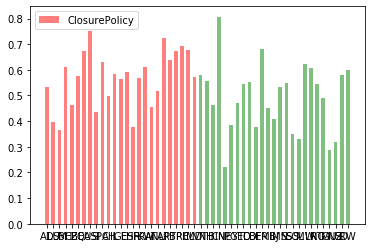

In [44]:
x = ["AD","LU","SM","BH","CZ","BE","QA","US","SI","PA","CH","IL","GE","ES","HR","FR", "KW","AT","NL","AR","PT","BR","PE","CL","MD","VN","TH","BI","CN","NE","PG","YE","TD","CD","BF","ER","ML","BJ","MN","SS","SO","SL","MW","LR","NG","TG","MU", "NZ","SD","RW"]
y1 = [AD_closure_average,LU_closure_average,SM_closure_average,BH_closure_average,CZ_closure_average,BE_closure_average, QA_closure_average,US_closure_average,SI_closure_average,PA_closure_average,CH_closure_average,IL_closure_average, GE_closure_average,ES_closure_average,HR_closure_average,FR_closure_average,KW_closure_average,AT_closure_average, NL_closure_average,AR_closure_average,PT_closure_average,BR_closure_average,PE_closure_average,CL_closure_average, MD_closure_average,VN_closure_average,TH_closure_average,BI_closure_average,CN_closure_average,NE_closure_average, PG_closure_average,YE_closure_average,TD_closure_average,CD_closure_average,BF_closure_average,ER_closure_average, ML_closure_average,BJ_closure_average,MN_closure_average,SS_closure_average,SO_closure_average,SL_closure_average, MW_closure_average,LR_closure_average,NG_closure_average,TG_closure_average,MU_closure_average,NZ_closure_average,SD_closure_average,RW_closure_average]
plt.bar(x, y1, alpha=0.5, width=0.6, color='rrrrrrrrrrrrrrrrrrrrrrrrrggggggggggggggggggggggggg', label='ClosurePolicy', lw=3)
plt.legend(loc='upper left')
plt.show()

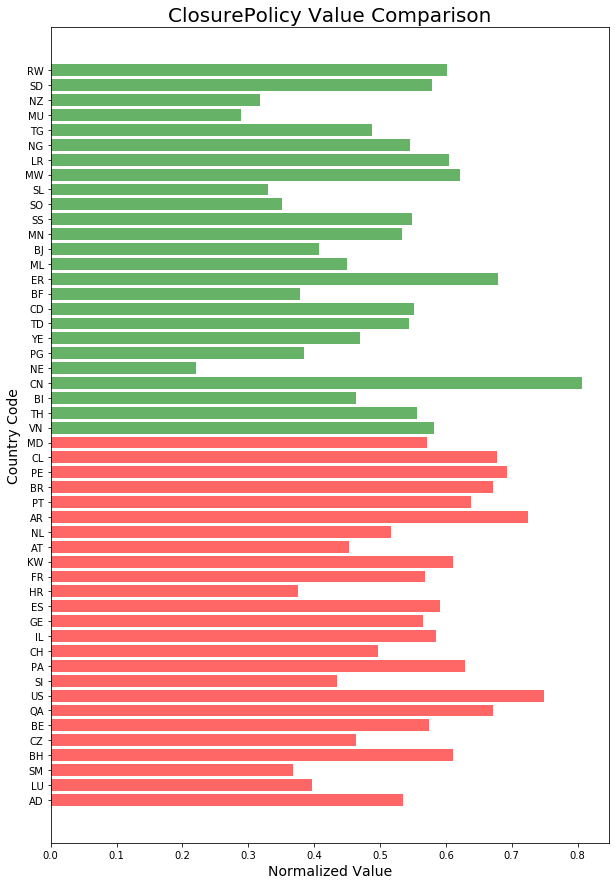

In [45]:
x = ["AD","LU","SM","BH","CZ","BE","QA","US","SI","PA","CH","IL","GE","ES","HR","FR", "KW","AT","NL","AR","PT","BR","PE","CL","MD","VN","TH","BI","CN","NE","PG","YE","TD","CD","BF","ER","ML","BJ","MN","SS","SO","SL","MW","LR","NG","TG","MU", "NZ","SD","RW"]
y1 = [AD_closure_average,LU_closure_average,SM_closure_average,BH_closure_average,CZ_closure_average,BE_closure_average, QA_closure_average,US_closure_average,SI_closure_average,PA_closure_average,CH_closure_average,IL_closure_average, GE_closure_average,ES_closure_average,HR_closure_average,FR_closure_average,KW_closure_average,AT_closure_average, NL_closure_average,AR_closure_average,PT_closure_average,BR_closure_average,PE_closure_average,CL_closure_average, MD_closure_average,VN_closure_average,TH_closure_average,BI_closure_average,CN_closure_average,NE_closure_average, PG_closure_average,YE_closure_average,TD_closure_average,CD_closure_average,BF_closure_average,ER_closure_average, ML_closure_average,BJ_closure_average,MN_closure_average,SS_closure_average,SO_closure_average,SL_closure_average, MW_closure_average,LR_closure_average,NG_closure_average,TG_closure_average,MU_closure_average,NZ_closure_average,SD_closure_average,RW_closure_average]

plt.figure(figsize=(10,15))

plt.title('ClosurePolicy Value Comparison',fontsize=20)
plt.xlabel(u'Normalized Value',fontsize=14)
plt.ylabel(u'Country Code',fontsize=14)
plt.barh(x, y1, alpha=0.6, color='rrrrrrrrrrrrrrrrrrrrrrrrrggggggggggggggggggggggggg')
plt.show()

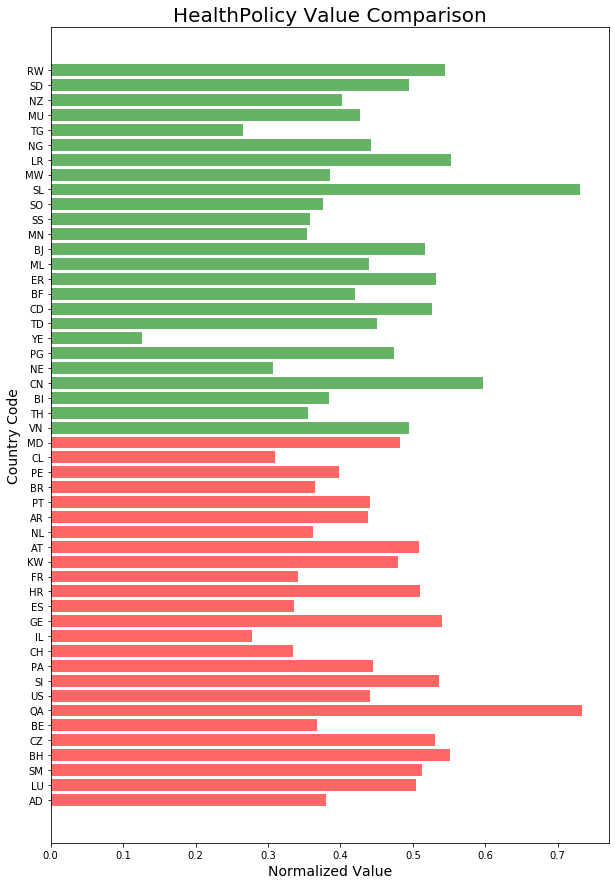

In [47]:
x = ["AD","LU","SM","BH","CZ","BE","QA","US","SI","PA","CH","IL","GE","ES","HR","FR", "KW","AT","NL","AR","PT","BR","PE","CL","MD","VN","TH","BI","CN","NE","PG","YE","TD","CD","BF","ER","ML","BJ","MN","SS","SO","SL","MW","LR","NG","TG","MU", "NZ","SD","RW"]
y2 = [AD_health_average,LU_health_average,SM_health_average,BH_health_average,CZ_health_average,BE_health_average, QA_health_average,US_health_average,SI_health_average,PA_health_average,CH_health_average,IL_health_average, GE_health_average,ES_health_average,HR_health_average,FR_health_average,KW_health_average,AT_health_average, NL_health_average,AR_health_average,PT_health_average,BR_health_average,PE_health_average,CL_health_average, MD_health_average,VN_health_average,TH_health_average,BI_health_average,CN_health_average,NE_health_average, PG_health_average,YE_health_average,TD_health_average,CD_health_average,BF_health_average,ER_health_average, ML_health_average,BJ_health_average,MN_health_average,SS_health_average,SO_health_average,SL_health_average, MW_health_average,LR_health_average,NG_health_average,TG_health_average,MU_health_average,NZ_health_average,SD_health_average,RW_health_average]

plt.figure(figsize=(10,15))

plt.title('HealthPolicy Value Comparison',fontsize=20)
plt.xlabel(u'Normalized Value',fontsize=14)
plt.ylabel(u'Country Code',fontsize=14)
plt.barh(x, y2, alpha=0.6, color='rrrrrrrrrrrrrrrrrrrrrrrrrggggggggggggggggggggggggg')
plt.show()

## There is no obvious relation between a single policy (e.g. closure policy) and performance towards COVID-19 which means you can't stop the spread of COVID-19 by just obeying the health policy but reopening the workplace unlimitedly. We should try to follow every good policy as much as possible. Those policies' influence are combined.

In [36]:
x = ["IL","GB","MX","CN","TJ","SG"]
y1 = [IL_closure_average,GB_closure_average,MX_closure_average,CN_closure_average,TJ_closure_average,SG_closure_average]
y2 = [IL_health_average,GB_health_average,MX_health_average,CN_health_average,TJ_health_average,SG_health_average]

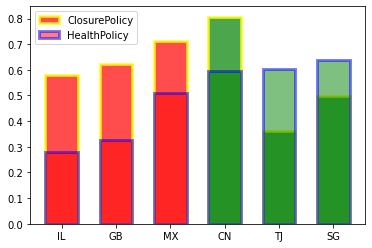

In [38]:
plt.bar(x, y1, alpha=0.7, width=0.6, color='rrrggg', edgecolor='yellow', label='ClosurePolicy', lw=3)
plt.bar(x, y2, alpha=0.5, width=0.6, color='rrrggg', edgecolor='blue', label='HealthPolicy', lw=3)
plt.legend(loc='upper left')
plt.show()

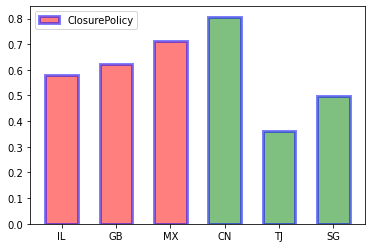

In [37]:
# plt.bar(x, y1, alpha=0.7, width=0.6, color='gggggyyyyyrrrrr', label='ClosurePolicy', lw=3)
plt.bar(x, y1, alpha=0.5, width=0.6, color='rrrggg', edgecolor='blue', label='ClosurePolicy', lw=3)
plt.legend(loc='upper left')
plt.show()

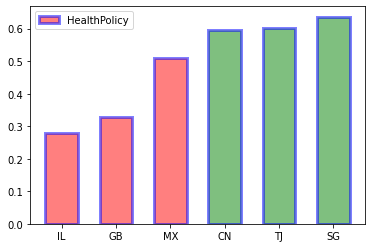

In [44]:
plt.bar(x, y2, alpha=0.5, width=0.6, color='rrrggg', edgecolor='blue', label='HealthPolicy', lw=3)
plt.legend(loc='upper left')
plt.show()

## From https://www.kaggle.com/tarunkr/covid-19-case-study-analysis-viz-comparisons, consider 2. Incident_Rate: Brazil: 2130.34, Kazakhstan: 571.25, Canada: 382.24, Egypt: 99.58, South Korea: 44.81, China: 6.43

In [39]:
x = ["BR","KG","CA","EG","KR","CN"]
y1 = [BR_closure_average,KG_closure_average,CA_closure_average,EG_closure_average,KR_closure_average,CN_closure_average]
y2 = [BR_health_average,KG_health_average,CA_health_average,EG_health_average,KR_health_average,CN_health_average]

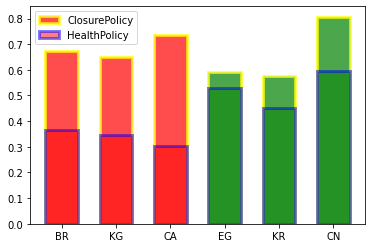

In [40]:
plt.bar(x, y1, alpha=0.7, width=0.6, color='rrrggg', edgecolor='yellow', label='ClosurePolicy', lw=3)
plt.bar(x, y2, alpha=0.5, width=0.6, color='rrrggg', edgecolor='blue', label='HealthPolicy', lw=3)
plt.legend(loc='upper left')
plt.show()

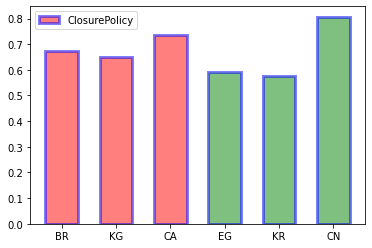

In [41]:
# plt.bar(x, y1, alpha=0.7, width=0.6, color='gggggyyyyyrrrrr', label='ClosurePolicy', lw=3)
plt.bar(x, y1, alpha=0.5, width=0.6, color='rrrggg', edgecolor='blue', label='ClosurePolicy', lw=3)
plt.legend(loc='upper left')
plt.show()

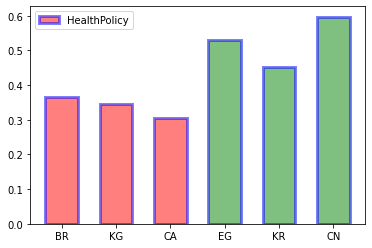

In [42]:
plt.bar(x, y2, alpha=0.5, width=0.6, color='rrrggg', edgecolor='blue', label='HealthPolicy', lw=3)
plt.legend(loc='upper left')
plt.show()

# From the plots above, we can see that the health policy is much more relevant to the performance towards Covid-19 which means healthy policy is much more important than the closure policy.
# For example, one suggestion I can give is that maybe we can reopen the schools and workplaces and in the meanwhile we must get enough testing and contact tracing and everyone should wear their masks.

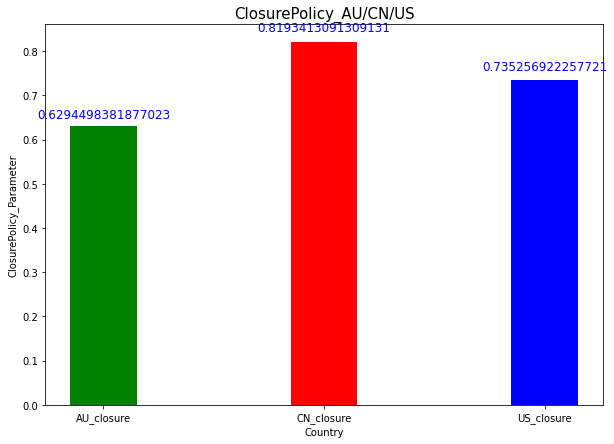

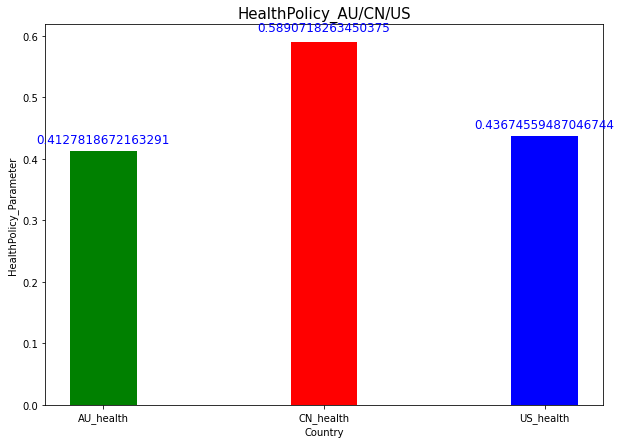

In [103]:
x = ["AU_closure", "CN_closure", "US_closure"]
y = [AU_closure_average, CN_closure_average, US_closure_average]
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(x=x, height=y, width=0.3, align="center", color="grb", linewidth=2.0)
ax.set_title("ClosurePolicy_AU/CN/US", fontsize=15)
plt.xlabel('Country')
plt.ylabel('ClosurePolicy_Parameter')
xticks = ax.get_xticks()
for i in range(len(y)):
    xy = (xticks[i], y[i] * 1.03)
    s = str(y[i])
    ax.annotate(s=s, xy=xy, fontsize=12, color="blue", ha="center", va="baseline" )
    
a = ["AU_health", "CN_health", "US_health"]
b = [AU_health_average, CN_health_average, US_health_average]
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(x=a, height=b, width=0.3, align="center", color="grb", linewidth=2.0)
ax.set_title("HealthPolicy_AU/CN/US", fontsize=15)
plt.xlabel('Country')
plt.ylabel('HealthPolicy_Parameter')
aticks = ax.get_xticks()
for i in range(len(b)):
    ab = (aticks[i], b[i] * 1.03)
    s = str(b[i])
    ax.annotate(s=s, xy=ab, fontsize=12, color="blue", ha="center", va="baseline" )
    
plt.show()